<h1>TECHNICAL REPORT - PREDICTING THE WEST NILE VIRUS<span class="tocSkip"></span></h1>

Authors: Amir Yunus, Michelle Ng, Ragunathan Theleeban<br>
GitHub: https://github.com/AmirYunus/GA_DSI_Project_4
***

# PREFACE

## Problem Statement

West Nile virus is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death.

In 2002, the first human cases of West Nile virus were reported in Chicago. By 2004, the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today.

Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations.

Given weather, location, testing, and spraying data, we are tasked to predict when and where different species of mosquitos will test positive for West Nile virus. A more accurate method of predicting outbreaks of West Nile virus in mosquitos will help the City of Chicago and CPHD more efficiently and effectively allocate resources towards preventing transmission of this potentially deadly virus. 

## Executive Summary

In this report, we will consider 4 datasets, namely, df_train, df_test, df_spray and df_weather. We will also import df_sample as the sample submission for Kaggle.

Once the datasets are imported, we will explore each feature. Feature engineering comes next as we transform the date and weather features. Categorical features are also transformed to dummy variables.

Finally, we will train our model using GridSearch, of which, the best model will be used for our Kaggle submission.

## Contents

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PREFACE" data-toc-modified-id="PREFACE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PREFACE</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Contents" data-toc-modified-id="Contents-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Contents</a></span></li><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Dictionary</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#IMPORT-DATA" data-toc-modified-id="IMPORT-DATA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>IMPORT DATA</a></span></li><li><span><a href="#EXPLORATORY-DATA-ANALYSIS" data-toc-modified-id="EXPLORATORY-DATA-ANALYSIS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EXPLORATORY DATA ANALYSIS</a></span><ul class="toc-item"><li><span><a href="#Training-Dataset" data-toc-modified-id="Training-Dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Training Dataset</a></span><ul class="toc-item"><li><span><a href="#Date" data-toc-modified-id="Date-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Address" data-toc-modified-id="Address-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Address</a></span></li><li><span><a href="#Species" data-toc-modified-id="Species-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Species</a></span></li><li><span><a href="#Block" data-toc-modified-id="Block-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Block</a></span></li><li><span><a href="#Street" data-toc-modified-id="Street-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Street</a></span></li><li><span><a href="#Trap" data-toc-modified-id="Trap-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Trap</a></span></li><li><span><a href="#AddressNumberAndStreet" data-toc-modified-id="AddressNumberAndStreet-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>AddressNumberAndStreet</a></span></li><li><span><a href="#Latitude" data-toc-modified-id="Latitude-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>Latitude</a></span></li><li><span><a href="#Longitude" data-toc-modified-id="Longitude-3.1.9"><span class="toc-item-num">3.1.9&nbsp;&nbsp;</span>Longitude</a></span></li><li><span><a href="#AddressAccuracy" data-toc-modified-id="AddressAccuracy-3.1.10"><span class="toc-item-num">3.1.10&nbsp;&nbsp;</span>AddressAccuracy</a></span></li><li><span><a href="#NumMosquitos" data-toc-modified-id="NumMosquitos-3.1.11"><span class="toc-item-num">3.1.11&nbsp;&nbsp;</span>NumMosquitos</a></span></li><li><span><a href="#WnvPresent" data-toc-modified-id="WnvPresent-3.1.12"><span class="toc-item-num">3.1.12&nbsp;&nbsp;</span>WnvPresent</a></span></li><li><span><a href="#Baseline-Score" data-toc-modified-id="Baseline-Score-3.1.13"><span class="toc-item-num">3.1.13&nbsp;&nbsp;</span>Baseline Score</a></span></li><li><span><a href="#Set-Labels" data-toc-modified-id="Set-Labels-3.1.14"><span class="toc-item-num">3.1.14&nbsp;&nbsp;</span>Set Labels</a></span></li></ul></li><li><span><a href="#Testing-Dataset" data-toc-modified-id="Testing-Dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Testing Dataset</a></span><ul class="toc-item"><li><span><a href="#Date" data-toc-modified-id="Date-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Address" data-toc-modified-id="Address-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Address</a></span></li><li><span><a href="#Species" data-toc-modified-id="Species-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Species</a></span></li><li><span><a href="#Block" data-toc-modified-id="Block-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Block</a></span></li><li><span><a href="#Street" data-toc-modified-id="Street-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Street</a></span></li><li><span><a href="#Trap" data-toc-modified-id="Trap-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Trap</a></span></li><li><span><a href="#AddressNumberAndStreet" data-toc-modified-id="AddressNumberAndStreet-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>AddressNumberAndStreet</a></span></li><li><span><a href="#Latitude" data-toc-modified-id="Latitude-3.2.8"><span class="toc-item-num">3.2.8&nbsp;&nbsp;</span>Latitude</a></span></li><li><span><a href="#Longitude" data-toc-modified-id="Longitude-3.2.9"><span class="toc-item-num">3.2.9&nbsp;&nbsp;</span>Longitude</a></span></li><li><span><a href="#AddressAccuracy" data-toc-modified-id="AddressAccuracy-3.2.10"><span class="toc-item-num">3.2.10&nbsp;&nbsp;</span>AddressAccuracy</a></span></li></ul></li><li><span><a href="#Spray-Dataset" data-toc-modified-id="Spray-Dataset-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Spray Dataset</a></span><ul class="toc-item"><li><span><a href="#Date" data-toc-modified-id="Date-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Time" data-toc-modified-id="Time-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Time</a></span></li><li><span><a href="#Latitude" data-toc-modified-id="Latitude-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Latitude</a></span></li><li><span><a href="#Longitude" data-toc-modified-id="Longitude-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Longitude</a></span></li></ul></li><li><span><a href="#Weather-Dataset" data-toc-modified-id="Weather-Dataset-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Weather Dataset</a></span><ul class="toc-item"><li><span><a href="#Station" data-toc-modified-id="Station-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Station</a></span></li><li><span><a href="#Date" data-toc-modified-id="Date-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Tmax" data-toc-modified-id="Tmax-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Tmax</a></span></li><li><span><a href="#Tmin" data-toc-modified-id="Tmin-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Tmin</a></span></li><li><span><a href="#Tavg" data-toc-modified-id="Tavg-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Tavg</a></span></li><li><span><a href="#Depart" data-toc-modified-id="Depart-3.4.6"><span class="toc-item-num">3.4.6&nbsp;&nbsp;</span>Depart</a></span></li><li><span><a href="#DewPoint" data-toc-modified-id="DewPoint-3.4.7"><span class="toc-item-num">3.4.7&nbsp;&nbsp;</span>DewPoint</a></span></li><li><span><a href="#WetBulb" data-toc-modified-id="WetBulb-3.4.8"><span class="toc-item-num">3.4.8&nbsp;&nbsp;</span>WetBulb</a></span></li><li><span><a href="#Heat" data-toc-modified-id="Heat-3.4.9"><span class="toc-item-num">3.4.9&nbsp;&nbsp;</span>Heat</a></span></li><li><span><a href="#Cool" data-toc-modified-id="Cool-3.4.10"><span class="toc-item-num">3.4.10&nbsp;&nbsp;</span>Cool</a></span></li><li><span><a href="#Sunrise" data-toc-modified-id="Sunrise-3.4.11"><span class="toc-item-num">3.4.11&nbsp;&nbsp;</span>Sunrise</a></span></li><li><span><a href="#Sunset" data-toc-modified-id="Sunset-3.4.12"><span class="toc-item-num">3.4.12&nbsp;&nbsp;</span>Sunset</a></span></li><li><span><a href="#CodeSum" data-toc-modified-id="CodeSum-3.4.13"><span class="toc-item-num">3.4.13&nbsp;&nbsp;</span>CodeSum</a></span></li><li><span><a href="#Depth" data-toc-modified-id="Depth-3.4.14"><span class="toc-item-num">3.4.14&nbsp;&nbsp;</span>Depth</a></span></li><li><span><a href="#Water1" data-toc-modified-id="Water1-3.4.15"><span class="toc-item-num">3.4.15&nbsp;&nbsp;</span>Water1</a></span></li><li><span><a href="#SnowFall" data-toc-modified-id="SnowFall-3.4.16"><span class="toc-item-num">3.4.16&nbsp;&nbsp;</span>SnowFall</a></span></li><li><span><a href="#PrecipTotal" data-toc-modified-id="PrecipTotal-3.4.17"><span class="toc-item-num">3.4.17&nbsp;&nbsp;</span>PrecipTotal</a></span></li><li><span><a href="#StnPressure" data-toc-modified-id="StnPressure-3.4.18"><span class="toc-item-num">3.4.18&nbsp;&nbsp;</span>StnPressure</a></span></li><li><span><a href="#SeaLevel" data-toc-modified-id="SeaLevel-3.4.19"><span class="toc-item-num">3.4.19&nbsp;&nbsp;</span>SeaLevel</a></span></li><li><span><a href="#ResultSpeed" data-toc-modified-id="ResultSpeed-3.4.20"><span class="toc-item-num">3.4.20&nbsp;&nbsp;</span>ResultSpeed</a></span></li><li><span><a href="#ResultDir" data-toc-modified-id="ResultDir-3.4.21"><span class="toc-item-num">3.4.21&nbsp;&nbsp;</span>ResultDir</a></span></li><li><span><a href="#AvgSpeed" data-toc-modified-id="AvgSpeed-3.4.22"><span class="toc-item-num">3.4.22&nbsp;&nbsp;</span>AvgSpeed</a></span></li></ul></li><li><span><a href="#Comparison-Between-df_weather-and-df_train" data-toc-modified-id="Comparison-Between-df_weather-and-df_train-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Comparison Between df_weather and df_train</a></span><ul class="toc-item"><li><span><a href="#Wet-Bulb-temperature-vs-WNV-presence" data-toc-modified-id="Wet-Bulb-temperature-vs-WNV-presence-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Wet Bulb temperature vs WNV presence</a></span></li><li><span><a href="#Cool-degree-days-vs-WNV-presence" data-toc-modified-id="Cool-degree-days-vs-WNV-presence-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Cool degree days vs WNV presence</a></span></li><li><span><a href="#Precipitation-vs-WNV-presence" data-toc-modified-id="Precipitation-vs-WNV-presence-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Precipitation vs WNV presence</a></span></li><li><span><a href="#Average-Temperature-vs-WNV-presence" data-toc-modified-id="Average-Temperature-vs-WNV-presence-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Average Temperature vs WNV presence</a></span></li><li><span><a href="#Maximum-Temperature-vs-WNV-presence" data-toc-modified-id="Maximum-Temperature-vs-WNV-presence-3.5.5"><span class="toc-item-num">3.5.5&nbsp;&nbsp;</span>Maximum Temperature vs WNV presence</a></span></li><li><span><a href="#Minimum-Temperature-vs-WNV-virus" data-toc-modified-id="Minimum-Temperature-vs-WNV-virus-3.5.6"><span class="toc-item-num">3.5.6&nbsp;&nbsp;</span>Minimum Temperature vs WNV virus</a></span></li><li><span><a href="#Heating-vs-WNV-virus" data-toc-modified-id="Heating-vs-WNV-virus-3.5.7"><span class="toc-item-num">3.5.7&nbsp;&nbsp;</span>Heating vs WNV virus</a></span></li><li><span><a href="#Sea-Level-vs-WNV-Presence" data-toc-modified-id="Sea-Level-vs-WNV-Presence-3.5.8"><span class="toc-item-num">3.5.8&nbsp;&nbsp;</span>Sea Level vs WNV Presence</a></span></li><li><span><a href="#Average-Wind-Speed-vs-WNV-presence" data-toc-modified-id="Average-Wind-Speed-vs-WNV-presence-3.5.9"><span class="toc-item-num">3.5.9&nbsp;&nbsp;</span>Average Wind Speed vs WNV presence</a></span></li><li><span><a href="#Resulting-Wind-Direction-vs-WNV-presence" data-toc-modified-id="Resulting-Wind-Direction-vs-WNV-presence-3.5.10"><span class="toc-item-num">3.5.10&nbsp;&nbsp;</span>Resulting Wind Direction vs WNV presence</a></span></li><li><span><a href="#Resultant-Wind-Speed-vs-WNV-presence" data-toc-modified-id="Resultant-Wind-Speed-vs-WNV-presence-3.5.11"><span class="toc-item-num">3.5.11&nbsp;&nbsp;</span>Resultant Wind Speed vs WNV presence</a></span></li><li><span><a href="#Dew-Point-temperature-vs-WNV-Presence" data-toc-modified-id="Dew-Point-temperature-vs-WNV-Presence-3.5.12"><span class="toc-item-num">3.5.12&nbsp;&nbsp;</span>Dew Point temperature vs WNV Presence</a></span></li></ul></li></ul></li><li><span><a href="#FEATURE-ENGINEERING" data-toc-modified-id="FEATURE-ENGINEERING-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>FEATURE ENGINEERING</a></span><ul class="toc-item"><li><span><a href="#Month-and-Day-Features" data-toc-modified-id="Month-and-Day-Features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Month and Day Features</a></span></li><li><span><a href="#Latitude-and-Longitude-Features" data-toc-modified-id="Latitude-and-Longitude-Features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Latitude and Longitude Features</a></span></li><li><span><a href="#Missing-Observations" data-toc-modified-id="Missing-Observations-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Missing Observations</a></span></li><li><span><a href="#Duplicate-Features" data-toc-modified-id="Duplicate-Features-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Duplicate Features</a></span></li><li><span><a href="#CodeSum-Feature" data-toc-modified-id="CodeSum-Feature-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>CodeSum Feature</a></span></li><li><span><a href="#Station-Features" data-toc-modified-id="Station-Features-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Station Features</a></span></li><li><span><a href="#Merge-Datasets" data-toc-modified-id="Merge-Datasets-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Merge Datasets</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Dropped-Features" data-toc-modified-id="Dropped-Features-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Dropped Features</a></span></li></ul></li><li><span><a href="#DATA-MODELLING" data-toc-modified-id="DATA-MODELLING-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DATA MODELLING</a></span><ul class="toc-item"><li><span><a href="#Training-Preparation" data-toc-modified-id="Training-Preparation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Training Preparation</a></span></li><li><span><a href="#$M_0$---Grid-Search" data-toc-modified-id="$M_0$---Grid-Search-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>$M_0$ - Grid Search</a></span></li><li><span><a href="#$M_1$---Gradient-Boosting-Classifier" data-toc-modified-id="$M_1$---Gradient-Boosting-Classifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>$M_1$ - Gradient Boosting Classifier</a></span></li></ul></li><li><span><a href="#EXPORT-DATA" data-toc-modified-id="EXPORT-DATA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EXPORT DATA</a></span></li><li><span><a href="#ANALYSIS-OF-RESULTS" data-toc-modified-id="ANALYSIS-OF-RESULTS-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ANALYSIS OF RESULTS</a></span><ul class="toc-item"><li><span><a href="#Merging-of-predicted-data-back-into-other-known-data" data-toc-modified-id="Merging-of-predicted-data-back-into-other-known-data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Merging of predicted data back into other known data</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Predictions</a></span></li><li><span><a href="#Finding-out-when-to-run-spray-the-region" data-toc-modified-id="Finding-out-when-to-run-spray-the-region-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Finding out when to run spray the region</a></span></li></ul></li><li><span><a href="#CONCLUSION" data-toc-modified-id="CONCLUSION-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>CONCLUSION</a></span></li></ul></div>

## Data Dictionary

[Data Dictionary](../documents/noaa_weather_qclcd_documentation.pdf)

## Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from datetime import datetime
from sklearn import ensemble, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display, Markdown

# Prevent warnings from distracting the reader
warnings.filterwarnings('ignore')

# Colour scheme and style selected
theme = ['#1F306E', '#553772', '#8F3B76', '#C7417B', '#F5487F']
colors_palette = sns.palplot(sns.color_palette(theme))
plt.style.use('seaborn')
sns.set(style="white", color_codes=True)
sns.set_palette(colors_palette)

# Forces Matplotlib to use high-quality images
ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = {'pdf', 'png'}                        

## Functions

In [2]:
# Functions to extract month and day from dataset
def create_month(x):
    """
    function made to extract month out of date
    
    Parameters
    ----------
    x: str variable containing datein YY-MM-DD format
    
    Returns
    ------
    str containing month
    """
    return x.split('-')[1]

def create_day(x):
    """
    function made to extract day out of date
    
    Parameters
    ----------
    x: str variable containing date in YY-MM-DD format
    
    Returns
    ------
    str containing day
    """
    return x.split('-')[2]

In [3]:
def pipeline(items, X_train, X_val, y_train, y_val):
    """
    function to create a pipeline that determines which test and parameters
    have the highest score
    
    Parameters
    ---------
    items: 
    X_train: training dataset containing the predicting variables
    X_val: validation dataset
    y_train: training dataset containing the predicted variables
    y_val: validation dataset
    
    Returns
    ------
    train_score: R2 score of the training model
    test_score: R2 score of the test model
    roc_auc: Receiver Operator Curve Area under the Curve score
     """

    # Add a pipe, add a param !
    pipe_items = {
        'lgr': LogisticRegression(),
        'rfc': RandomForestClassifier(),
        'gbc': GradientBoostingClassifier(),
        'abc': AdaBoostClassifier(),
        'knn': KNeighborsClassifier()
    }

    # Include at least one param for each pipe item
    param_items = {
        'ss': {
        },
        'lgr': {
        },
        'rfc': {
        },
        'gbc': {
        },
        'abc': {
        },
        'knn': {
        }
    }

    # Create the parameters for GridSearch
    params = dict()
    for i in items:
        for p in param_items[i]:
            params[p] = param_items[i][p]

    # Create the pipeline
    pipe_list = [(i, pipe_items[i]) for i in items]
    for p in pipe_list:
        display(Markdown(f'<b>{str(p[1]).split("(")[0]}</b>'))
    pipe = Pipeline(pipe_list)

    # Grid search
    gs = GridSearchCV(pipe, param_grid=params,scoring='roc_auc', verbose=1, cv=3, n_jobs=-1)
    gs.fit(X_train, y_train)

    # Print the results
    train_params = gs.best_params_
    train_score = gs.score(X_train,y_train)
    test_score = gs.score(X_val,y_val)
    y_val_hat = gs.predict(X_val)
    y_val_proba = gs.predict_proba(X_val)
    df_val_proba = pd.DataFrame(y_val_proba)
    y_val_proba_0 = df_val_proba[1]
    roc_auc = roc_auc_score(y_val, y_val_proba_0)
    
    for k in train_params:
        print("{}: {}".format(k, train_params[k]))
         
    print("Train score: {} Test score: {}".format(train_score,test_score))
    print("ROC AUC score: {}".format(roc_auc))
    print("")

    return train_score, test_score, roc_auc

In [4]:
def log ():
    """
    returns the current datetime
    Parameters
    ----------
    takes computer time
    
    Returns
    -------
    Current computer time
    """
    now = str(datetime.now())
    print(f'[LOG {now}]')

In [5]:
def single_barplot(df,x,y,title,xlab,ylab):
    """
    returns barplot
    Parameters
    ----------
    df: Dataframe where data comes from 
    x: column of dataframe of interest
    y: column of dataframe of interest
    title: title of plot
    xlab: label of x axis
    ylab: label of y axis
    
    Returns
    -------
    Returns plotted bargraph
    """
    df[[x, y]].groupby(x).sum().plot.bar(figsize=(20,11))
    plt.title(title, fontsize=30)
    plt.xlabel(xlab, fontsize =20)
    plt.xticks(rotation=90)
    plt.ylabel(ylab, fontsize=20)
    plt.grid(b = True)

In [6]:
def state_postcodeextract(df):
    """
    To make new dataframe columns that contain state of the address
    
    Parameters
    ----------
    df: DataFrame of concern 
    
    Output
    ------
    Returns the first 5 rows of the dataframe
    """
    df['state'] = ['IL' if 'IL' in x else 'somewhereelse' for x in df['Address']]
    return df.head()

In [7]:
# function created to do correlation between the WNV probability and precipitation mean
def pearson(lst, df):
    """
    takes a list of dataframe columns and runs Pearson's correlation against WnvPresence probability
    Parameters
    ----------
    lst: list of dataframe columns
    df: Dataframe containing the columns
    """
    for a in lst:
        (stat, p) = stats.pearsonr(df[a], df.WnvPresent)
        print(a, 'r:', stat, 'p:', p)

# IMPORT DATA

We will conduct a descriptive analysis of the West Nile Virus. In addition, we will apply some necessary pre-processing steps to train our model. This report is based on the **"West Nile Virus Prediction"** via Kaggle [[1]](https://www.kaggle.com/c/predict-west-nile-virus/).

Let us start by loading all the datasets and investigate its structure and attributes:

In [8]:
log ()
# Load dataset
df_train = pd.read_csv('../data/train.csv')
print(f'Training dataset of {df_train.shape[0]} observations and {df_train.shape[1]} features loaded')

df_test = pd.read_csv('../data/test.csv')
print(f'Testing dataset of {df_test.shape[0]} observations and {df_test.shape[1]} features loaded')

df_spray = pd.read_csv('../data/spray.csv')
print(f'Spray dataset of {df_spray.shape[0]} observations and {df_spray.shape[1]} features loaded')

df_weather = pd.read_csv('../data/weather.csv')
print(f'Weather dataset of {df_weather.shape[0]} observations and {df_weather.shape[1]} features loaded')

df_sample = pd.read_csv('../data/sampleSubmission.csv')
print(f'Sample Submission dataset of {df_sample.shape[0]} observations and {df_sample.shape[1]} features loaded')

[LOG 2019-11-08 11:12:26.794289]
Training dataset of 10506 observations and 12 features loaded
Testing dataset of 116293 observations and 11 features loaded
Spray dataset of 14835 observations and 4 features loaded
Weather dataset of 2944 observations and 22 features loaded
Sample Submission dataset of 116293 observations and 2 features loaded


# EXPLORATORY DATA ANALYSIS

## Training Dataset

Overview:
* Observations: 10,506
* Features: 12
* Missing Values: None
* Duplicated Observations: 2,031

In [9]:
log()
# Check the shape of df_train
print(f'Training dataset has {df_train.shape[0]} observations and {df_train.shape[1]} features')
# Check for missing values
print(f'Training dataset have {df_train.isnull().sum().sum()} NaNs')
# Check for duplicates
print(f'Training dataset have {df_train[df_train.duplicated(list(df_train.columns))].shape[0]} duplicated observations')

[LOG 2019-11-08 11:12:28.491519]
Training dataset has 10506 observations and 12 features
Training dataset have 0 NaNs
Training dataset have 813 duplicated observations


In [10]:
log()
# display columns in df_train
df_train.columns

[LOG 2019-11-08 11:12:28.769259]


Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

### Date

In [11]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[0]}</b> - {df_train.Date.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.Date.value_counts(normalize=True)}\n')
print()
n_nan = df_train.Date.isnull().sum()
if n_nan > 0:
    print(f'{df_train.Date} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:29.004820]


<b>Date</b> - object

Values:

2007-08-01    0.052446
2007-08-15    0.026271
2007-08-21    0.017704
2013-08-01    0.017704
2007-08-24    0.017704
                ...   
2007-08-09    0.002475
2007-05-29    0.002380
2007-09-25    0.002189
2009-06-03    0.001333
2007-08-03    0.000476
Name: Date, Length: 95, dtype: float64




[LOG 2019-11-08 11:12:30.175883]


Text(0, 0.5, 'Month of training data collected')

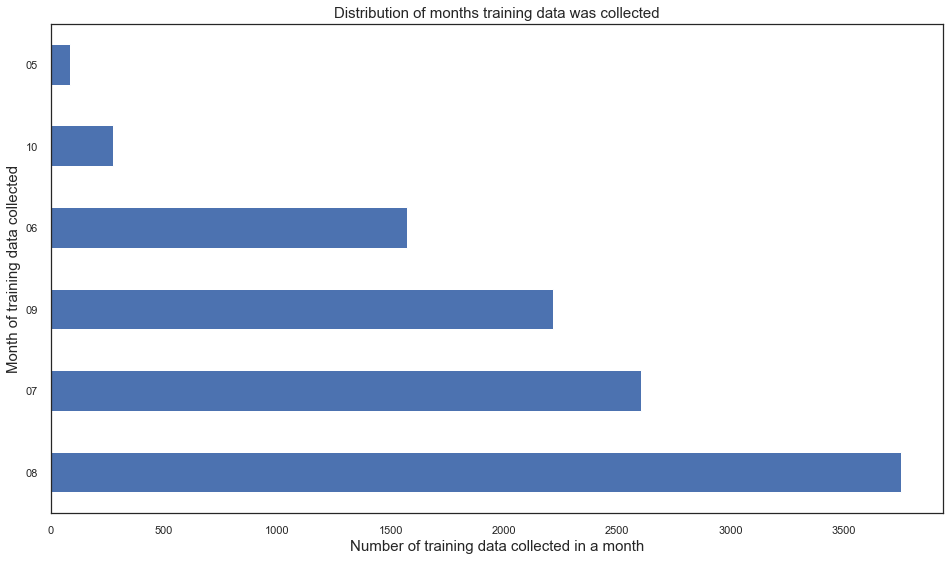

In [12]:
log()
# plot distribution of months collected
df_train['month'] = [create_month(x) for x in df_train['Date']]
plt.figure(figsize = (16,9))
df_train['month'].value_counts().plot(kind='barh',)
plt.title('Distribution of months training data was collected',{'size': 15})
plt.xlabel('Number of training data collected in a month', {'size': 15})
plt.ylabel('Month of training data collected', {'size': 15})

The data shows that the bulk of the training data was collected between 6th to 9th month of the year. This aligns with the summer months in Chicago.

[LOG 2019-11-08 11:12:31.100071]


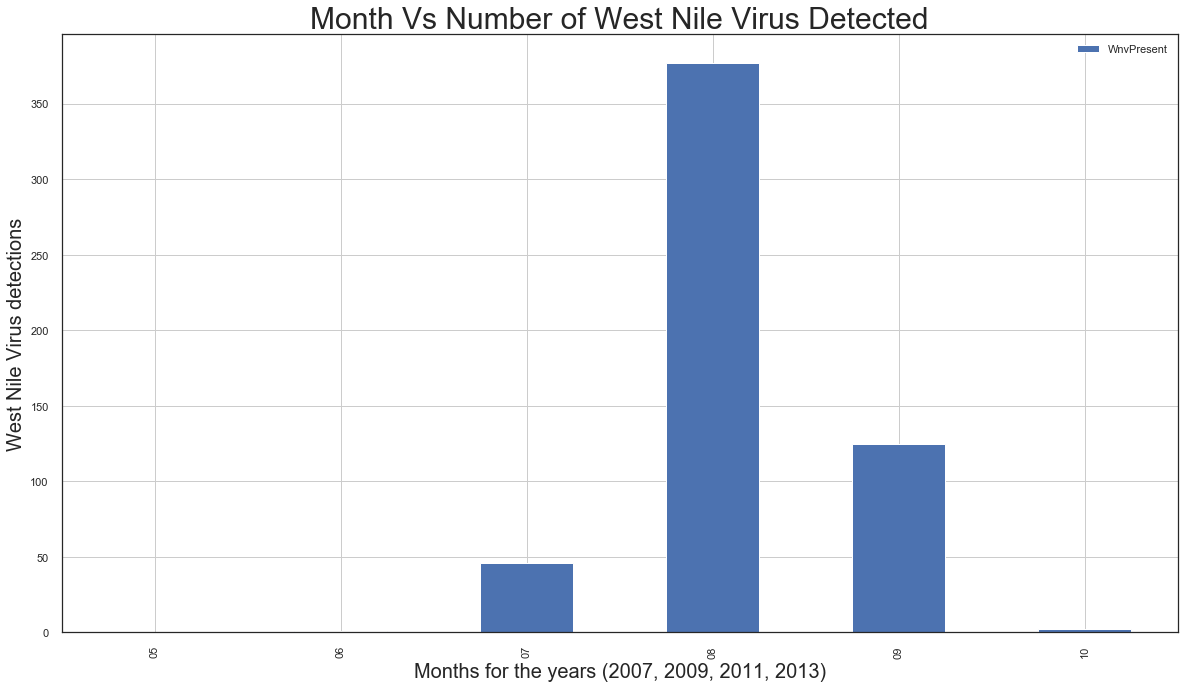

In [13]:
log()
# plot month against west nile virus
single_barplot(df=df_train,
               x='month',
               y='WnvPresent',
               title='Month Vs Number of West Nile Virus Detected',
               xlab='Months for the years (2007, 2009, 2011, 2013)',
               ylab='West Nile Virus detections')

[LOG 2019-11-08 11:12:31.927668]


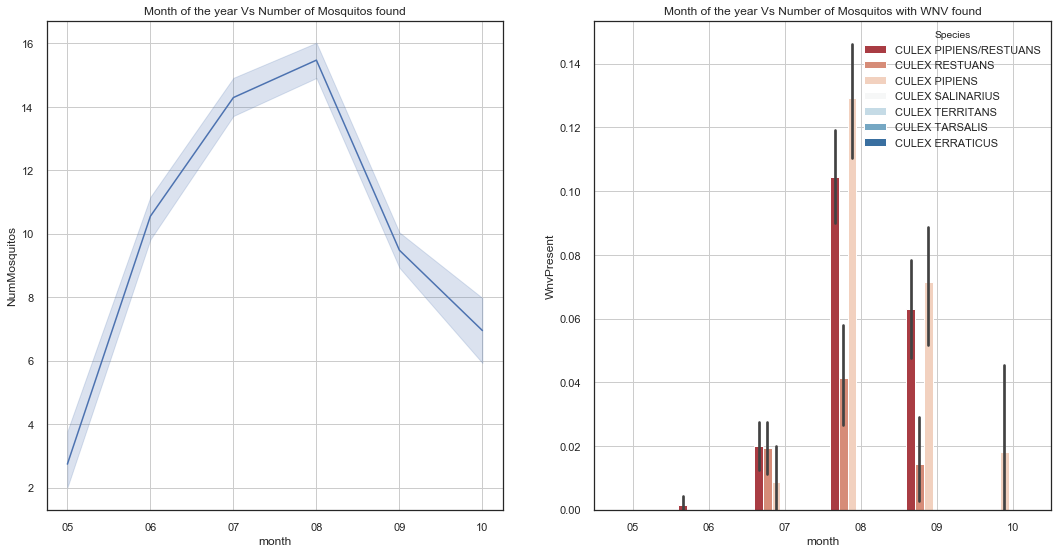

In [14]:
log()
f,ax=plt.subplots(1,2,figsize=(18,9))
#Months Vs NumMosquitos
ax[0].set_title('Month of the year Vs Number of Mosquitos found')
ax[0]=sns.lineplot(x='month', y='NumMosquitos',data=df_train,ax=ax[0],palette="RdBu")
ax[0].grid(b = True)

#Months Vs WnvPresent
ax[1].set_title('Month of the year Vs Number of Mosquitos with WNV found')
ax[1]=sns.barplot(x='month', y='WnvPresent',hue='Species',data=df_train,palette="RdBu",ax=ax[1])
ax[1].grid(b = True)

Over Years of 2007, 2009, 2011, 2013 the highest total number of WNV detections were observed on the mouth of August. And carrier species number also high in summer season of the year.

In addition, over years of 2007, 2009, 2011, 2013 the highest number of mosquitos were observed on the mouth of August with steady increase from month of May then decreased after month of August. And carrier species amount also followed same trend as number of mosquitos. 

### Address

In [15]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[1]}</b> - {df_train.Address.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.Address.value_counts(normalize=True)}\n')
print()
n_nan = df_train.Address.isnull().sum()
if n_nan > 0:
    print(f'{df_train.Address} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:36.208896]


<b>Address</b> - object

Values:

ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA         0.071388
South Doty Avenue, Chicago, IL, USA                                          0.051590
South Stony Island Avenue, Chicago, IL, USA                                  0.029888
4100 North Oak Park Avenue, Chicago, IL 60634, USA                           0.017609
4200 West 127th Street, Alsip, IL 60803, USA                                 0.017419
                                                                               ...   
3400 West 77th Street, Chicago, IL 60652, USA                                0.000666
5500 South Doctor Martin Luther King Junior Drive, Chicago, IL 60637, USA    0.000476
9600 South Longwood Drive, Chicago, IL 60643, USA                            0.000476
2900 West 85th Street, Chicago, IL 60652, USA                                0.000286
2100 South Hamlin Avenue, Chicago, IL 60623, USA                             0.000190
Name: Address, Length: 138, dtype: float64




In [16]:
log()
# display state
state_postcodeextract(df_train)

[LOG 2019-11-08 11:12:36.597040]


Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent month state  
0             1           0    05    IL  
1             1           0    05    IL  
2             1           0    05    IL  
3             1           0    05    IL  
4             4           0    05    IL

In [17]:
log()
df_train['state'].value_counts()

[LOG 2019-11-08 11:12:37.395961]


IL    10506
Name: state, dtype: int64

### Species

In [18]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[2]}</b> - {df_train.Species.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.Species.value_counts(normalize=True)}\n')
print()
n_nan = df_train.Species.isnull().sum()
if n_nan > 0:
    print(f'{df_train.Species} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:37.425689]


<b>Species</b> - object

Values:

CULEX PIPIENS/RESTUANS    0.452313
CULEX RESTUANS            0.260803
CULEX PIPIENS             0.256901
CULEX TERRITANS           0.021131
CULEX SALINARIUS          0.008186
CULEX TARSALIS            0.000571
CULEX ERRATICUS           0.000095
Name: Species, dtype: float64




In [19]:
log()
df_train[['Species','WnvPresent','NumMosquitos']].groupby(['Species', 'WnvPresent']).sum()

[LOG 2019-11-08 11:12:37.449238]


NumMosquitos
Species                WnvPresent              
CULEX ERRATICUS        0                      7
CULEX PIPIENS          0                  37942
                       1                   6729
CULEX PIPIENS/RESTUANS 0                  59145
                       1                   7123
CULEX RESTUANS         0                  22764
                       1                    667
CULEX SALINARIUS       0                    145
CULEX TARSALIS         0                      7
CULEX TERRITANS        0                    510

[LOG 2019-11-08 11:12:37.498636]


Text(0, 0.5, 'West Nile Virus detections')

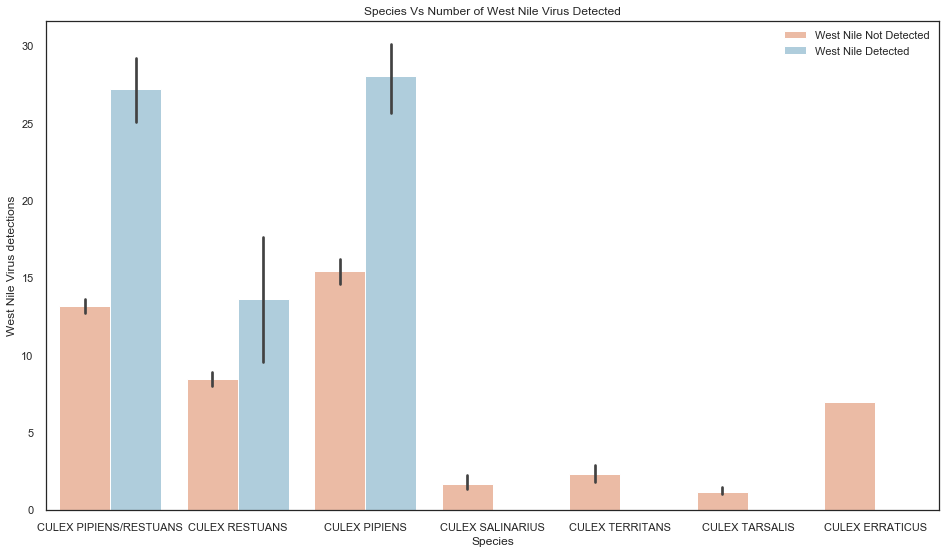

In [20]:
log()
# species of west nile
plt.figure(figsize=(16,9))
ax=sns.barplot(x='Species', y='NumMosquitos', hue='WnvPresent',data=df_train,palette="RdBu")
plt.title("Species Vs Number of West Nile Virus Detected", fontsize='large')
L = plt.legend(loc="upper right")
L.get_texts()[0].set_text('West Nile Not Detected')
L.get_texts()[1].set_text('West Nile Detected')
plt.xlabel("Species", fontsize ='large')
plt.ylabel("West Nile Virus detections", fontsize='large')

Culex Pipiens and Culex Restuans have the highest populations in the training set. Amongst the species represented, the West Nile Virus was present only in Culex Pipiens and Culex Restuans which makes them the carriers as compared to the others. Number of WNV carrier mosquitos matter in spreading illness, not over all number of mosquitos.

### Block

In [21]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[3]}</b> - {df_train.Block.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.Block.value_counts(normalize=True)}\n')
print()
n_nan = df_train.Block.isnull().sum()
if n_nan > 0:
    print(f'{df_train.Block} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:38.992637]


<b>Block</b> - int64

Values:

10    0.163906
11    0.070055
12    0.057586
22    0.047592
13    0.032838
        ...   
27    0.001618
80    0.001237
34    0.000666
55    0.000476
29    0.000286
Name: Block, Length: 64, dtype: float64




Most of the training data were collected in block 10.

### Street

In [22]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[4]}</b> - {df_train.Street.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.Street.value_counts(normalize=True)}\n')
print()
n_nan = df_train.Street.isnull().sum()
if n_nan > 0:
    print(f'{df_train.Street} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:39.244865]


<b>Street</b> - object

Values:

 W OHARE AIRPORT       0.071388
 S DOTY AVE            0.051590
 S STONY ISLAND AVE    0.033029
 S ASHLAND AVE         0.025319
 N OAK PARK AVE        0.020560
                         ...   
 S RACINE AVE          0.000761
 W 77TH ST             0.000666
 S LONGWOOD DR         0.000476
 W 85TH ST             0.000286
 S HAMLIN AVE          0.000190
Name: Street, Length: 128, dtype: float64




Most of the traps laid were at O'Hare Airport, as most of the traps recorded up to 50 mosquitos.

### Trap

In [23]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[5]}</b> - {df_train.Trap.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.Trap.value_counts(normalize=True)}\n')
print()
n_nan = df_train.Trap.isnull().sum()
if n_nan > 0:
    print(f'{df_train.Trap} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:39.268065]


<b>Trap</b> - object

Values:

T900     0.071388
T115     0.051590
T138     0.029888
T002     0.017609
T135     0.017419
           ...   
T238     0.000666
T076     0.000476
T094B    0.000476
T237     0.000286
T040     0.000190
Name: Trap, Length: 136, dtype: float64




In [24]:
log()
# display trap T900
df_train[df_train['Trap'] == "T900"]

[LOG 2019-11-08 11:12:39.286539]


Date                                            Address  \
3868   2009-05-28  ORD Terminal 5, O'Hare International Airport, ...   
3869   2009-05-28  ORD Terminal 5, O'Hare International Airport, ...   
3963   2009-06-03  ORD Terminal 5, O'Hare International Airport, ...   
3964   2009-06-03  ORD Terminal 5, O'Hare International Airport, ...   
3965   2009-06-03  ORD Terminal 5, O'Hare International Airport, ...   
...           ...                                                ...   
10485  2013-09-26  ORD Terminal 5, O'Hare International Airport, ...   
10486  2013-09-26  ORD Terminal 5, O'Hare International Airport, ...   
10487  2013-09-26  ORD Terminal 5, O'Hare International Airport, ...   
10488  2013-09-26  ORD Terminal 5, O'Hare International Airport, ...   
10489  2013-09-26  ORD Terminal 5, O'Hare International Airport, ...   

                      Species  Block            Street  Trap  \
3868           CULEX RESTUANS     10   W OHARE AIRPORT  T900   
3869           CULEX RESTUANS     10   W OHARE AIRPORT  T900   
3963   CULEX PIPIENS/RESTUANS     10   W OHARE AIRPORT  T900   
3964   CULEX PIPIENS/RESTUANS     10   W OHARE AIRPORT  T900   
3965   CULEX PIPIENS/RESTUANS     10   W OHARE AIRPORT  T900   
...                       ...    ...               ...   ...   
10485  CULEX PIPIENS/RESTUANS     10   W OHARE AIRPORT  T900   
10486           CULEX PIPIENS     10   W OHARE AIRPORT  T900   
10487           CULEX PIPIENS     10   W OHARE AIRPORT  T900   
10488           CULEX PIPIENS     10   W OHARE AIRPORT  T900   
10489           CULEX PIPIENS     10   W OHARE AIRPORT  T900   

                   AddressNumberAndStreet   Latitude  Longitude  \
3868   1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   
3869   1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   
3963   1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   
3964   1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   
3965   1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   
...                                   ...        ...        ...   
10485  1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   
10486  1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   
10487  1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   
10488  1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   
10489  1000  W OHARE AIRPORT, Chicago, IL  41.974689 -87.890615   

       AddressAccuracy  NumMosquitos  WnvPresent month state  
3868                 9            30           0    05    IL  
3869                 9             4           0    05    IL  
3963                 9            22           0    06    IL  
3964                 9            50           0    06    IL  
3965                 9            21           0    06    IL  
...                ...           ...         ...   ...   ...  
10485                9             4           0    09    IL  
10486                9            16           0    09    IL  
10487                9             9           0    09    IL  
10488                9            11           0    09    IL  
10489                9             1           0    09    IL  

[750 rows x 14 columns]

The most used trap is T900, as it is placed at O'Hare airport, which collected the most mosquitos.

### AddressNumberAndStreet

In [25]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[6]}</b> - {df_train.AddressNumberAndStreet.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.AddressNumberAndStreet.value_counts(normalize=True)}\n')
print()
n_nan = df_train.AddressNumberAndStreet.isnull().sum()
if n_nan > 0:
    print(f'{df_train.AddressNumberAndStreet} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:39.329432]


<b>AddressNumberAndStreet</b> - object

Values:

1000  W OHARE AIRPORT, Chicago, IL                  0.071388
1200  S DOTY AVE, Chicago, IL                       0.051590
1000  S STONY ISLAND AVE, Chicago, IL               0.029888
4100  N OAK PARK AVE, Chicago, IL                   0.017609
4200  W 127TH PL, Chicago, IL                       0.017419
                                                      ...   
3400  W 77TH ST, Chicago, IL                        0.000666
5500  S DR MARTIN LUTHER KING JR DR, Chicago, IL    0.000476
9600  S LONGWOOD DR, Chicago, IL                    0.000476
2900  W 85TH ST, Chicago, IL                        0.000286
2100  S HAMLIN AVE, Chicago, IL                     0.000190
Name: AddressNumberAndStreet, Length: 138, dtype: float64




Again, the most data was collected at O'Hare airport.

### Latitude

In [26]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[7]}</b> - {df_train.Latitude.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.Latitude.value_counts(normalize=True)}\n')
print()
n_nan = df_train.Latitude.isnull().sum()
if n_nan > 0:
    print(f'{df_train.Latitude} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:39.351511]


<b>Latitude</b> - float64

Values:

41.974689    0.071388
41.673408    0.051590
41.726465    0.029888
41.954690    0.017609
41.662014    0.017419
               ...   
41.753391    0.000666
41.719140    0.000476
41.794781    0.000476
41.738903    0.000286
41.852652    0.000190
Name: Latitude, Length: 138, dtype: float64




### Longitude

In [27]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[8]}</b> - {df_train.Longitude.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.Longitude.value_counts(normalize=True)}\n')
print()
n_nan = df_train.Longitude.isnull().sum()
if n_nan > 0:
    print(f'{df_train.Longitude} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:39.592355]


<b>Longitude</b> - float64

Values:

-87.890615    0.071388
-87.599862    0.051590
-87.585413    0.029888
-87.800991    0.017609
-87.724608    0.017419
                ...   
-87.707394    0.000666
-87.615989    0.000476
-87.669539    0.000476
-87.695443    0.000286
-87.719887    0.000190
Name: Longitude, Length: 138, dtype: float64




Both longitude and latitude had similar proportions, as they both pointed to O'Hare Airport which has the highest amount of mosquitos.

### AddressAccuracy

In [28]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[9]}</b> - {df_train.AddressAccuracy.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.AddressAccuracy.value_counts(normalize=True)}\n')
print()
n_nan = df_train.AddressAccuracy.isnull().sum()
if n_nan > 0:
    print(f'{df_train.AddressAccuracy} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:39.612027]


<b>AddressAccuracy</b> - int64

Values:

8    0.440510
9    0.378831
5    0.171997
3    0.008662
Name: AddressAccuracy, dtype: float64




70% of the addresses have an address accuracy of 8 and 9, which means 30% are not as accurate.

### NumMosquitos

In [29]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[10]}</b> - {df_train.NumMosquitos.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.NumMosquitos.value_counts(normalize=True)}\n')
print()
n_nan = df_train.NumMosquitos.isnull().sum()
if n_nan > 0:
    print(f'{df_train.NumMosquitos} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:39.631536]


<b>NumMosquitos</b> - int64

Values:

1     0.219589
2     0.123739
50    0.096992
3     0.085285
4     0.056444
5     0.046545
6     0.037883
7     0.031030
8     0.023225
9     0.022559
10    0.019608
11    0.016181
13    0.015515
12    0.012564
16    0.012184
14    0.011422
15    0.010661
17    0.010185
18    0.008757
19    0.008186
21    0.008091
20    0.007520
23    0.006568
27    0.006377
37    0.005806
26    0.005425
24    0.005425
22    0.005330
25    0.004759
39    0.004664
29    0.004569
36    0.004474
31    0.004474
30    0.004188
35    0.004093
28    0.004093
46    0.004093
43    0.003712
32    0.003712
47    0.003522
33    0.003427
48    0.003427
49    0.003331
45    0.003331
38    0.003331
34    0.002951
41    0.002951
42    0.002760
40    0.002665
44    0.002380
Name: NumMosquitos, dtype: float64




In [30]:
log()
df_train[df_train['NumMosquitos'] == 50]['AddressNumberAndStreet'].value_counts().head()

[LOG 2019-11-08 11:12:39.648689]


1200  S DOTY AVE, Chicago, IL            374
1000  S STONY ISLAND AVE, Chicago, IL    160
1000  W OHARE AIRPORT, Chicago, IL       137
1100  S AVENUE L, Chicago, IL             38
2400  E 105TH ST, Chicago, IL             33
Name: AddressNumberAndStreet, dtype: int64

Most traps show that only 1 or 2 mosquitos were caught, however, the next highest number was 50. 50 is the maximum entry that can be put in, and thus multiple entries were made if there were more than 50 mosquitos. The area with most amount of 50 mosquito entries are S Doty Ave, S Stony Island Ave (Both near a marsh) and W O'Hare Airport. 

### WnvPresent

In [31]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_train.columns[11]}</b> - {df_train.WnvPresent.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_train.WnvPresent.value_counts(normalize=True)}\n')
print()
n_nan = df_train.WnvPresent.isnull().sum()
if n_nan > 0:
    print(f'{df_train.WnvPresent} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:39.663094]


<b>WnvPresent</b> - int64

Values:

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64




In [32]:
log()
set1 = df_train[df_train['WnvPresent'] == 0]['NumMosquitos']
set2 = df_train[df_train['WnvPresent'] == 1]['NumMosquitos']
t, p = stats.ttest_ind(set1, set2)
print(set1.mean(), set2.mean(), t, p)

[LOG 2019-11-08 11:12:39.678574]
12.106479156202914 26.3502722323049 -20.574283921011837 3.029011967065022e-92


There is only a small proportion of WNV present in the population.

The dataset is highly imbalanced, where the WNV present mosquitos are only present in 5% of the cases. 

### Baseline Score

In [33]:
log()
# baseline score
df_train.WnvPresent.value_counts(normalize = True)

[LOG 2019-11-08 11:12:39.770274]


0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

There is only 5% of the population with West Nile Virus in the training dataset. Though it is a good thing but this makes the dataset imbalanced.

### Set Labels

In [34]:
log()
# Get labels
labels = df_train.WnvPresent.values

[LOG 2019-11-08 11:12:39.782022]


[LOG 2019-11-08 11:12:39.799589]


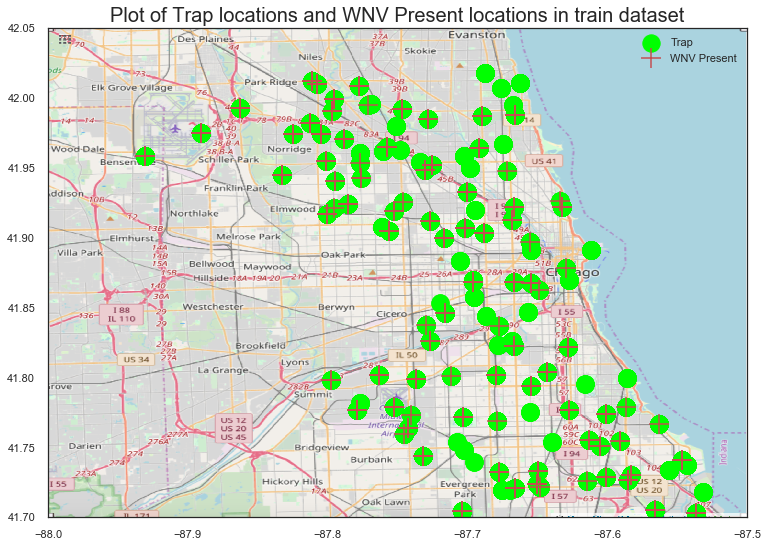

In [35]:
log()
# display df_train distribution
mapdata = plt.imread('../images/map1.png')
fig, ax = plt.subplots(figsize = (16,9))
temp_df=df_train[df_train['WnvPresent']==0]
ax.scatter(temp_df.Longitude, temp_df.Latitude, zorder=1, c = 'lime', s=300, label = 'Trap')
temp_df=df_train[df_train['WnvPresent']==1]
ax.scatter(temp_df.Longitude, temp_df.Latitude, zorder=1, c='r', s=400,marker='+', label= 'WNV Present')
ax.set_title('Plot of Trap locations and WNV Present locations in train dataset', size = 20)
BBox=(-88,-87.5,41.7,42.05)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapdata, zorder=0, extent = BBox, aspect= 'equal');
ax.legend()

## Testing Dataset

Overview:
* Observations: 116,293
* Features: 11
* Missing Values: None
* Duplicated Observations: 1,533

In [36]:
log()
# Check the shape of df_train
print(f'Training dataset has {df_test.shape[0]} observations and {df_test.shape[1]} features')
# Check for missing values
print(f'Training dataset have {df_test.isnull().sum().sum()} NaNs')
# Check for duplicates
df_columns = (list(df_test.columns))
df_columns.remove('Id')
print(f'Training dataset have {df_test[df_test.duplicated(df_columns)].shape[0]} duplicated observations')

[LOG 2019-11-08 11:12:41.867602]
Training dataset has 116293 observations and 11 features
Training dataset have 0 NaNs
Training dataset have 1533 duplicated observations


The testing dataset is bigger than the training dataset

In [37]:
log()
df_test.columns

[LOG 2019-11-08 11:12:42.044279]


Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

### Date

In [38]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[1]}</b> - {df_test.Date.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.Date.value_counts(normalize=True)}\n')
print()
n_nan = df_test.Date.isnull().sum()
if n_nan > 0:
    print(f'{df_test.Date} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.055385]


<b>Date</b> - object

Values:

2012-07-09    0.011118
2012-08-03    0.011024
2012-07-27    0.011024
2012-07-19    0.010835
2010-07-13    0.010809
                ...   
2008-07-21    0.010388
2010-09-23    0.010388
2014-10-02    0.010388
2010-07-01    0.010388
2010-09-16    0.010388
Name: Date, Length: 95, dtype: float64




In [39]:
log()
df_test[df_test['Date'] == '2012-07-09']['Address'].value_counts()

[LOG 2019-11-08 11:12:42.085093]


ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA    22
5800 North Ridge Avenue, Chicago, IL 60660, USA                         20
7000 North Moselle Avenue, Chicago, IL 60646, USA                       19
5800 North Pulaski Road, Chicago, IL 60646, USA                         16
3600 North Pittsburgh Avenue, Chicago, IL 60634, USA                    16
                                                                        ..
3800 North California Avenue, Chicago, IL 60618, USA                     8
South Cottage Grove Avenue, Chicago, IL, USA                             8
8900 South Muskegon Avenue, Chicago, IL 60617, USA                       8
6100 South Melvina Avenue, Chicago, IL 60638, USA                        8
3300 West 104th Street, Chicago, IL 60655, USA                           8
Name: Address, Length: 151, dtype: int64

The highest amount of traps recorded in the testing dataset was on 2012-07-09, with the highest number of traps recorded were from O'Hare Airport. 

### Address

In [40]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[2]}</b> - {df_test.Address.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.Address.value_counts(normalize=True)}\n')
print()
n_nan = df_test.Address.isnull().sum()
if n_nan > 0:
    print(f'{df_test.Address} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.108268]


<b>Address</b> - object

Values:

ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA    0.012623
4100 North Oak Park Avenue, Chicago, IL 60634, USA                      0.007369
7000 North Moselle Avenue, Chicago, IL 60646, USA                       0.007068
3600 North Pittsburgh Avenue, Chicago, IL 60634, USA                    0.007000
5800 North Pulaski Road, Chicago, IL 60646, USA                         0.006905
                                                                          ...   
2600 East 136th Street, Chicago, IL 60633, USA                          0.006535
1700 North Ashland Avenue, Chicago, IL 60622, USA                       0.006535
1000 West 95th Street, Chicago, IL 60643, USA                           0.006535
2500 South Throop Street, Chicago, IL 60608, USA                        0.006535
South Oglesby Avenue, Chicago, IL, USA                                  0.006535
Name: Address, Length: 151, dtype: float64




The highest amount of entries recorded were from O'Hare International Airport

### Species

In [41]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[3]}</b> - {df_test.Species.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.Species.value_counts(normalize=True)}\n')
print()
n_nan = df_test.Species.isnull().sum()
if n_nan > 0:
    print(f'{df_test.Species} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.140001]


<b>Species</b> - object

Values:

CULEX PIPIENS/RESTUANS    0.132072
CULEX RESTUANS            0.126147
CULEX PIPIENS             0.124866
CULEX SALINARIUS          0.123438
CULEX TERRITANS           0.123404
CULEX TARSALIS            0.123369
UNSPECIFIED CULEX         0.123352
CULEX ERRATICUS           0.123352
Name: Species, dtype: float64




Culex Pipiens and Restuans have the highest proportion of species altogether.  However, in this test dataset, there seems to be a rather balanced proportion for other species, while in the training dataset there is an unbalanced proportion of other species. 

### Block

In [42]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[4]}</b> - {df_test.Block.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.Block.value_counts(normalize=True)}\n')
print()
n_nan = df_test.Block.isnull().sum()
if n_nan > 0:
    print(f'{df_test.Block} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.172651]


<b>Block</b> - int64

Values:

10    0.072094
11    0.065473
22    0.039521
40    0.032753
37    0.026450
        ...   
27    0.006535
47    0.006535
20    0.006535
98    0.006535
63    0.006535
Name: Block, Length: 65, dtype: float64




In the testing dataset, there is a more even spread of data amongst the blocks. Though block 10 is still the largest, it is not as far apart from the next highest proportion block as compared to the training dataset. 

### Street

In [43]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[5]}</b> - {df_test.Street.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.Street.value_counts(normalize=True)}\n')
print()
n_nan = df_test.Street.isnull().sum()
if n_nan > 0:
    print(f'{df_test.Street} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.190362]


<b>Street</b> - object

Values:

 N OAK PARK AVE        0.013905
 N PULASKI RD          0.013449
 N CANNON DR           0.013346
 S ASHLAND AVE         0.013165
 S STONY ISLAND AVE    0.013139
                         ...   
 S RACINE AVE          0.006535
 W 64TH ST             0.006535
 S MACKINAW            0.006535
 W DAKIN ST            0.006535
 N STAVE ST            0.006535
Name: Street, Length: 139, dtype: float64




In [44]:
log()
df_test[df_test['Street']== ' N OAK PARK AVE']

[LOG 2019-11-08 11:12:42.223326]


Id        Date                                            Address  \
0            1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1            2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2            3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3            4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4            5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
...        ...         ...                                                ...   
115200  115201  2014-10-02  6500 North Oak Park Avenue, Chicago, IL 60631,...   
115201  115202  2014-10-02  6500 North Oak Park Avenue, Chicago, IL 60631,...   
115202  115203  2014-10-02  6500 North Oak Park Avenue, Chicago, IL 60631,...   
115203  115204  2014-10-02  6500 North Oak Park Avenue, Chicago, IL 60631,...   
115204  115205  2014-10-02  6500 North Oak Park Avenue, Chicago, IL 60631,...   

                       Species  Block           Street  Trap  \
0       CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1               CULEX RESTUANS     41   N OAK PARK AVE  T002   
2                CULEX PIPIENS     41   N OAK PARK AVE  T002   
3             CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4              CULEX TERRITANS     41   N OAK PARK AVE  T002   
...                        ...    ...              ...   ...   
115200        CULEX SALINARIUS     65   N OAK PARK AVE  T143   
115201         CULEX TERRITANS     65   N OAK PARK AVE  T143   
115202          CULEX TARSALIS     65   N OAK PARK AVE  T143   
115203       UNSPECIFIED CULEX     65   N OAK PARK AVE  T143   
115204         CULEX ERRATICUS     65   N OAK PARK AVE  T143   

                   AddressNumberAndStreet   Latitude  Longitude  \
0       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
1       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
3       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
4       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
...                                   ...        ...        ...   
115200  6500  N OAK PARK AVE, Chicago, IL  41.999129 -87.795585   
115201  6500  N OAK PARK AVE, Chicago, IL  41.999129 -87.795585   
115202  6500  N OAK PARK AVE, Chicago, IL  41.999129 -87.795585   
115203  6500  N OAK PARK AVE, Chicago, IL  41.999129 -87.795585   
115204  6500  N OAK PARK AVE, Chicago, IL  41.999129 -87.795585   

        AddressAccuracy  
0                     9  
1                     9  
2                     9  
3                     9  
4                     9  
...                 ...  
115200                8  
115201                8  
115202                8  
115203                8  
115204                8  

[1617 rows x 11 columns]

There is also a relatively more even spread of test data collected for each road. The only road that remains on the top 5 entries is S Stony Island Ave. This is possibly so because this test dataset is more balanced. 

### Trap

In [45]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[6]}</b> - {df_test.Trap.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.Trap.value_counts(normalize=True)}\n')
print()
n_nan = df_test.Trap.isnull().sum()
if n_nan > 0:
    print(f'{df_test.Trap} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.266420]


<b>Trap</b> - object

Values:

T009     0.013139
T035     0.013070
T900     0.012623
T002     0.007369
T008     0.007068
           ...   
T143     0.006535
T070     0.006535
T218A    0.006535
T107     0.006535
T090B    0.006535
Name: Trap, Length: 149, dtype: float64




Like the street addresses, there is a relatively even proportion of traps used. This also could be because of the more balanced dataset.

### AddressNumberAndStreet

In [46]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[7]}</b> - {df_test.AddressNumberAndStreet.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.AddressNumberAndStreet.value_counts(normalize=True)}\n')
print()
n_nan = df_test.AddressNumberAndStreet.isnull().sum()
if n_nan > 0:
    print(f'{df_test.AddressNumberAndStreet} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.299461]


<b>AddressNumberAndStreet</b> - object

Values:

1000  W OHARE AIRPORT, Chicago, IL     0.012623
4100  N OAK PARK AVE, Chicago, IL      0.007369
7000  N MOSELL AVE, Chicago, IL        0.007068
3600  N PITTSBURGH AVE, Chicago, IL    0.007000
5800  N PULASKI RD, Chicago, IL        0.006905
                                         ...   
1500  N LONG AVE, Chicago, IL          0.006535
8100  W 37TH PL., Chicago, IL          0.006535
8900  S MUSKEGON AVE, Chicago, IL      0.006535
1100  S STATE ST, Chicago, IL          0.006535
1100  S AVENUE L, Chicago, IL          0.006535
Name: AddressNumberAndStreet, Length: 151, dtype: float64




This is slightly different to the street variable that was looked at earlier as that did not include street number. 

### Latitude

In [47]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[8]}</b> - {df_test.Latitude.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.Latitude.value_counts(normalize=True)}\n')
print()
n_nan = df_test.Latitude.isnull().sum()
if n_nan > 0:
    print(f'{df_test.Latitude} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.332103]


<b>Latitude</b> - float64

Values:

41.974689    0.012623
41.954690    0.007369
42.008314    0.007068
41.944869    0.007000
41.984809    0.006905
               ...   
41.797616    0.006535
41.781416    0.006535
41.644612    0.006535
41.883284    0.006535
41.852652    0.006535
Name: Latitude, Length: 151, dtype: float64




### Longitude

In [48]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[9]}</b> - {df_test.Longitude.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.Longitude.value_counts(normalize=True)}\n')
print()
n_nan = df_test.Longitude.isnull().sum()
if n_nan > 0:
    print(f'{df_test.Longitude} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.352160]


<b>Longitude</b> - float64

Values:

-87.890615    0.012623
-87.800991    0.007369
-87.777921    0.007068
-87.832763    0.007000
-87.728492    0.006905
                ...   
-87.614258    0.006535
-87.695443    0.006535
-87.742302    0.006535
-87.776792    0.006535
-87.688267    0.006535
Name: Longitude, Length: 151, dtype: float64




Similarly to the training dataset, the highest proportion on records belong to the latitude and longitude of 41.974689, -87.890615, which is in O'Hare Airport 

### AddressAccuracy

In [49]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_test.columns[10]}</b> - {df_test.AddressAccuracy.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_test.AddressAccuracy.value_counts(normalize=True)}\n')
print()
n_nan = df_test.AddressAccuracy.isnull().sum()
if n_nan > 0:
    print(f'{df_test.AddressAccuracy} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.512020]


<b>AddressAccuracy</b> - int64

Values:

8    0.532904
9    0.342196
5    0.118330
3    0.006570
Name: AddressAccuracy, dtype: float64




In [50]:
log()
df_test[df_test['AddressAccuracy']== 3]['AddressNumberAndStreet']

[LOG 2019-11-08 11:12:42.534439]


256       4300  N ASHLAND AVE OVERPASS, Chicago, IL
257       4300  N ASHLAND AVE OVERPASS, Chicago, IL
258       4300  N ASHLAND AVE OVERPASS, Chicago, IL
259       4300  N ASHLAND AVE OVERPASS, Chicago, IL
260       4300  N ASHLAND AVE OVERPASS, Chicago, IL
                            ...                    
115344    4300  N ASHLAND AVE OVERPASS, Chicago, IL
115345    4300  N ASHLAND AVE OVERPASS, Chicago, IL
115346    4300  N ASHLAND AVE OVERPASS, Chicago, IL
115347    4300  N ASHLAND AVE OVERPASS, Chicago, IL
115348    4300  N ASHLAND AVE OVERPASS, Chicago, IL
Name: AddressNumberAndStreet, Length: 764, dtype: object

Again, the Address Accuracy shows that 67% of the addresses are under the accuracy score of 8 and 9, while the rest has low address accuracy.

## Spray Dataset

Overview:
* Observations: 14,835
* Features: 4
* Missing Values: 584
* Duplicated Observations: 541

In [51]:
log()
# Check the shape of df_train
print(f'Training dataset has {df_spray.shape[0]} observations and {df_spray.shape[1]} features')
# Check for missing values
print(f'Training dataset have {df_spray.isnull().sum().sum()} NaNs')
# Check for duplicates
print(f'Training dataset have {df_spray[df_spray.duplicated(list(df_spray.columns))].shape[0]} duplicated observations')

[LOG 2019-11-08 11:12:42.546601]
Training dataset has 14835 observations and 4 features
Training dataset have 584 NaNs
Training dataset have 541 duplicated observations


The dataset has 14835 observations with 584 NaNs and 541 duplicated observations.

In [52]:
log()
df_spray.columns

[LOG 2019-11-08 11:12:42.582806]


Index(['Date', 'Time', 'Latitude', 'Longitude'], dtype='object')

### Date

In [53]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_spray.columns[0]}</b> - {df_spray.Date.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_spray.Date.value_counts(normalize=True)}\n')
print()
n_nan = df_spray.Date.isnull().sum()
if n_nan > 0:
    print(f'{df_spray.Date} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.593615]


<b>Date</b> - object

Values:

2013-08-15    0.179845
2013-08-29    0.155174
2013-07-17    0.148433
2011-09-07    0.142501
2013-07-25    0.108325
2013-08-22    0.106977
2013-08-08    0.080553
2013-09-05    0.062285
2013-08-16    0.009505
2011-08-29    0.006404
Name: Date, dtype: float64




The bulk of the sprays took place in 2013, while there were only 2 sessions of spray in 2011.

### Time

In [54]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_spray.columns[1]}</b> - {df_spray.Time.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_spray.Time.value_counts(normalize=True)}\n')
print()
n_nan = df_spray.Time.isnull().sum()
if n_nan > 0:
    print(f'{df_spray.Time} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.611446]


<b>Time</b> - object

Values:

7:44:32 PM     0.037962
9:40:27 PM     0.000351
8:55:36 PM     0.000351
9:05:56 PM     0.000351
8:58:26 PM     0.000351
                 ...   
10:42:28 PM    0.000070
10:11:28 PM    0.000070
9:10:59 PM     0.000070
8:39:02 PM     0.000070
7:12:48 PM     0.000070
Name: Time, Length: 8583, dtype: float64


0        6:56:58 PM
1        6:57:08 PM
2        6:57:18 PM
3        6:57:28 PM
4        6:57:38 PM
            ...    
14830    8:34:11 PM
14831    8:35:01 PM
14832    8:35:21 PM
14833    8:35:31 PM
14834    8:35:41 PM
Name: Time, Length: 14835, dtype: object has 584 NaNs


In [55]:
log()
df_spray[df_spray['Time'] == "7:44:32 PM"]

[LOG 2019-11-08 11:12:42.632849]


Date        Time  Latitude  Longitude
489   2011-09-07  7:44:32 PM  41.98646 -87.794225
490   2011-09-07  7:44:32 PM  41.98646 -87.794225
491   2011-09-07  7:44:32 PM  41.98646 -87.794225
492   2011-09-07  7:44:32 PM  41.98646 -87.794225
493   2011-09-07  7:44:32 PM  41.98646 -87.794225
...          ...         ...       ...        ...
1025  2011-09-07  7:44:32 PM  41.98646 -87.794225
1026  2011-09-07  7:44:32 PM  41.98646 -87.794225
1027  2011-09-07  7:44:32 PM  41.98646 -87.794225
1028  2011-09-07  7:44:32 PM  41.98646 -87.794225
1029  2011-09-07  7:44:32 PM  41.98646 -87.794225

[541 rows x 4 columns]

The highest amount of repeats were at 7.44pm. However upon closer inspection, it is uncertain if it was logging error or not as there were 541 rows that were similar. Might be an area covered that has the center of 41.98646, -87.794225

### Latitude

In [56]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_spray.columns[2]}</b> - {df_spray.Latitude.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_spray.Latitude.value_counts(normalize=True)}\n')
print()
n_nan = df_spray.Latitude.isnull().sum()
if n_nan > 0:
    print(f'{df_spray.Latitude} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:42.654962]


<b>Latitude</b> - float64

Values:

41.986460    0.036468
41.995396    0.000741
41.982772    0.000674
41.994484    0.000607
41.985652    0.000607
               ...   
41.899682    0.000067
41.944358    0.000067
41.729532    0.000067
41.959322    0.000067
41.945437    0.000067
Name: Latitude, Length: 12887, dtype: float64




### Longitude

In [57]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_spray.columns[3]}</b> - {df_spray.Longitude.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_spray.Longitude.value_counts(normalize=True)}\n')
print()
n_nan = df_spray.Longitude.isnull().sum()
if n_nan > 0:
    print(f'{df_spray.Longitude} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:43.051942]


<b>Longitude</b> - float64

Values:

-87.794225    0.036468
-87.806911    0.000607
-87.806863    0.000607
-87.816751    0.000472
-87.805711    0.000404
                ...   
-87.805135    0.000067
-87.789482    0.000067
-87.758925    0.000067
-87.706100    0.000067
-87.710575    0.000067
Name: Longitude, Length: 13007, dtype: float64




The longitude and latitude most mentioned in this dataset is  41.98646, -87.794225, which is where the most of the sprays happened at 7.44PM. This might be an area covered that has the center of 41.98646, -87.794225

[LOG 2019-11-08 11:12:43.272023]


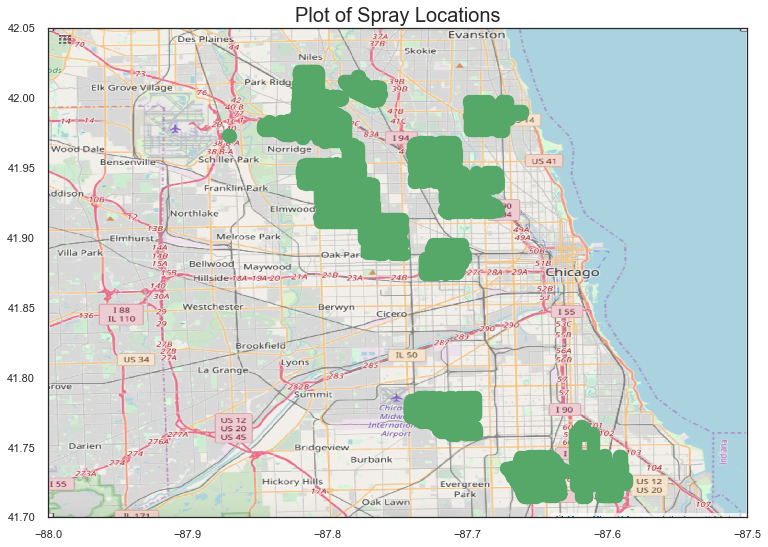

In [58]:
log()
mapdata = plt.imread('../images/map1.png')
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(df_spray.Longitude, df_spray.Latitude, zorder=1, c= 'g', s=150)
ax.set_title('Plot of Spray Locations', size = 20)
BBox=(-88,-87.5,41.7,42.05)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapdata, zorder=0, extent = BBox, aspect= 'equal');

As shown in the map above, only a small subset of places were chosen for spraying. In addition, the places chosen were not demarcated by suburb borders.

In addition, this dataset has a large proportion of duplicates and possibly have wrong entries, it is not as beneficial to run tests on these data in the model. 

## Weather Dataset

Overview:
* Observations: 2,944
* Features: 22
* Missing Values: None
* Duplicated Observations: None

In [59]:
log()
# Check the shape of df_train
print(f'Training dataset has {df_weather.shape[0]} observations and {df_weather.shape[1]} features')
# Check for missing values
print(f'Training dataset have {df_weather.isnull().sum().sum()} NaNs')
# Check for duplicates
print(f'Training dataset have {df_weather[df_weather.duplicated(list(df_weather.columns))].shape[0]} duplicated observations')

[LOG 2019-11-08 11:12:44.719917]
Training dataset has 2944 observations and 22 features
Training dataset have 0 NaNs
Training dataset have 0 duplicated observations


The weather dataset has 2944 observations and has no duplicates

In [60]:
log()
df_weather.columns

[LOG 2019-11-08 11:12:44.811068]


Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

### Station

In [61]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[0]}</b> - {df_weather.Station.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Station.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Station.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Station} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:44.824159]


<b>Station</b> - int64

Values:

1    0.5
2    0.5
Name: Station, dtype: float64




The Stations can be exactly split into half into station 1 and 2

### Date

In [62]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[1]}</b> - {df_weather.Date.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Date.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Date.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Date} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:44.838955]


<b>Date</b> - object

Values:

2011-07-28    0.000679
2009-06-15    0.000679
2013-10-23    0.000679
2011-08-13    0.000679
2008-08-28    0.000679
                ...   
2009-10-29    0.000679
2007-08-07    0.000679
2010-10-08    0.000679
2007-10-30    0.000679
2007-09-07    0.000679
Name: Date, Length: 1472, dtype: float64




The weather dataset shows an even spread of all dates.

### Tmax

In [63]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[2]}</b> - {df_weather.Tmax.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Tmax.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Tmax.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Tmax} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:44.858240]


<b>Tmax</b> - int64

Values:

84     0.043478
79     0.041101
82     0.040082
81     0.039742
83     0.037024
         ...   
102    0.000679
103    0.000679
104    0.000340
41     0.000340
42     0.000340
Name: Tmax, Length: 63, dtype: float64




[LOG 2019-11-08 11:12:45.437234]


Text(0, 0.5, 'Count')

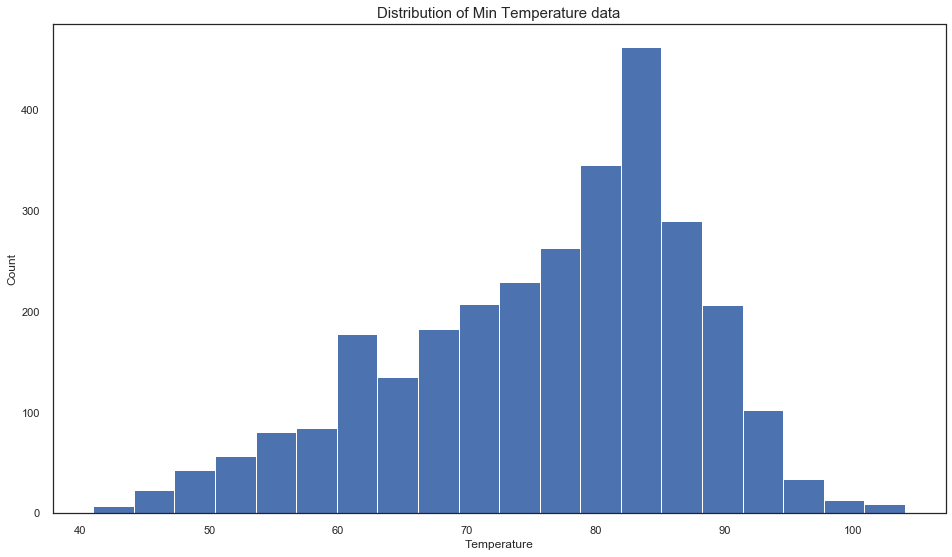

In [64]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['Tmax'], bins = 20)
plt.title('Distribution of Min Temperature data', size = 15)
plt.xlabel('Temperature')
plt.ylabel('Count')

In [65]:
log()
print(df_weather['Tmax'].mean(), df_weather['Tmax'].min(), df_weather['Tmax'].max())

[LOG 2019-11-08 11:12:46.378312]
76.16610054347827 41 104


During the period of May to October, the average Tmax is about 76, while the Min-Max is 41 - 104. However, the highest proporition of temperatures lad around the 79 - 84 mark, suggesting that the distribution of temperatures is positively skewed. 

### Tmin

In [66]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[3]}</b> - {df_weather.Tmin.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Tmin.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Tmin.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Tmin} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:46.482562]


<b>Tmin</b> - int64

Values:

63    0.041101
65    0.037704
60    0.037024
61    0.036005
62    0.035666
66    0.034986
68    0.034986
57    0.034986
64    0.034307
59    0.033967
56    0.033288
69    0.032269
71    0.032269
58    0.031929
70    0.030571
67    0.030231
54    0.027514
49    0.026495
52    0.025136
50    0.024457
55    0.024117
53    0.024117
47    0.023438
44    0.020041
46    0.019701
43    0.019701
51    0.019361
48    0.018682
45    0.018682
72    0.016984
42    0.015625
73    0.015625
41    0.012908
40    0.011209
39    0.009851
74    0.009851
75    0.009511
38    0.007473
37    0.007133
36    0.006793
77    0.006793
34    0.004076
35    0.003736
33    0.003397
79    0.003057
31    0.002378
32    0.002378
29    0.002038
76    0.002038
78    0.001359
80    0.001019
81    0.001019
82    0.000679
83    0.000340
Name: Tmin, dtype: float64




[LOG 2019-11-08 11:12:46.900609]


Text(0, 0.5, 'Count')

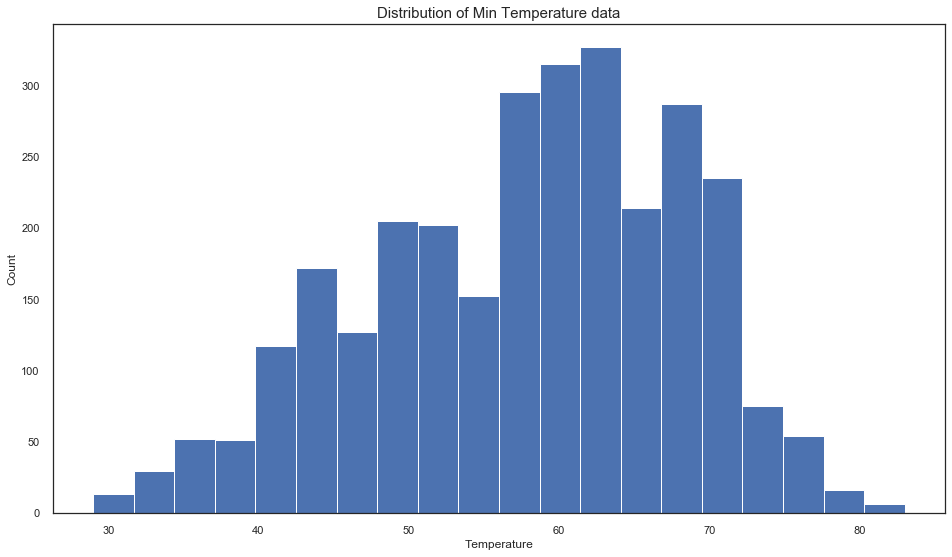

In [67]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['Tmin'], bins = 20)
plt.title('Distribution of Min Temperature data', size = 15)
plt.xlabel('Temperature')
plt.ylabel('Count')

In [68]:
log()
print(df_weather['Tmin'].mean(), df_weather['Tmin'].min(), df_weather['Tmin'].max())

[LOG 2019-11-08 11:12:47.726508]
57.81046195652174 29 83


The average Tmin is 57 degrees, while the min - max is 29 - 83 degrees. However, the larger proportion of temperatures are between 60-68 degrees. This might suggest that the Tmin data is slightly positively skewed.

### Tavg

In [69]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[4]}</b> - {df_weather.Tavg.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Tavg.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Tavg.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Tavg} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:48.510630]


<b>Tavg</b> - object

Values:

73    0.046875
77    0.039742
70    0.039742
75    0.037364
71    0.037024
74    0.036345
72    0.035326
69    0.034986
78    0.034647
76    0.033967
68    0.033628
79    0.033288
66    0.031590
67    0.030231
61    0.029891
64    0.029212
65    0.028533
80    0.028533
63    0.027514
57    0.022758
62    0.022418
60    0.020720
50    0.019361
81    0.018682
53    0.016644
58    0.016644
55    0.016304
54    0.016304
82    0.016304
52    0.015625
56    0.015625
59    0.015285
51    0.012228
83    0.011549
49    0.009851
45    0.009511
47    0.008152
46    0.008152
84    0.007133
44    0.006454
48    0.005774
85    0.005435
86    0.005435
42    0.005095
43    0.004076
M     0.003736
87    0.003057
41    0.002378
40    0.001698
89    0.001359
88    0.001359
39    0.001359
91    0.001359
38    0.000679
90    0.000679
37    0.000679
36    0.000679
92    0.000340
94    0.000340
93    0.000340
Name: Tavg, dtype: float64




In [70]:
log()
df_weather.Tavg.unique()
df_weather[df_weather['Tavg']== 'M']['Tavg'].count()

[LOG 2019-11-08 11:12:48.550757]


11

In [71]:
log()
df_weather['Tavg'] = df_weather['Tavg'].replace('M', np.nan)
df_weather['Tavg'] = [float(x) for x in df_weather['Tavg']]
df_weather['Tavg'].unique()

[LOG 2019-11-08 11:12:48.631790]


array([67., 68., 51., 52., 56., 58., nan, 60., 59., 65., 70., 69., 71.,
       61., 55., 57., 73., 72., 53., 62., 63., 74., 75., 78., 76., 77.,
       66., 80., 64., 81., 82., 79., 85., 84., 83., 50., 49., 46., 48.,
       45., 54., 47., 44., 40., 41., 38., 39., 42., 37., 43., 86., 87.,
       89., 92., 88., 91., 93., 94., 90., 36.])

[LOG 2019-11-08 11:12:48.676298]


Text(0, 0.5, 'Count')

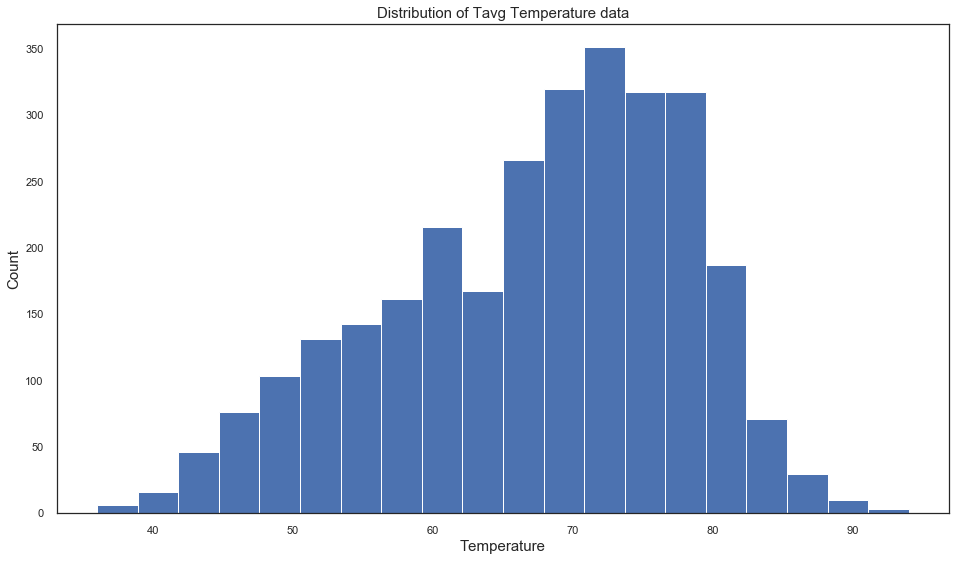

In [72]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['Tavg'], bins = 20)
plt.title('Distribution of Tavg Temperature data', size = 15)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Count', size = 15)

In [73]:
log()
print(df_weather['Tavg'].mean(), df_weather['Tavg'].min(), df_weather['Tavg'].max())

[LOG 2019-11-08 11:12:49.356103]
67.2400272758268 36.0 94.0


The Tavg data contains 11 missing data. Of the valid dataset, the highest proportion of Tavg lies between 70 - 77 degrees. However, the mean calculated is 67 degrees. This would mean that the weather data is positively skewed.

### Depart

In [74]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[5]}</b> - {df_weather.Depart.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Depart.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Depart.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Depart} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:49.487101]


<b>Depart</b> - object

Values:

M      0.500000
 2     0.031590
-1     0.028533
-2     0.027174
 5     0.026155
 1     0.025815
 7     0.025815
 3     0.025476
 0     0.025136
-3     0.024457
 4     0.024117
 6     0.022758
 8     0.020041
-5     0.019361
-4     0.019022
-6     0.016984
 9     0.015965
10     0.015625
-8     0.014606
-7     0.010190
12     0.009511
11     0.009511
-9     0.008492
13     0.007812
-10    0.007473
14     0.007473
15     0.005095
16     0.004076
-11    0.003397
-12    0.002717
17     0.002378
18     0.002038
-14    0.002038
-13    0.001698
19     0.001359
20     0.001359
22     0.001019
-16    0.001019
-15    0.001019
21     0.000679
-17    0.000679
23     0.000340
Name: Depart, dtype: float64




The Departure from normal shows that there is a large proportion of missing values. There is basis for dropping the column.

### DewPoint

In [75]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[6]}</b> - {df_weather.DewPoint.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.DewPoint.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.DewPoint.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.DewPoint} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:49.503712]


<b>DewPoint</b> - int64

Values:

59    0.043478
54    0.042459
55    0.038723
60    0.038383
61    0.037364
52    0.033967
56    0.033628
53    0.033288
65    0.032948
62    0.030910
51    0.030571
50    0.030231
67    0.029891
63    0.029212
57    0.028872
49    0.027853
46    0.025815
66    0.025136
58    0.024796
69    0.023438
47    0.022758
64    0.022758
68    0.022079
48    0.021399
43    0.020720
45    0.020041
44    0.019701
40    0.019361
39    0.018003
41    0.017323
70    0.015285
38    0.014606
42    0.014606
71    0.012568
37    0.012568
36    0.010530
35    0.009851
34    0.009171
31    0.007812
30    0.007473
33    0.007473
32    0.007473
29    0.005774
72    0.005095
73    0.003057
27    0.002717
26    0.002378
28    0.001698
25    0.001359
23    0.001019
24    0.001019
74    0.000679
75    0.000340
22    0.000340
Name: DewPoint, dtype: float64




In [76]:
log()
print(df_weather['DewPoint'].mean(), df_weather['DewPoint'].min(), df_weather['DewPoint'].max())

[LOG 2019-11-08 11:12:49.519067]
53.45788043478261 22 75


[LOG 2019-11-08 11:12:49.529173]


Text(0, 0.5, 'Count')

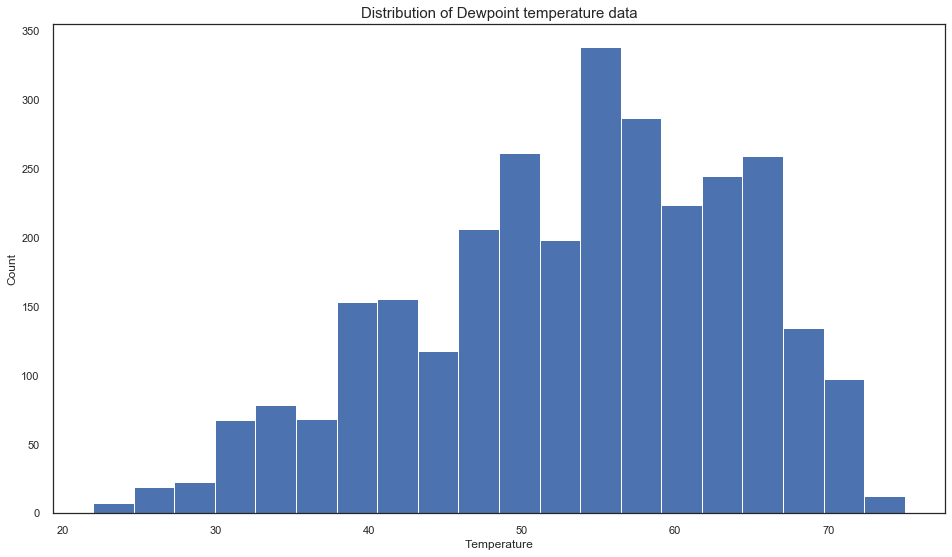

In [77]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['DewPoint'], bins = 20)
plt.title('Distribution of Dewpoint temperature data', size = 15)
plt.xlabel('Temperature')
plt.ylabel('Count')

The dewpoint data shows that there is a mean of 53 degrees, with a mode of 55 - 59 degrees. This shows that the distribution of DewPoint data is positively skewed.

### WetBulb

In [78]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[7]}</b> - {df_weather.WetBulb.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.WetBulb.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.WetBulb.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.WetBulb} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:50.211772]


<b>WetBulb</b> - object

Values:

63    0.045856
65    0.044497
59    0.043818
61    0.041780
64    0.041101
62    0.040082
67    0.039742
66    0.038383
60    0.037704
69    0.036345
57    0.035666
70    0.034647
55    0.033628
71    0.033628
68    0.033288
58    0.032269
56    0.032269
52    0.026495
46    0.024457
72    0.024117
53    0.023438
47    0.020720
51    0.019361
54    0.019022
73    0.019022
50    0.018682
45    0.018003
48    0.017323
74    0.016984
49    0.016984
44    0.015285
42    0.011889
40    0.010530
43    0.010530
75    0.006793
41    0.006454
38    0.005774
39    0.005095
36    0.003057
76    0.002717
77    0.002717
35    0.002717
33    0.001698
34    0.001698
37    0.001698
M     0.001359
32    0.000340
78    0.000340
Name: WetBulb, dtype: float64




In [79]:
log()
df_weather[df_weather['WetBulb'] == 'M']['WetBulb'].count()

[LOG 2019-11-08 11:12:50.432497]


4

In [80]:
log()
df_weather['WetBulb'] = df_weather['WetBulb'].replace('M', np.nan)
df_weather['WetBulb'] = [float(x) for x in df_weather['WetBulb']]

[LOG 2019-11-08 11:12:50.447662]


[LOG 2019-11-08 11:12:50.460258]


Text(0, 0.5, 'Count')

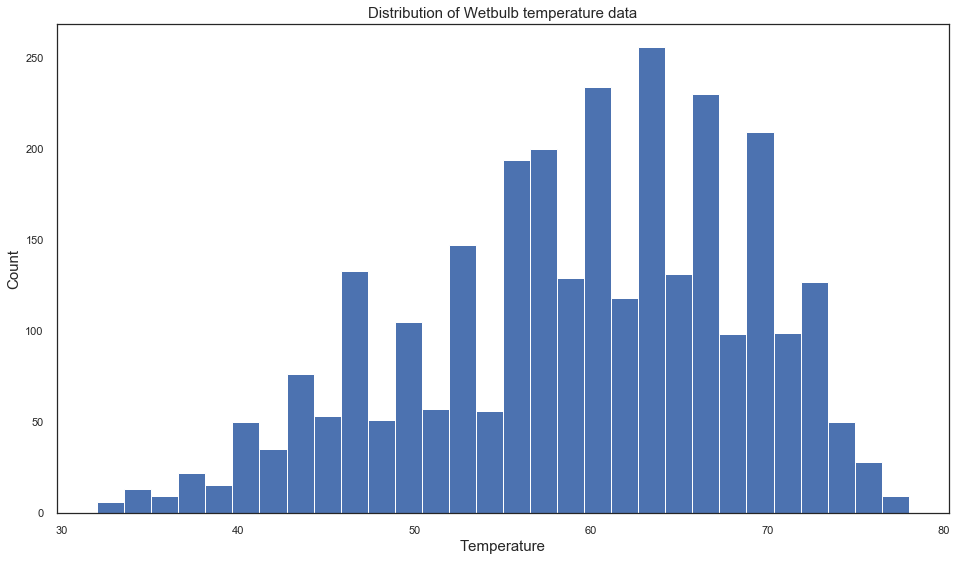

In [81]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['WetBulb'], bins = 30)
plt.title('Distribution of Wetbulb temperature data', size = 15)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Count', size = 15)

In [82]:
log()
print(df_weather['WetBulb'].mean(), df_weather['WetBulb'].min(),
      df_weather['WetBulb'].max(), df_weather['WetBulb'].median())

[LOG 2019-11-08 11:12:51.179600]
59.3108843537415 32.0 78.0 61.0


There are 4 missing values in the wetbulb data. The mean of the data is at 59 deg and the larger proportion of the data lies in the 59 to 65 degrees range. The histogram shows that it is positively skewed. 

### Heat

In [83]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[8]}</b> - {df_weather.Heat.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Heat.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Heat.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Heat} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:51.396152]


<b>Heat</b> - object

Values:

0     0.635190
4     0.029891
1     0.029212
2     0.027514
8     0.022758
3     0.022418
5     0.020720
15    0.019361
12    0.016644
7     0.016644
10    0.016304
11    0.016304
13    0.015625
9     0.015625
6     0.015285
14    0.012228
16    0.009851
20    0.009511
18    0.008152
19    0.008152
21    0.006454
17    0.005774
23    0.005095
22    0.004076
M     0.003736
24    0.002378
25    0.001698
26    0.001359
27    0.000679
28    0.000679
29    0.000679
Name: Heat, dtype: float64




In [84]:
log()
df_weather['Heat'] = df_weather['Heat'].replace('M', np.nan)
df_weather['Heat'] = [float(x) for x in df_weather['Heat']]
df_weather.info()

[LOG 2019-11-08 11:12:51.704882]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2933 non-null float64
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2940 non-null float64
Heat           2933 non-null float64
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(4), int64(5), object(13)
memory usage: 506.1+ KB


[LOG 2019-11-08 11:12:51.725964]


Text(0, 0.5, 'Count')

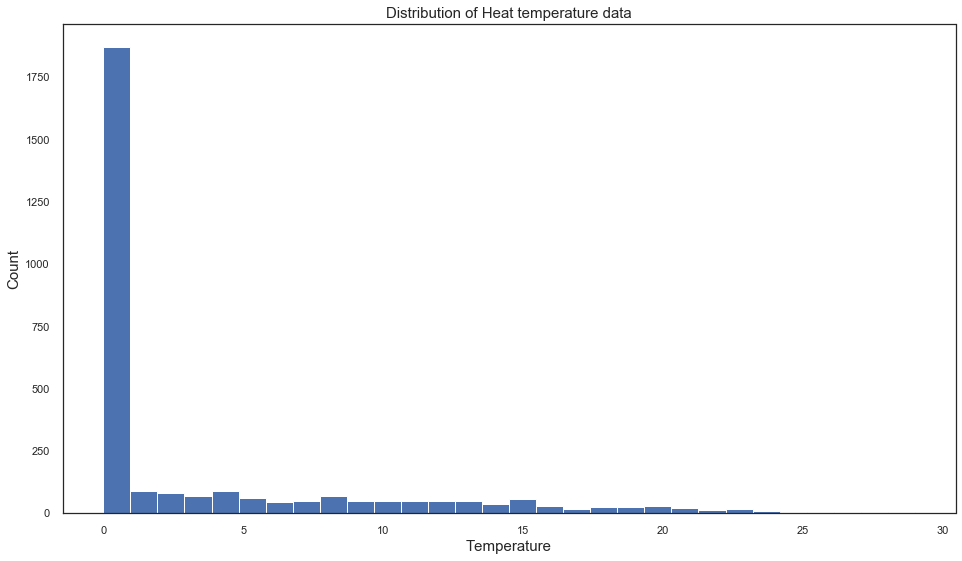

In [85]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['Heat'], bins = 30)
plt.title('Distribution of Heat temperature data', size = 15)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Count', size = 15)

There are 11 missing data in the heat data. There is about 60% of the data having 0 value, leading it to be negative skewed.

### Cool

In [86]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[9]}</b> - {df_weather.Cool.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Cool.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Cool.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Cool} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:52.505637]


<b>Cool</b> - object

Values:

 0    0.389606
 8    0.046875
 5    0.039742
12    0.039742
10    0.037364
 6    0.037024
 9    0.036345
 7    0.035326
 4    0.034986
13    0.034647
11    0.033967
 3    0.033628
14    0.033288
 1    0.031590
 2    0.030231
15    0.028533
16    0.018682
17    0.016304
18    0.011549
19    0.007133
20    0.005435
21    0.005435
M     0.003736
22    0.003057
23    0.001359
26    0.001359
24    0.001359
25    0.000679
29    0.000340
28    0.000340
27    0.000340
Name: Cool, dtype: float64




In [87]:
log()
df_weather[df_weather['Cool'] == 'M']['Cool'].count()

[LOG 2019-11-08 11:12:52.997069]


11

In [88]:
log()
df_weather['Cool'] = df_weather['Cool'].replace('M', np.nan)
df_weather['Cool'] = [ float(x) for x in df_weather['Cool']]

[LOG 2019-11-08 11:12:54.020287]


[LOG 2019-11-08 11:12:54.080888]


Text(0, 0.5, 'Count')

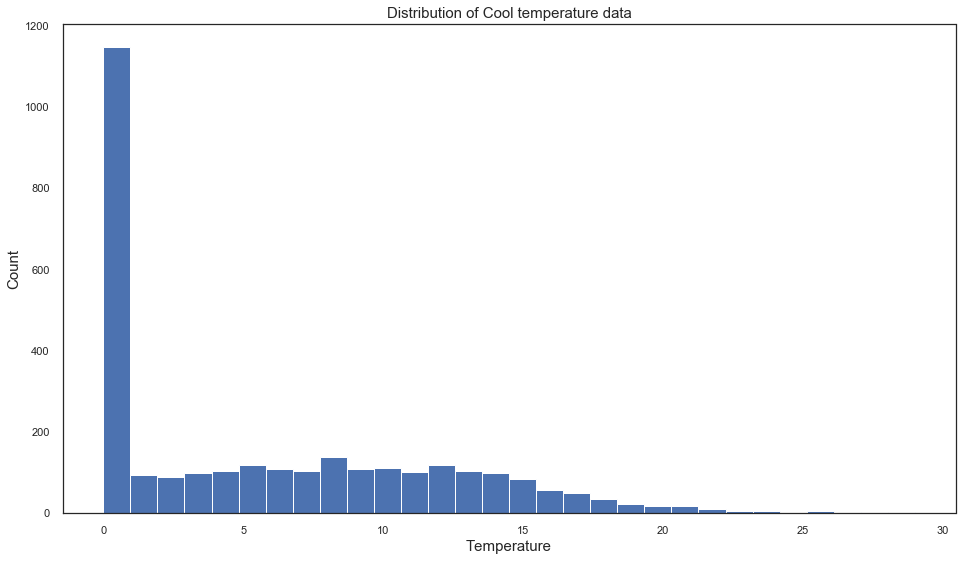

In [89]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['Cool'], bins = 30)
plt.title('Distribution of Cool temperature data', size = 15)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Count', size = 15)

There are 11 missing Cool data. Similarly, there is a large amount of 0 value data, which makes the distribution negatively skewed.

### Sunrise

In [90]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[10]}</b> - {df_weather.Sunrise.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Sunrise.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Sunrise.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Sunrise} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:54.804788]


<b>Sunrise</b> - object

Values:

-       0.500000
0416    0.035326
0417    0.021739
0419    0.013587
0420    0.010870
          ...   
0530    0.002717
0504    0.002717
0449    0.002717
0546    0.002717
0524    0.002717
Name: Sunrise, Length: 122, dtype: float64




The sunrise data has a large proportion of missing values. Hence, it is not advisable to use the data. However, the largest proportion of sunrises occurred around the 4 am.

### Sunset

In [91]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[11]}</b> - {df_weather.Sunset.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Sunset.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Sunset.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Sunset} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:55.282039]


<b>Sunset</b> - object

Values:

-       0.500000
1931    0.032609
1930    0.019022
1929    0.016304
1928    0.010870
          ...   
1853    0.002717
1650    0.002717
1744    0.002717
1706    0.002717
1701    0.002717
Name: Sunset, Length: 119, dtype: float64




The sunrise data has a large proportion of missing values. Hence, it is not advisable to use the data. However, the largest proportion of sunsets is around 7.30pm.

### CodeSum

In [92]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[12]}</b> - {df_weather.CodeSum.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.CodeSum.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.CodeSum.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.CodeSum} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:55.348589]


<b>CodeSum</b> - object

Values:

                 0.546535
RA               0.100543
RA BR            0.080842
BR               0.037364
TSRA RA BR       0.031250
                   ...   
TSRA BR SQ       0.000340
TSRA RA HZ FU    0.000340
RA VCTS          0.000340
BR VCTS          0.000340
TS TSRA RA HZ    0.000340
Name: CodeSum, Length: 98, dtype: float64




There is a large proportion of empty data in this column of the dataframe. However, this does not represent missing data as this data records any weather phenomena that occurs, and thus on days that there is no data it represents that no phenomena observed. 

### Depth

In [93]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[13]}</b> - {df_weather.Depth.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Depth.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Depth.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Depth} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:55.386627]


<b>Depth</b> - object

Values:

0    0.5
M    0.5
Name: Depth, dtype: float64




There is 0 data in this column, half of which is 0 value while the other half is missing. This is to be expected as this represents snow depth, which should not happen in summer.

### Water1

In [94]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[14]}</b> - {df_weather.Water1.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.Water1.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.Water1.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.Water1} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:55.417668]


<b>Water1</b> - object

Values:

M    1.0
Name: Water1, dtype: float64




There is only missing data as this column codes for the water volume equivalent to snow fallen. 

### SnowFall

In [95]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[15]}</b> - {df_weather.SnowFall.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.SnowFall.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.SnowFall.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.SnowFall} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:55.446449]


<b>SnowFall</b> - object

Values:

M      0.500000
0.0    0.495584
  T    0.004076
0.1    0.000340
Name: SnowFall, dtype: float64




In [96]:
log()
df_weather[(df_weather['SnowFall'] == '0.1')| (df_weather['SnowFall'] == '  T')]['SnowFall'].value_counts()

[LOG 2019-11-08 11:12:55.517574]


  T    12
0.1     1
Name: SnowFall, dtype: int64

There are 12 with Trace amounts of Snow, and 1 with 0.1 inches of Snow. In addition, there is 50% of missing data.

### PrecipTotal

In [97]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[16]}</b> - {df_weather.PrecipTotal.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.PrecipTotal.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.PrecipTotal.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.PrecipTotal} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:55.540414]


<b>PrecipTotal</b> - object

Values:

0.00    0.535666
  T     0.108016
0.01    0.043139
0.02    0.021399
0.03    0.015625
          ...   
1.88    0.000340
3.64    0.000340
1.82    0.000340
3.66    0.000340
1.24    0.000340
Name: PrecipTotal, Length: 168, dtype: float64




In [98]:
log()
df_weather['PrecipTotal'].unique()

[LOG 2019-11-08 11:12:55.576197]


array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', 'M', '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

In [99]:
log()
print('missing ', df_weather[df_weather['PrecipTotal']== 'M']['PrecipTotal'].count(),
      'trace ', df_weather[df_weather['PrecipTotal']== '  T']['PrecipTotal'].count())

[LOG 2019-11-08 11:12:55.648925]
missing  2 trace  318


There is 2 missing data, with 318 with Trace amounts of precipitation. 

### StnPressure

In [100]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[17]}</b> - {df_weather.StnPressure.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.StnPressure.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.StnPressure.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.StnPressure} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:55.726969]


<b>StnPressure</b> - object

Values:

29.34    0.043478
29.28    0.042120
29.26    0.041780
29.21    0.036345
29.31    0.036005
           ...   
28.69    0.000340
28.73    0.000340
29.71    0.000340
29.79    0.000340
28.67    0.000340
Name: StnPressure, Length: 104, dtype: float64




In [101]:
log()
df_weather['StnPressure'].unique()

[LOG 2019-11-08 11:12:55.804327]


array(['29.10', '29.18', '29.38', '29.44', '29.39', '29.46', '29.31',
       '29.36', '29.40', '29.57', '29.62', '29.29', '29.21', '29.28',
       '29.20', '29.26', '29.33', '29.49', '29.54', '29.55', '29.23',
       '29.13', '29.19', '29.53', '29.60', '29.34', '29.41', '29.47',
       '29.51', '29.42', '29.43', '29.25', '29.03', '28.82', '28.87',
       '28.88', '29.16', '29.07', '28.84', '28.91', '29.24', 'M', '29.30',
       '29.12', '29.45', '29.56', '29.32', '29.05', '29.11', '29.06',
       '29.22', '29.08', '29.14', '29.37', '29.35', '29.15', '29.17',
       '29.48', '29.52', '29.27', '29.50', '28.59', '28.67', '28.75',
       '29.02', '29.79', '29.86', '29.63', '29.70', '28.95', '29.01',
       '28.79', '28.85', '28.97', '28.89', '28.94', '28.93', '28.98',
       '28.96', '29.00', '29.66', '29.09', '28.90', '29.04', '29.59',
       '29.65', '29.58', '29.61', '29.64', '29.71', '29.67', '28.80',
       '28.73', '29.68', '28.74', '28.55', '28.63', '28.92', '28.99',
       '28.81',

In [102]:
log()
df_weather[df_weather['StnPressure'] == 'M']['StnPressure'].count()

[LOG 2019-11-08 11:12:55.821788]


4

In [103]:
log()
df_weather['StnPressure'] = df_weather['StnPressure'].replace('M', np.nan)
df_weather['StnPressure'] = [float(x) for x in df_weather['StnPressure']]

[LOG 2019-11-08 11:12:56.471098]


[LOG 2019-11-08 11:12:56.533373]


Text(0, 0.5, 'Count')

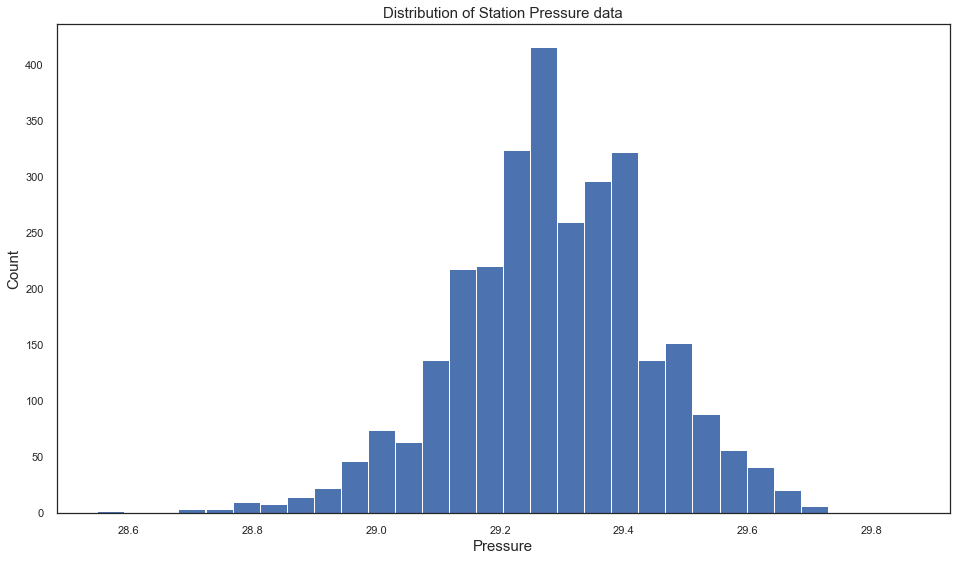

In [104]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['StnPressure'], bins = 30)
plt.title('Distribution of Station Pressure data', size = 15)
plt.xlabel('Pressure', size = 15)
plt.ylabel('Count', size = 15)

In [105]:
log()
print(df_weather['StnPressure'].mean(), df_weather['StnPressure'].min(),
      df_weather['StnPressure'].max(), df_weather['StnPressure'].median())

[LOG 2019-11-08 11:12:57.335927]
29.28442857142859 28.55 29.86 29.28


There are 4 missing entries in the StnPressure data. The data looks normally distributed and the mean of the test lies with the median.

### SeaLevel

In [106]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[18]}</b> - {df_weather.SeaLevel.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.SeaLevel.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.SeaLevel.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.SeaLevel} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:57.356873]


<b>SeaLevel</b> - object

Values:

30.00    0.032609
29.98    0.028872
29.94    0.028872
29.92    0.028193
29.89    0.027853
           ...   
30.41    0.000340
29.23    0.000340
30.52    0.000340
29.43    0.000340
30.39    0.000340
Name: SeaLevel, Length: 102, dtype: float64




In [107]:
log()
df_weather[df_weather['SeaLevel'] == 'M']['SeaLevel'].count()

[LOG 2019-11-08 11:12:57.412469]


9

In [108]:
log()
df_weather['SeaLevel'] = df_weather['SeaLevel'].replace('M', np.nan)
df_weather['SeaLevel'] = [float(x) for x in df_weather['SeaLevel']]

[LOG 2019-11-08 11:12:57.448653]


[LOG 2019-11-08 11:12:57.838242]


Text(0, 0.5, 'Count')

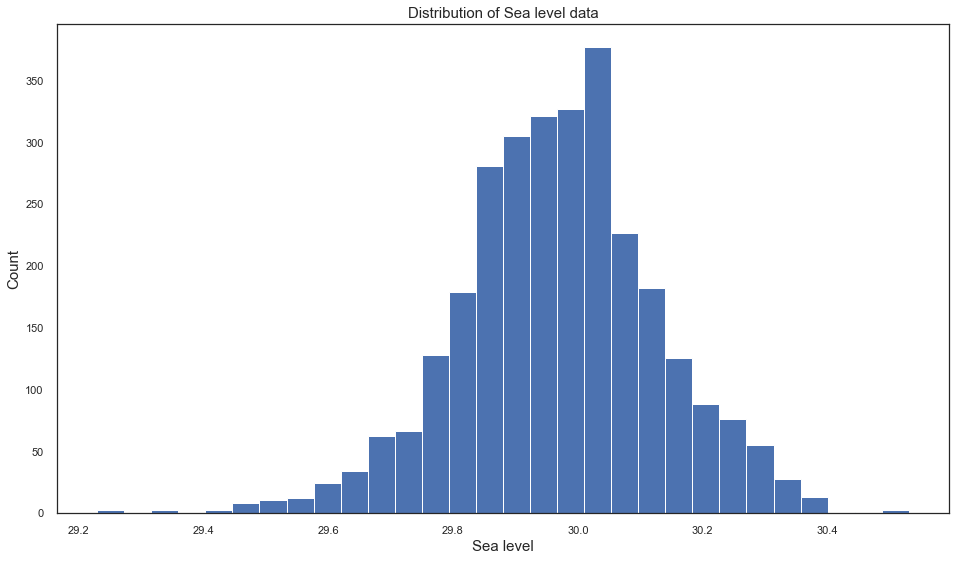

In [109]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['SeaLevel'], bins = 30)
plt.title('Distribution of Sea level data', size = 15)
plt.xlabel('Sea level', size = 15)
plt.ylabel('Count', size = 15)

In [110]:
log()
print(df_weather['SeaLevel'].mean(), df_weather['SeaLevel'].min(),
      df_weather['SeaLevel'].max(), df_weather['SeaLevel'].median())

[LOG 2019-11-08 11:12:58.634589]
29.968129471890993 29.23 30.53 29.97


There is 9 missing data found in the SeaLevel data. The data looks normally distributed, with the median lying close to the mean.

### ResultSpeed

In [111]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[19]}</b> - {df_weather.ResultSpeed.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.ResultSpeed.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.ResultSpeed.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.ResultSpeed} has {n_nan} NaNs')

[LOG 2019-11-08 11:12:58.851476]


<b>ResultSpeed</b> - float64

Values:

5.9     0.016644
6.4     0.015965
6.2     0.014266
5.3     0.014266
4.9     0.012908
          ...   
21.4    0.000340
17.1    0.000340
22.6    0.000340
19.6    0.000340
0.2     0.000340
Name: ResultSpeed, Length: 190, dtype: float64




In [112]:
log()
df_weather[df_weather['ResultSpeed'] == 'M']['ResultSpeed'].count()

[LOG 2019-11-08 11:12:59.349879]


0

[LOG 2019-11-08 11:12:59.498129]


Text(0, 0.5, 'Count')

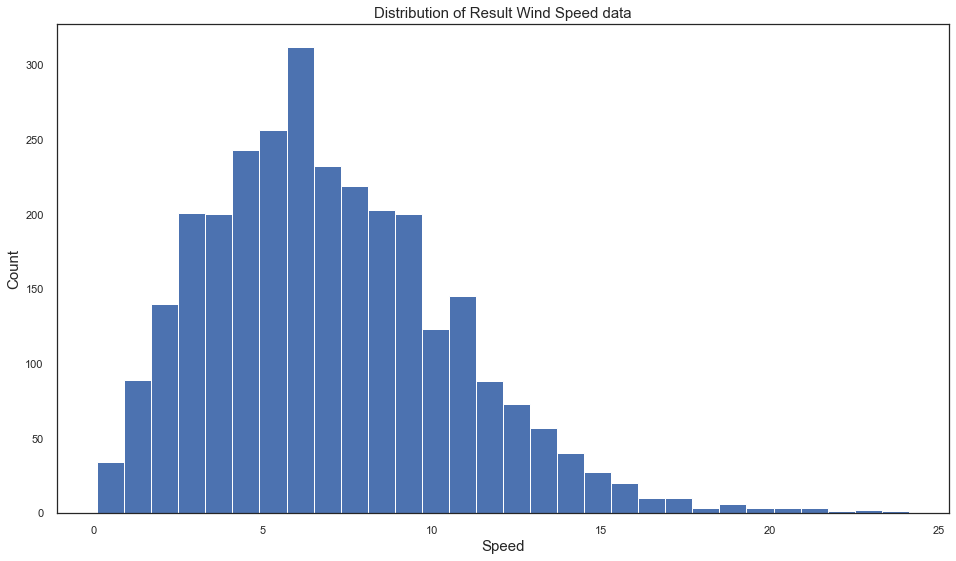

In [113]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['ResultSpeed'], bins = 30)
plt.title('Distribution of Result Wind Speed data', size = 15)
plt.xlabel('Speed', size = 15)
plt.ylabel('Count', size = 15)

In [114]:
log()
print(df_weather['ResultSpeed'].mean(), df_weather['ResultSpeed'].min(),
      df_weather['ResultSpeed'].max(), df_weather['ResultSpeed'].median())

[LOG 2019-11-08 11:13:00.259797]
6.960665760869569 0.1 24.1 6.4


The result wind speed data shows that there is a slight negative skew.

### ResultDir

In [115]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[20]}</b> - {df_weather.ResultDir.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.ResultDir.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.ResultDir.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.ResultDir} has {n_nan} NaNs')

[LOG 2019-11-08 11:13:00.273498]


<b>ResultDir</b> - int64

Values:

21    0.052989
3     0.047215
23    0.046875
19    0.046875
24    0.041440
4     0.041101
20    0.040082
22    0.039402
5     0.038383
6     0.037704
2     0.037364
25    0.036005
7     0.033288
26    0.031929
18    0.028533
27    0.028193
28    0.026495
36    0.024457
29    0.024117
8     0.023098
30    0.021739
9     0.021399
1     0.021060
31    0.020720
17    0.020041
11    0.020041
16    0.018682
12    0.016984
34    0.016644
14    0.016644
32    0.015965
10    0.015285
13    0.012908
35    0.012568
15    0.012228
33    0.011549
Name: ResultDir, dtype: float64




In [116]:
log()
df_weather[df_weather['ResultDir'] == 'M']['ResultDir'].count()

[LOG 2019-11-08 11:13:00.356382]


0

[LOG 2019-11-08 11:13:00.390683]


Text(0, 0.5, 'Count')

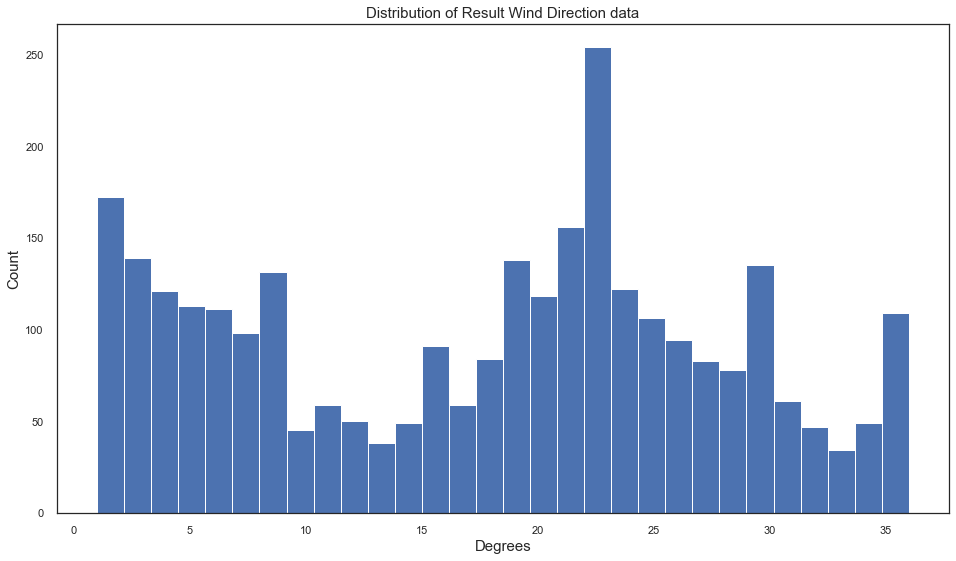

In [117]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['ResultDir'], bins = 30)
plt.title('Distribution of Result Wind Direction data', size = 15)
plt.xlabel('Degrees', size = 15)
plt.ylabel('Count', size = 15)

There is a resultant wind direction that is not normally distributed. There is no missing values.

### AvgSpeed

In [118]:
log()
# Display object type and values for each feature
display(Markdown(f'<b>{df_weather.columns[21]}</b> - {df_weather.AvgSpeed.dtype}'))
display(Markdown(f'Values:'))
print(f'{df_weather.AvgSpeed.value_counts(normalize=True)}\n')
print()
n_nan = df_weather.AvgSpeed.isnull().sum()
if n_nan > 0:
    print(f'{df_weather.AvgSpeed} has {n_nan} NaNs')

[LOG 2019-11-08 11:13:01.283328]


<b>AvgSpeed</b> - object

Values:

6.9     0.021399
5.8     0.020380
7.4     0.018682
8.1     0.016644
7.0     0.015965
          ...   
23.1    0.000340
15.9    0.000340
16.0    0.000340
17.9    0.000340
17.6    0.000340
Name: AvgSpeed, Length: 178, dtype: float64




In [119]:
log()
df_weather[df_weather['AvgSpeed'] == 'M']['AvgSpeed'].count()

[LOG 2019-11-08 11:13:01.458558]


3

In [120]:
log()
df_weather['AvgSpeed'] = df_weather['AvgSpeed'].replace('M', np.nan)
df_weather['AvgSpeed'] = [float(x) for x in df_weather['AvgSpeed']]

[LOG 2019-11-08 11:13:01.550150]


[LOG 2019-11-08 11:13:02.690626]


Text(0, 0.5, 'Count')

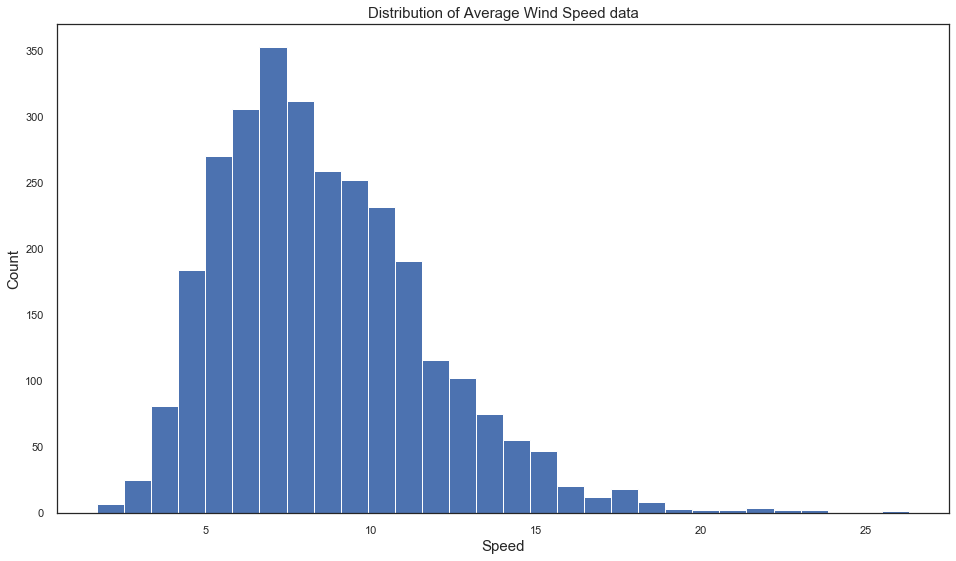

In [121]:
log()
plt.figure(figsize = (16,9))
plt.hist(df_weather['AvgSpeed'], bins = 30)
plt.title('Distribution of Average Wind Speed data', size = 15)
plt.xlabel('Speed', size = 15)
plt.ylabel('Count', size = 15)

In [122]:
log()
print(df_weather['AvgSpeed'].mean(), df_weather['AvgSpeed'].min(),
      df_weather['AvgSpeed'].max(), df_weather['AvgSpeed'].median())

[LOG 2019-11-08 11:13:03.928375]
8.580448826929606 1.7 26.3 8.1


The mean average speed for wind is 8.5, and the data is negatively skewed. 

## Comparison Between df_weather and df_train 

In [123]:
log()
df = pd.merge(df_train, df_weather, how="inner", on="Date")
df= df.replace('M', -1).replace('-', -1).replace('T', -1).replace(' T', -1).replace('  T', -1)

[LOG 2019-11-08 11:13:04.303668]


In [124]:
log()
df["Tavg"] = pd.to_numeric(df["Tavg"])
df["Depart"] = pd.to_numeric(df["Depart"])
df["WetBulb"] = pd.to_numeric(df["WetBulb"])
df["Cool"] = pd.to_numeric(df["Cool"])
df["Sunrise"] = pd.to_numeric(df["Sunrise"])
df["Sunset"] = pd.to_numeric(df["Sunset"])
df["Depth"] = pd.to_numeric(df["Depth"])
df["SnowFall"] = pd.to_numeric(df["SnowFall"])
df["PrecipTotal"] = pd.to_numeric(df["PrecipTotal"])
df["StnPressure"] = pd.to_numeric(df["StnPressure"])
df["SeaLevel"] = pd.to_numeric(df["SeaLevel"])
df["AvgSpeed"] = pd.to_numeric(df["AvgSpeed"])

[LOG 2019-11-08 11:13:05.468394]


In [125]:
log()
df.head()

[LOG 2019-11-08 11:13:05.681421]


Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     41   N OAK PARK AVE  T002   
3          CULEX RESTUANS     41   N OAK PARK AVE  T002   
4          CULEX RESTUANS     62    N MANDELL AVE  T007   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
4   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   

   ...  CodeSum  Depth Water1 SnowFall  PrecipTotal  StnPressure  SeaLevel  \
0  ...    BR HZ      0     -1      0.0          0.0        29.39     30.11   
1  ...    BR HZ     -1     -1     -1.0          0.0        29.44     30.09   
2  ...    BR HZ      0     -1      0.0          0.0        29.39     30.11   
3  ...    BR HZ     -1     -1     -1.0          0.0        29.44     30.09   
4  ...    BR HZ      0     -1      0.0          0.0        29.39     30.11   

   ResultSpeed  ResultDir  AvgSpeed  
0          5.8         18       6.5  
1          5.8         16       7.4  
2          5.8         18       6.5  
3          5.8         16       7.4  
4          5.8         18       6.5  

[5 rows x 35 columns]

### Wet Bulb temperature vs WNV presence

[LOG 2019-11-08 11:13:05.908016]


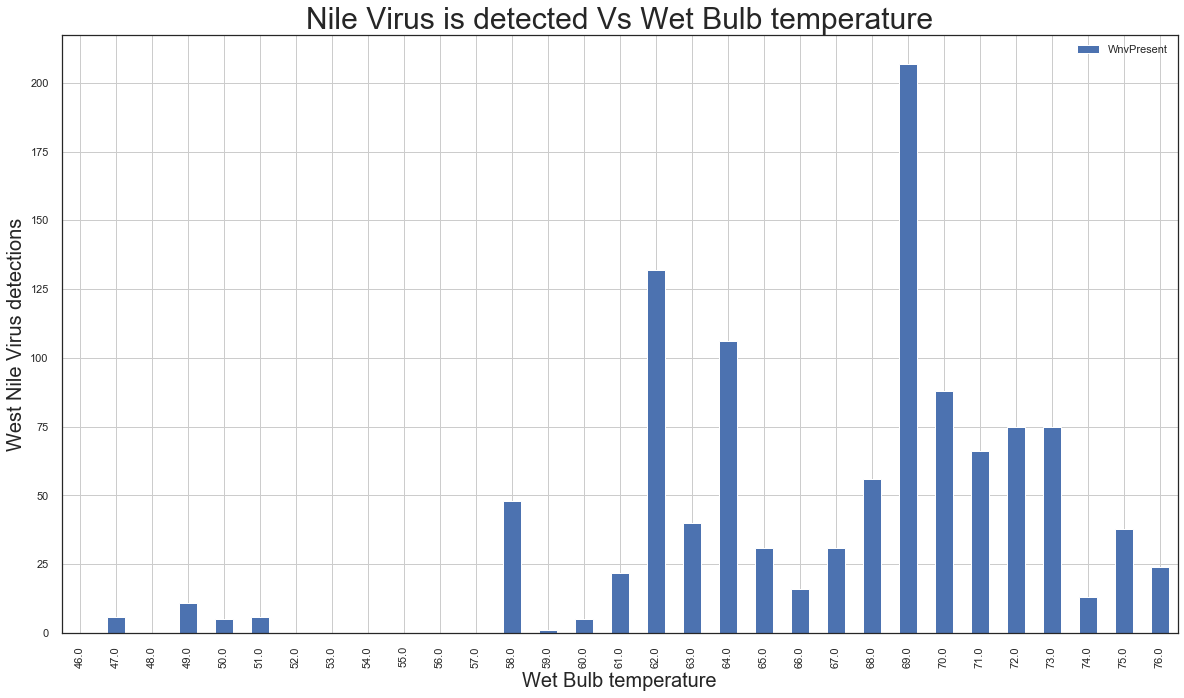

In [126]:
log()
single_barplot(df=df,x='WetBulb',
                   y='WnvPresent',
                   title='Nile Virus is detected Vs Wet Bulb temperature',
                   xlab='Wet Bulb temperature',
                   ylab='West Nile Virus detections')

West Nile Virus is detected more frequently during days with a higher wet bulb temperature.

### Cool degree days vs WNV presence

[LOG 2019-11-08 11:13:07.483115]


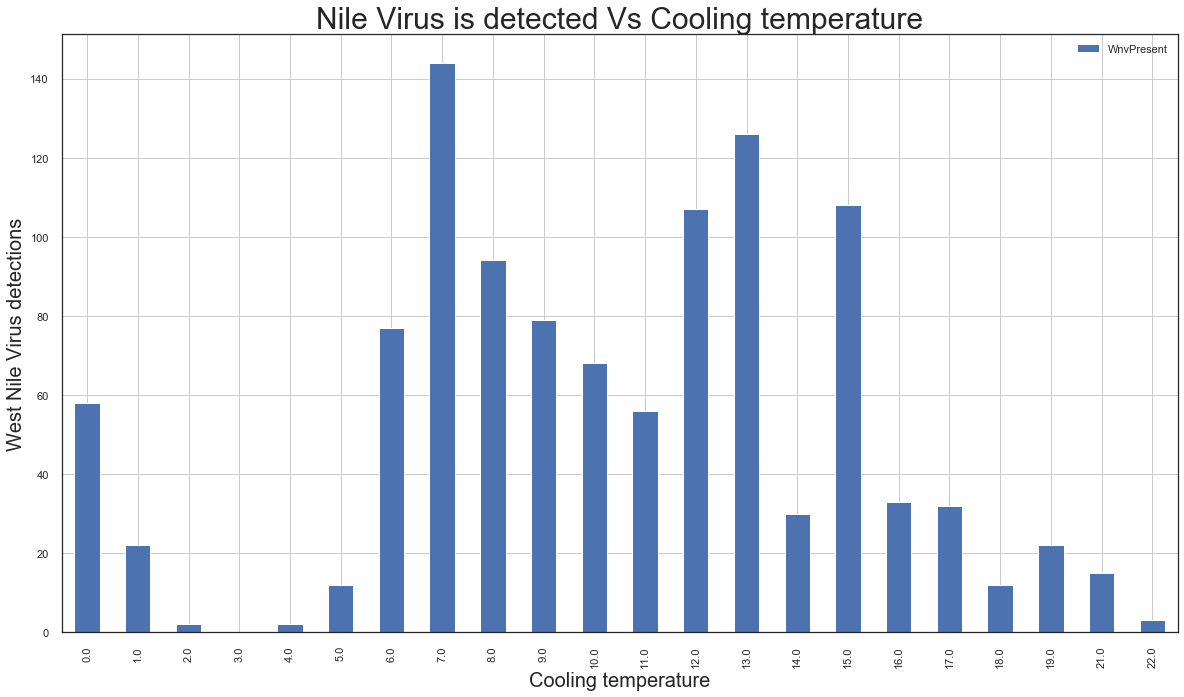

In [127]:
log()
single_barplot(df=df,
               x='Cool',
               y='WnvPresent',
               title='Nile Virus is detected Vs Cooling temperature',
               xlab='Cooling temperature',
               ylab='West Nile Virus detections')

West Nile Virus is detected more frequently during days with cooling turned on from 5 to 21 differential temperature.

### Precipitation vs WNV presence

[LOG 2019-11-08 11:13:08.848669]


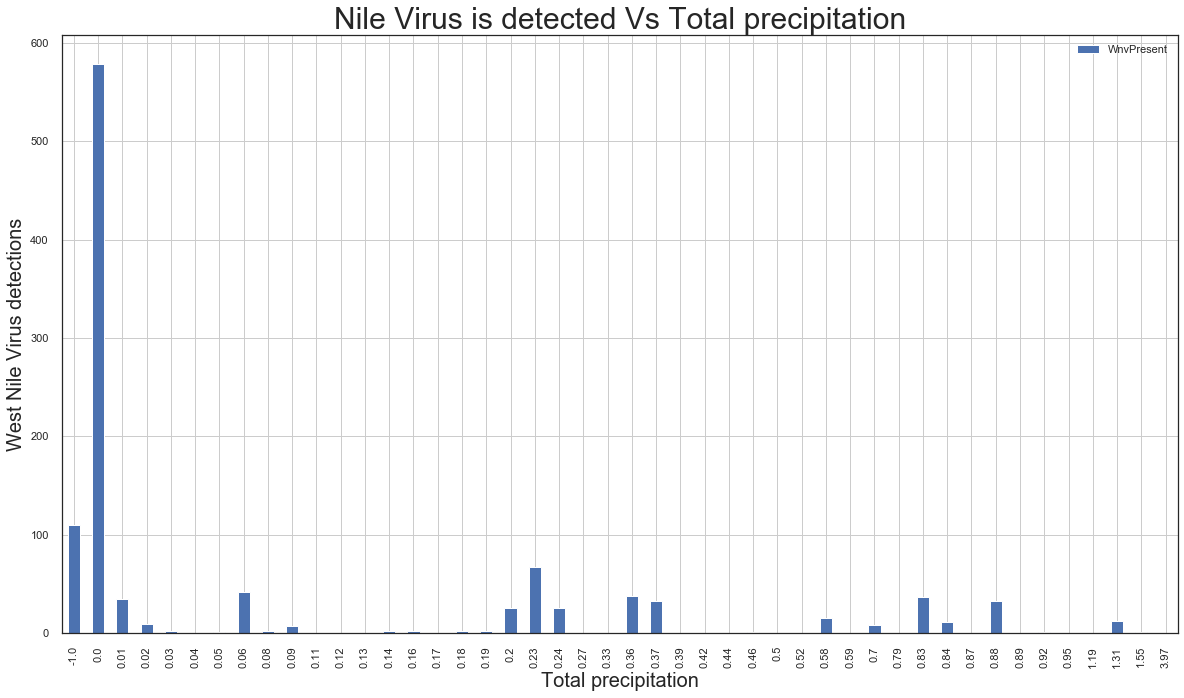

In [128]:
log()
single_barplot(df=df,
               x='PrecipTotal',
               y='WnvPresent',
               title='Nile Virus is detected Vs Total precipitation',
               xlab='Total precipitation',
               ylab='West Nile Virus detections')

West Nile Virus is detected more frequently during days with 0 precipitation total.

### Average Temperature vs WNV presence

[LOG 2019-11-08 11:13:10.968541]


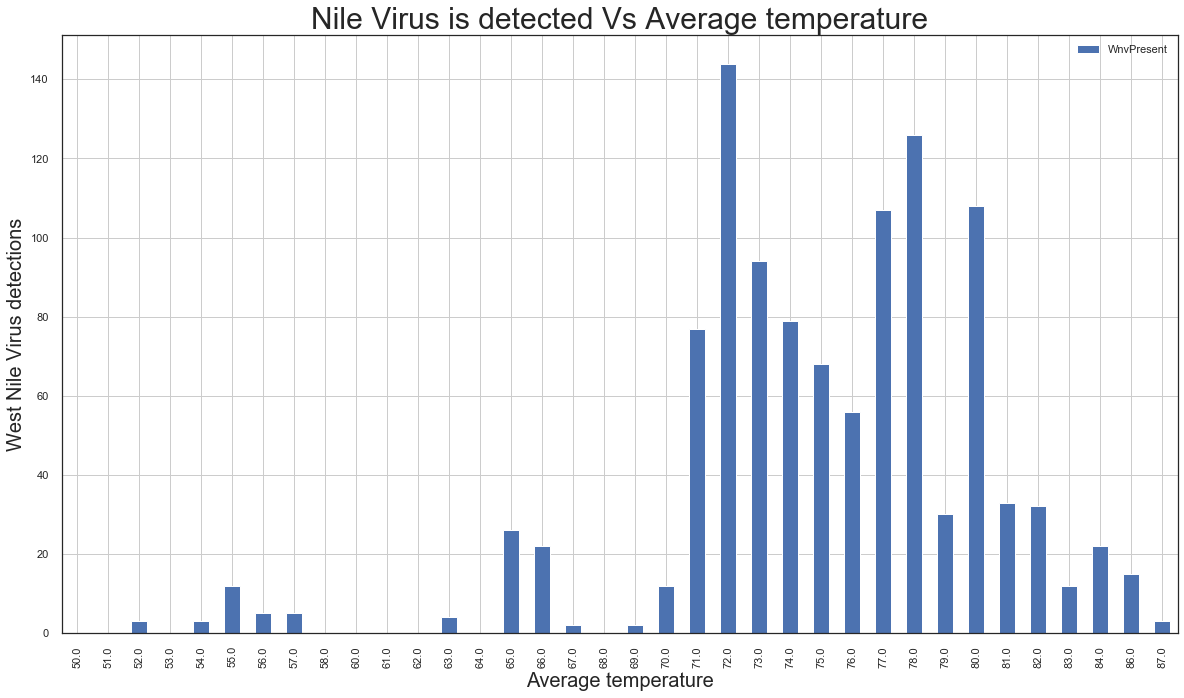

In [129]:
log()
single_barplot(df=df,
               x='Tavg',
               y='WnvPresent',
               title='Nile Virus is detected Vs Average temperature',
               xlab='Average temperature',
               ylab='West Nile Virus detections')

West Nile Virus is detected more frequently during days with a higher average temperature.

### Maximum Temperature vs WNV presence

[LOG 2019-11-08 11:13:12.643104]


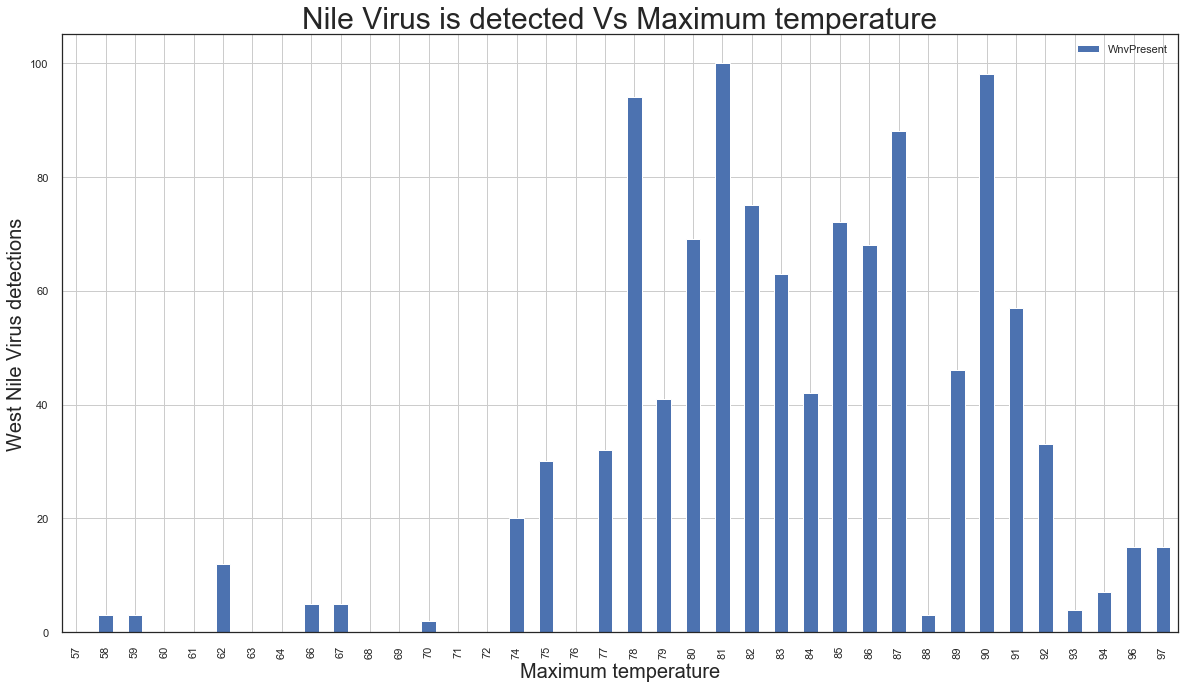

In [130]:
log()
single_barplot(df=df,
               x='Tmax',
               y='WnvPresent',
               title='Nile Virus is detected Vs Maximum temperature',
               xlab='Maximum temperature',
               ylab='West Nile Virus detections')

West Nile Virus is detected more frequently during days with a higher maximum temperature.

### Minimum Temperature vs WNV virus

[LOG 2019-11-08 11:13:14.281146]


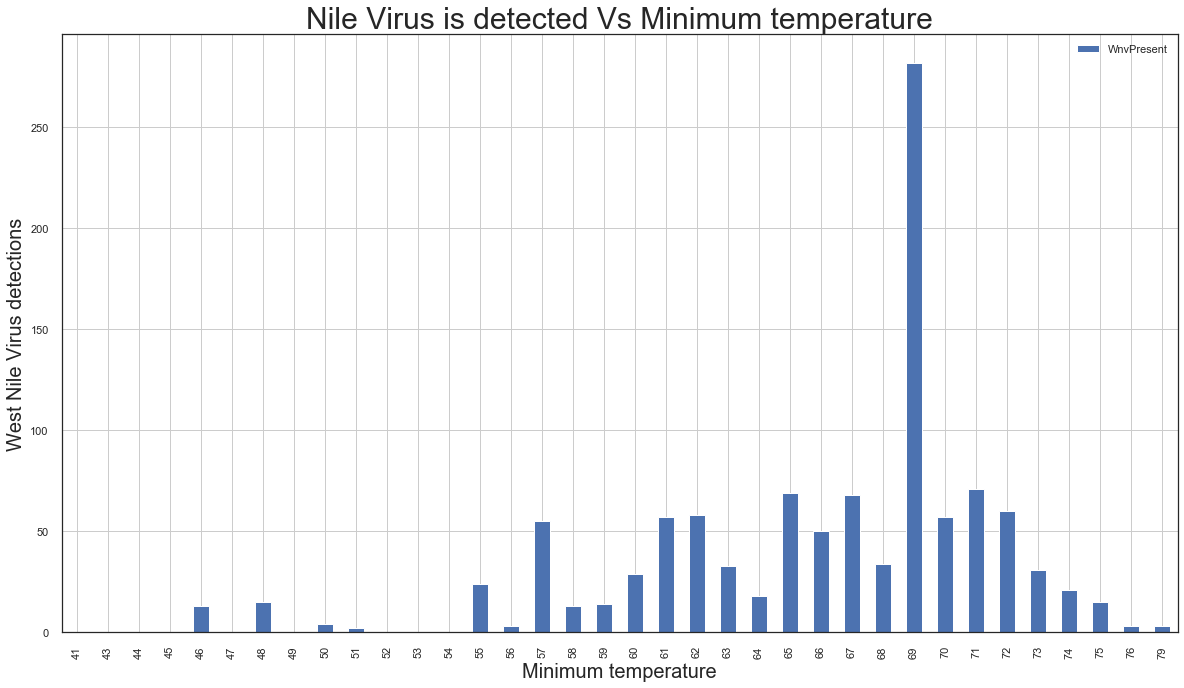

In [131]:
log()
single_barplot(df=df,
               x='Tmin',
               y='WnvPresent',
               title='Nile Virus is detected Vs Minimum temperature',
               xlab='Minimum temperature',
               ylab='West Nile Virus detections')

West Nile Virus is detected more frequently during days with a higher minimum temperature.

### Heating vs WNV virus

[LOG 2019-11-08 11:13:15.843343]


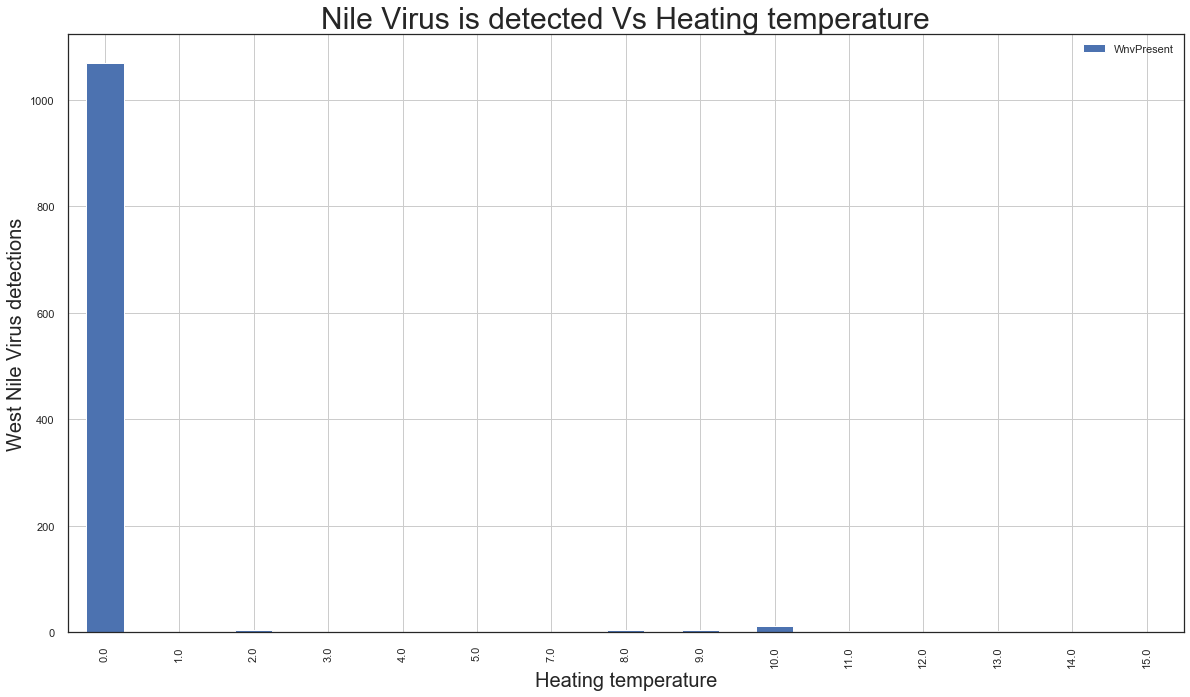

In [132]:
log()
single_barplot(df=df,
               x='Heat',
               y='WnvPresent',
               title='Nile Virus is detected Vs Heating temperature',
               xlab='Heating temperature',
               ylab='West Nile Virus detections')

West Nile Virus is detected more frequently during days with No Heating.

### Sea Level vs WNV Presence

[LOG 2019-11-08 11:13:16.958429]


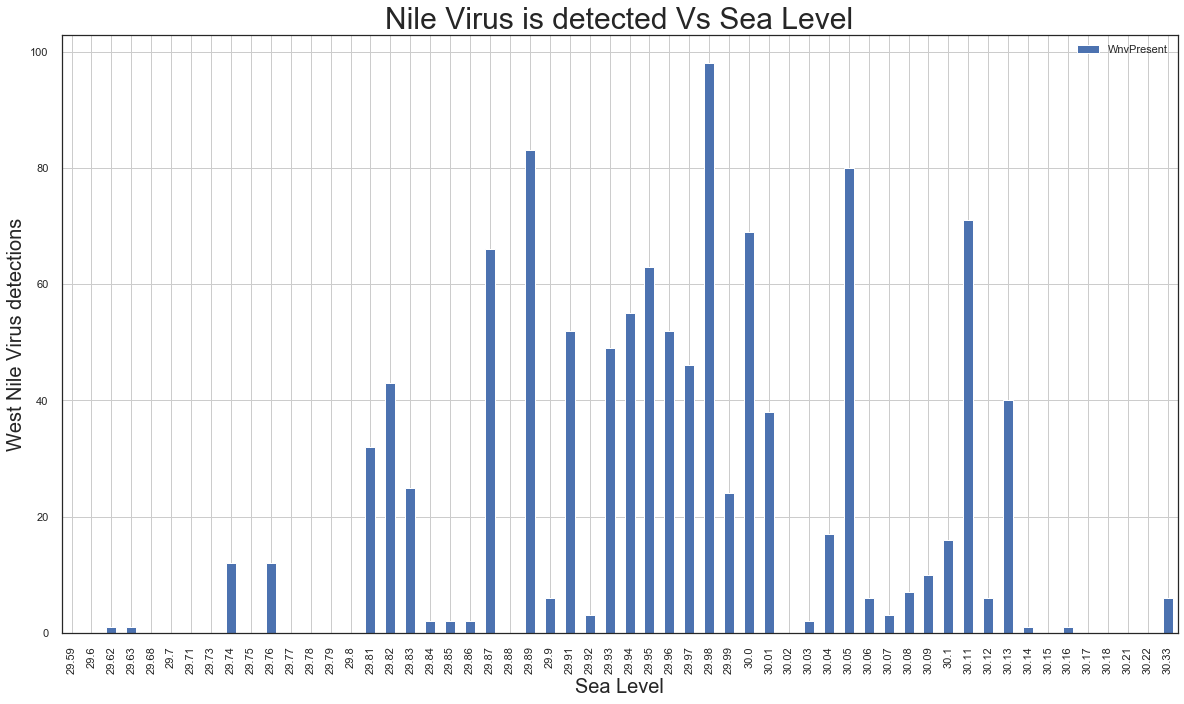

In [133]:
log()
single_barplot(df=df,
               x='SeaLevel',
               y='WnvPresent',
               title='Nile Virus is detected Vs Sea Level',
               xlab='Sea Level',
               ylab='West Nile Virus detections')

West Nile Virus is detected more frequently above sea level between 29.89 and 30.13.

### Average Wind Speed vs WNV presence

[LOG 2019-11-08 11:13:20.891445]


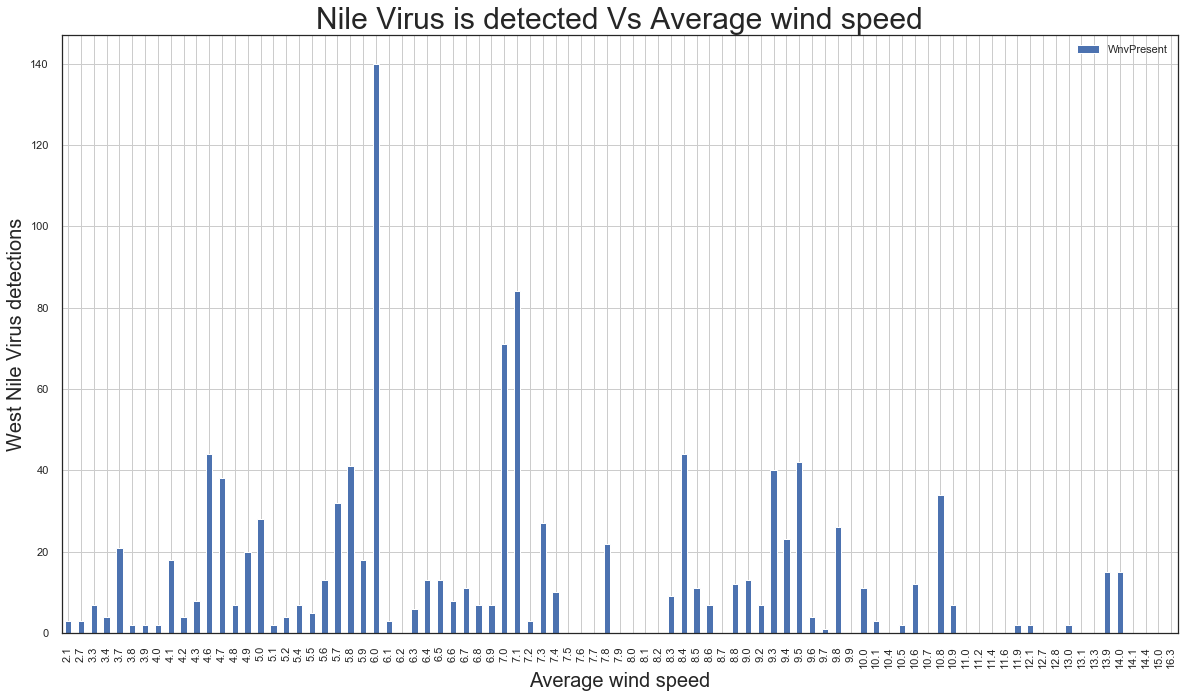

In [134]:
log()
single_barplot(df=df,
               x='AvgSpeed',
               y='WnvPresent',
               title='Nile Virus is detected Vs Average wind speed',
               xlab='Average wind speed',
               ylab='West Nile Virus detections')

No significant visual relationship found between average wind speed and WNV detection.

### Resulting Wind Direction vs WNV presence

[LOG 2019-11-08 11:13:25.795479]


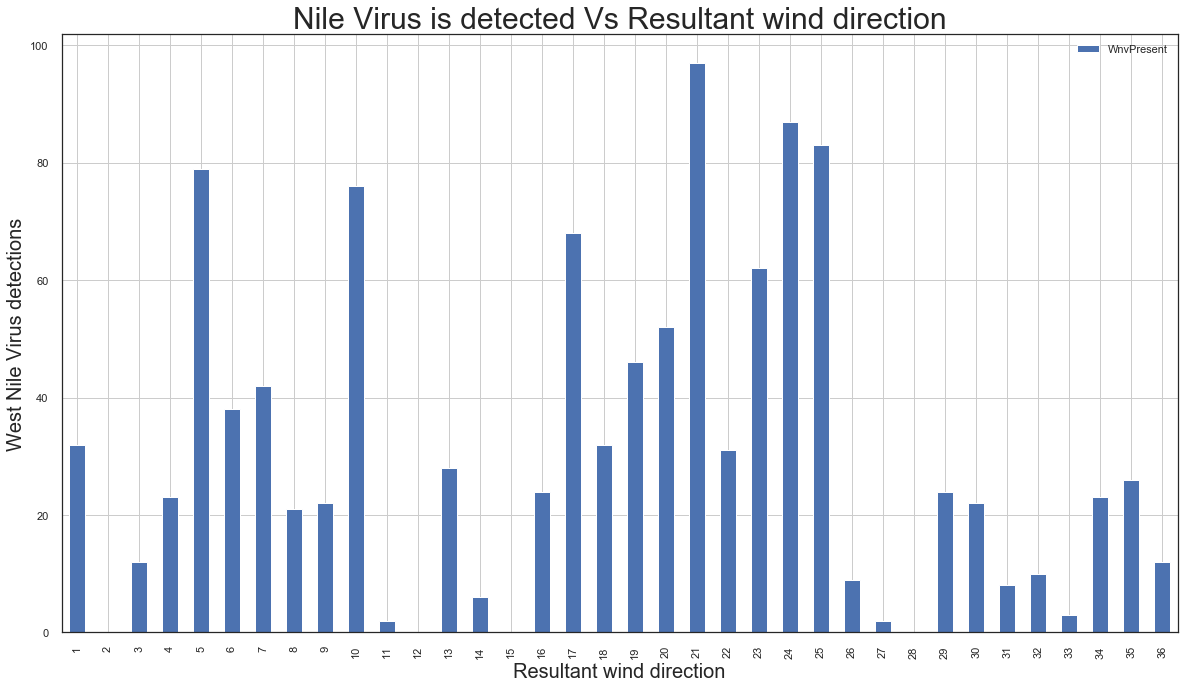

In [135]:
log()
single_barplot(df=df,
               x='ResultDir',
               y='WnvPresent',
               title='Nile Virus is detected Vs Resultant wind direction',
               xlab='Resultant wind direction',
               ylab='West Nile Virus detections')

No significant visual relationship found between wind direction and WNV detection.

### Resultant Wind Speed vs WNV presence

[LOG 2019-11-08 11:13:26.941193]


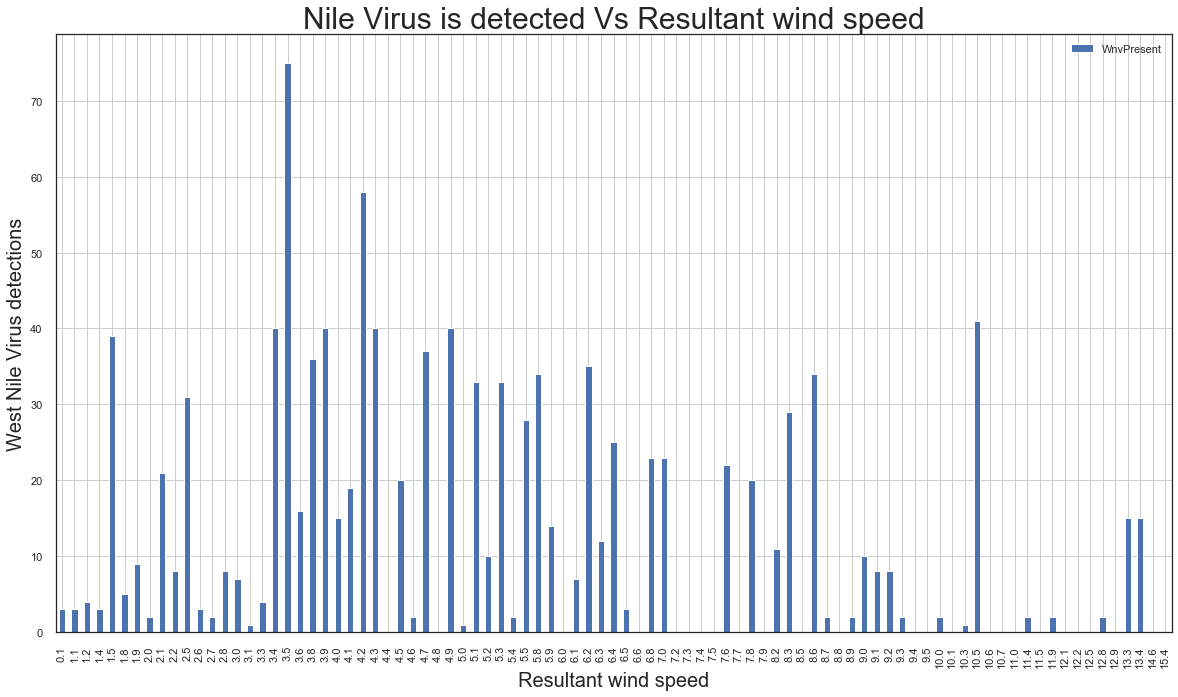

In [136]:
log()
single_barplot(df=df,
               x='ResultSpeed',
               y='WnvPresent',
               title='Nile Virus is detected Vs Resultant wind speed',
               xlab='Resultant wind speed',
               ylab='West Nile Virus detections')

No significant visual relationship found between resultant wind speed and WNV detection.

### Dew Point temperature vs WNV Presence

[LOG 2019-11-08 11:13:30.797398]


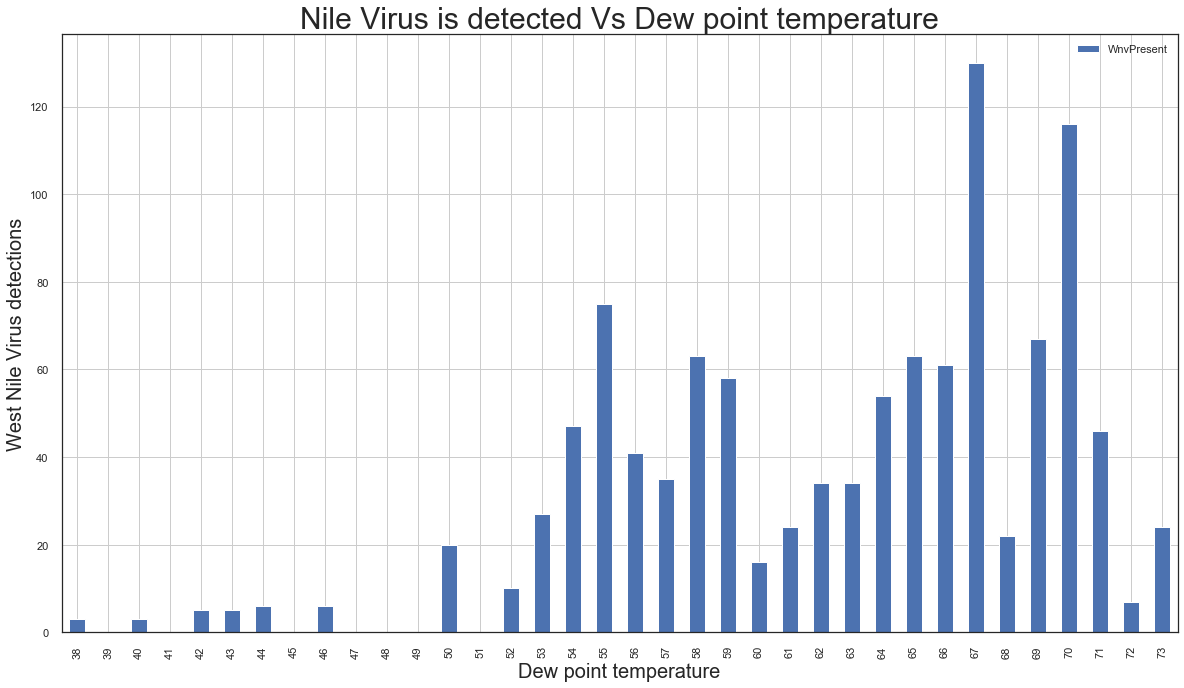

In [137]:
log()
single_barplot(df=df,
               x='DewPoint',
               y='WnvPresent',
               title='Nile Virus is detected Vs Dew point temperature',
               xlab='Dew point temperature',
               ylab='West Nile Virus detections')

West Nile Virus is detected more frequently during days with a higher dew point temperature.

# FEATURE ENGINEERING

## Month and Day Features

In [138]:
log()
df_train['month'] = df_train.Date.apply(create_month)
df_train['day'] = df_train.Date.apply(create_day)

df_test['month'] = df_test.Date.apply(create_month)
df_test['day'] = df_test.Date.apply(create_day)

[LOG 2019-11-08 11:13:32.001131]


Month and Day variables were created for both train and test dataframes.

## Latitude and Longitude Features

In [139]:
log()
# Add integer latitude/longitude columns
df_train['Lat_int'] = df_train.Latitude.apply(int)
df_train['Long_int'] = df_train.Longitude.apply(int)

df_test['Lat_int'] = df_test.Latitude.apply(int)
df_test['Long_int'] = df_test.Longitude.apply(int)

[LOG 2019-11-08 11:13:32.144747]


Longitude and latitude were changed to integers to remove the trailing decimal points

## Missing Observations

In [140]:
log()
# replace some missing values and T with -1
df_weather = df_weather.replace('M', -1).replace('-', -1).replace('T', -1).replace(' T', -1).replace('  T', -1)
df_weather = df_weather.replace(np.nan, -1).replace(np.nan, -1).replace(np.nan, -1).replace(np.nan, -1).replace(np.nan, -1)

[LOG 2019-11-08 11:13:32.259541]


We replaced all NaN values and Missing values and Trace values into -1 so we can deal with it easily afterwards

## Duplicate Features

In [141]:
log()
# drop address columns
df_train = df_train.drop(['Address', 'AddressNumberAndStreet','WnvPresent', 'NumMosquitos'], axis = 1)

df_test = df_test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis = 1)

[LOG 2019-11-08 11:13:32.655773]


We have dropped address related features as there is repetition with block and street features left behind in the dataframe. We also dropped WnvPresent and NumMosquitos as it has been saved into another wnvpresent label list. 

## CodeSum Feature

In [142]:
log()
# Not using codesum for this model
df_weather = df_weather.drop('CodeSum', axis=1)

[LOG 2019-11-08 11:13:33.147887]


CodeSum gives a qualitative description of the weather. We dropped the column as there are other columns (like PrecipiTotal) that describes rain. In addition, there is a lot of null data, which is normal as this column only describes weather phenomena.

## Station Features

In [143]:
log()
# Split station 1 and 2 and join horizontally
stn1 = df_weather[df_weather['Station']==1]
stn1 = stn1.drop('Station', axis=1)

stn2 = df_weather[df_weather['Station']==2]
stn2 = stn2.drop('Station', axis=1)

df_weather = stn1.merge(stn2, on='Date')

[LOG 2019-11-08 11:13:33.173191]


We have decided to merge the two station data into different columns on the same date for convenience.

## Merge Datasets

In [144]:
log()
# Merge with weather data
df_train = df_train.merge(df_weather, on='Date')
df_train = df_train.drop(['Date'], axis = 1)

df_test = df_test.merge(df_weather, on='Date')
df_test = df_test.drop(['Date'], axis = 1)

[LOG 2019-11-08 11:13:33.481523]


The weather data was merged with the training and the test data. 

## Categorical Features

In [145]:
log()
# Convert categorical data to numbers
lbl = preprocessing.LabelEncoder()
lbl.fit(list(df_train['Species'].values) + list(df_test['Species'].values))
df_train['Species'] = lbl.transform(df_train['Species'].values)
df_test['Species'] = lbl.transform(df_test['Species'].values)

lbl.fit(list(df_train['Street'].values) + list(df_test['Street'].values))
df_train['Street'] = lbl.transform(df_train['Street'].values)
df_test['Street'] = lbl.transform(df_test['Street'].values)

lbl.fit(list(df_train['Trap'].values) + list(df_test['Trap'].values))
df_train['Trap'] = lbl.transform(df_train['Trap'].values)
df_test['Trap'] = lbl.transform(df_test['Trap'].values)

[LOG 2019-11-08 11:13:33.919844]


The training and testing set were relabelled using Label Encoder for all categorical values

## Dropped Features

In [146]:
log()
# drop columns with -1s
df_train = df_train.loc[:,(df_train != -1).any(axis=0)]
df_test = df_test.loc[:,(df_test != -1).any(axis=0)]

[LOG 2019-11-08 11:13:34.293948]


The missing values were removed all in one go. 

In [147]:
log()
df_train = df_train.drop(labels = 'state', axis = 1)

[LOG 2019-11-08 11:13:34.565052]


All entries have the same state, so it is dropped.  

# DATA MODELLING

## Training Preparation

In [148]:
log()
# train test split
X_train, X_val, y_train, y_val = train_test_split(df_train, labels, random_state=42, stratify=labels)

[LOG 2019-11-08 11:13:34.615054]


The training data set was split into training X, y datasets, and validation X, y datasets ('test') datasets

## $M_0$ - Grid Search

A Grid Search was made to find out which models gave a higher train score, test score and ROC AUC score.

The models tested were:
- Logistic Regression, 
- Random Forest Classifier, 
- Gradient Boosting Classifier, 
- Ada Boost Classifier and 
- K Neighbours Classfier.

In [149]:
# grid search on best classifier
models = ['lgr','rfc','gbc','abc','knn']

idx = 0
model_solns = {}
for m in models:
    log()
    idx += 1
    items = [m]
    [train_score, test_score, roc_auc] = pipeline(items, X_train, X_val, y_train, y_val)
    
    model_solns[idx] = {'model': m, 
                        'train_score': train_score, 'test_score': test_score, 'roc_auc_score': roc_auc, 
                        }

# find the best classifier
df_solns = pd.DataFrame(model_solns).sort_values(ascending=False, by='roc_auc_score',axis=1)
display(df_solns)

[LOG 2019-11-08 11:13:34.669871]


<b>LogisticRegression</b>

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.6s finished


Train score: 0.8124052605873016 Test score: 0.7840527305652116
ROC AUC score: 0.7840527305652116

[LOG 2019-11-08 11:14:24.883603]


<b>RandomForestClassifier</b>

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Train score: 0.99100344483369 Test score: 0.7271705649786597
ROC AUC score: 0.7271705649786597

[LOG 2019-11-08 11:14:38.731364]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.6s finished


<b>GradientBoostingClassifier</b>

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.2s finished


Train score: 0.9066870701660279 Test score: 0.8299110288166484
ROC AUC score: 0.8299110288166484

[LOG 2019-11-08 11:14:53.727911]


<b>AdaBoostClassifier</b>

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s finished


Train score: 0.8697381316690547 Test score: 0.8292617953779238
ROC AUC score: 0.8292617953779238

[LOG 2019-11-08 11:15:02.015388]


<b>KNeighborsClassifier</b>

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s finished


Train score: 0.9312982372388403 Test score: 0.6622064620562359
ROC AUC score: 0.6622064620562359



3         4         1         2         5
model               gbc       abc       lgr       rfc       knn
train_score    0.906687  0.869738  0.812405  0.991003  0.931298
test_score     0.829911  0.829262  0.784053  0.727171  0.662206
roc_auc_score  0.829911  0.829262  0.784053  0.727171  0.662206

The best model was found to be the Gradient Boosting Classifier that has the highest test_score/roc_auc_score 0.8299.

## $M_1$ - Gradient Boosting Classifier

We ran the model using different parameters and found that keeping verbose= 1 and cv = 3 was the best. 

In [150]:
log()
# perform gradient boosting classifier
pipe = Pipeline([
    ('gbc', GradientBoostingClassifier()),
])
params_grid_cv = {
}

gs = GridSearchCV(pipe, param_grid=params_grid_cv, scoring='roc_auc', verbose=1, cv=3)
gs.fit(df_train, labels)

[LOG 2019-11-08 11:15:05.635349]
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('gbc',
                                        GradientBoostingClassifier(criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
                                                                   min_samp

# EXPORT DATA

In [151]:
# log()
# # create predictions and submission file
# predictions = gs.predict_proba(df_test)[:,1]
# df_sample['WnvPresent'] = predictions

# now = str(datetime.now()).replace(':', '_').replace('.', '_').replace('-', '_').replace(' ', '_')

# df_sample.to_csv(f'../data/model_preds_{now}.csv', index = False)
# print(f'Exported to ../data/model_preds_{now}.csv')

Team's best Kaggle Score:
* Public Score: 0.74372
* Private Score: 0.72294

# ANALYSIS OF RESULTS

## Merging of predicted data back into other known data

In [152]:
log()
# importing in the predictions
df_sample = pd.read_csv('../data/model_preds_2019_11_07_17_18_06_258582.csv')
df_sample

[LOG 2019-11-08 11:15:09.872785]


Id  WnvPresent
0            1    0.006800
1            2    0.003824
2            3    0.006419
3            4    0.002582
4            5    0.002582
...        ...         ...
116288  116289    0.002543
116289  116290    0.002543
116290  116291    0.002543
116291  116292    0.002543
116292  116293    0.003408

[116293 rows x 2 columns]

In [153]:
log()
#bringing back in the test data
df_conclude = pd.read_csv('../data/test.csv')

[LOG 2019-11-08 11:15:10.044113]


In [154]:
log()
#merging the test data and predictions
df_conclude = df_conclude.merge(df_sample)

[LOG 2019-11-08 11:15:10.725176]


In [155]:
log()
# locating test data with high probability of having WNV presence
df_conclude = df_conclude.loc[df_conclude['WnvPresent'] >= 0.5]

[LOG 2019-11-08 11:15:10.793336]


In [156]:
log()
# saving out 
df_conclude.to_csv('../data/conclude.csv')

[LOG 2019-11-08 11:15:10.820262]


## Predictions

We look at the the points where the presence of where the presence of WNV is high.

[LOG 2019-11-08 11:15:10.958939]


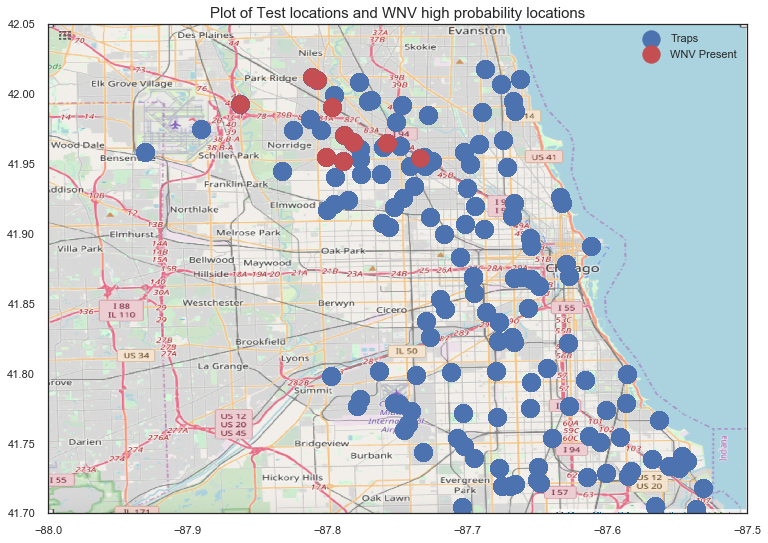

In [157]:
log()
# plot a map to show where the probability of WNV presence is above 0.5
concl=pd.read_csv('../data/conclude.csv')
mapdata = plt.imread('../images/map1.png')
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(df_test.Longitude, df_test.Latitude, zorder=1, c='B', s=300, label = 'Traps')
ax.scatter(concl.Longitude, concl.Latitude, zorder=1, c='R', s=300,  label = 'WNV Present')
ax.set_title('Plot of Test locations and WNV high probability locations', size = 15)
BBox=(-88,-87.5,41.7,42.05)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapdata, zorder=0, extent = BBox, aspect= 'equal');
ax.legend()

Set a threshold of 0.5 to filter only locations has highest probability of WNV spreading. Out of predicted location only 50 locations had highest probability of WNV spreading more than 0.5.

In [158]:
log()
spray_target=list(concl.Date.unique())
spray_target

[LOG 2019-11-08 11:15:15.174493]


['2008-09-09', '2010-08-13', '2012-08-10', '2012-09-13', '2014-08-21']

[LOG 2019-11-08 11:15:15.193436]


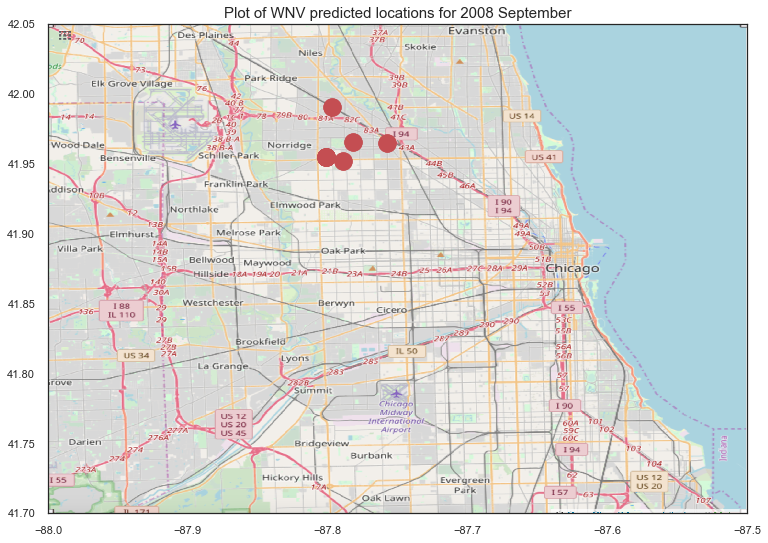

In [159]:
log()
# Plot of WNV predicted locations for 2008 September
temp_df=concl[concl['Date'].str.contains(spray_target[0])]
mapdata = plt.imread('../images/map1.png')
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(temp_df.Longitude, temp_df.Latitude, zorder=1, c='r', s=300)
ax.set_title('Plot of WNV predicted locations for 2008 September', size = 15)
BBox=(-88,-87.5,41.7,42.05)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapdata, zorder=0, extent = BBox, aspect= 'equal');

[LOG 2019-11-08 11:15:16.525081]


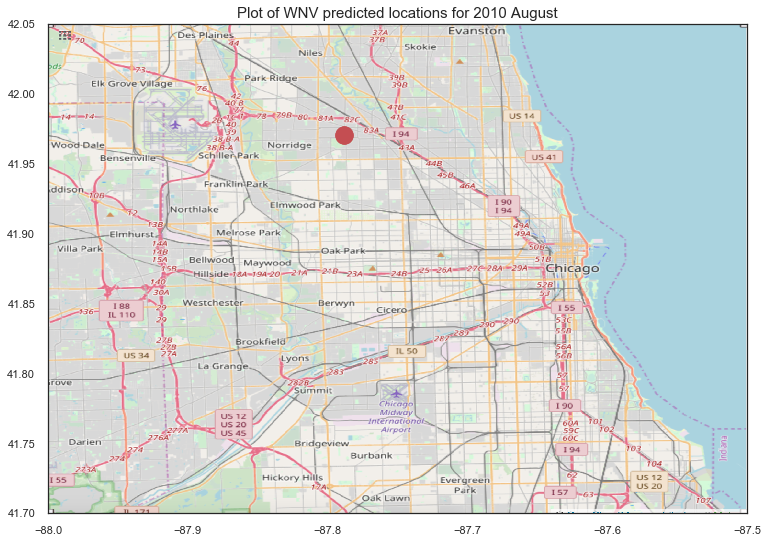

In [160]:
log()
#Plot of WNV predicted locations for 2010 August
temp_df=concl[concl['Date'].str.contains(spray_target[1])]
mapdata = plt.imread('../images/map1.png')
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(temp_df.Longitude, temp_df.Latitude, zorder=1, c='r', s=300)
ax.set_title('Plot of WNV predicted locations for 2010 August', size = 15)
BBox=(-88,-87.5,41.7,42.05)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapdata, zorder=0, extent = BBox, aspect= 'equal');

[LOG 2019-11-08 11:15:17.829175]


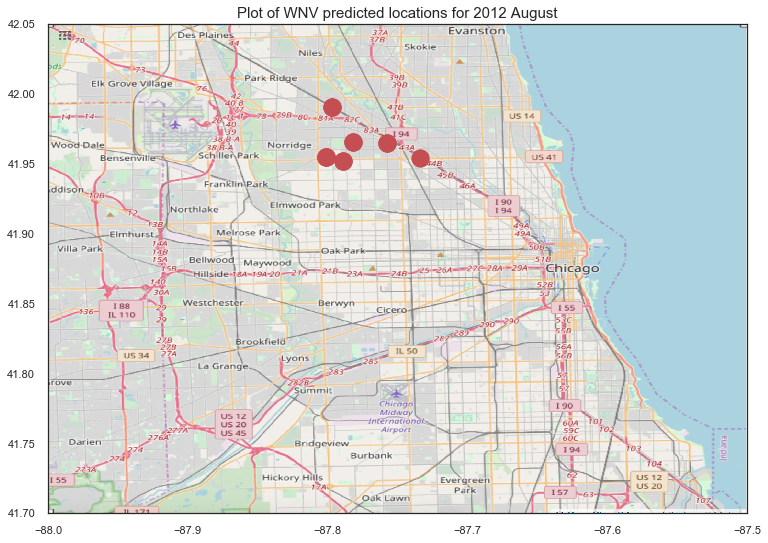

In [161]:
log()
# Plot of WNV predicted locations for 2012 August
temp_df=concl[concl['Date'].str.contains(spray_target[2])]
mapdata = plt.imread('../images/map1.png')
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(temp_df.Longitude, temp_df.Latitude, zorder=1, c='r', s=300)
ax.set_title('Plot of WNV predicted locations for 2012 August', size = 15)
BBox=(-88,-87.5,41.7,42.05)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapdata, zorder=0, extent = BBox, aspect= 'equal');

[LOG 2019-11-08 11:15:19.134138]


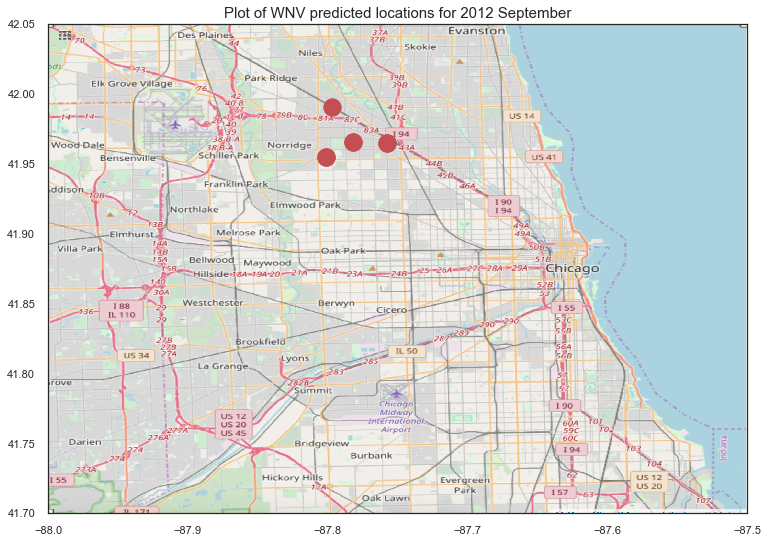

In [162]:
log()
temp_df=concl[concl['Date'].str.contains(spray_target[3])]
mapdata = plt.imread('../images/map1.png')
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(temp_df.Longitude, temp_df.Latitude, zorder=1, c='r', s=300)
ax.set_title('Plot of WNV predicted locations for 2012 September', size = 15)
BBox=(-88,-87.5,41.7,42.05)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapdata, zorder=0, extent = BBox, aspect= 'equal');

[LOG 2019-11-08 11:15:20.588243]


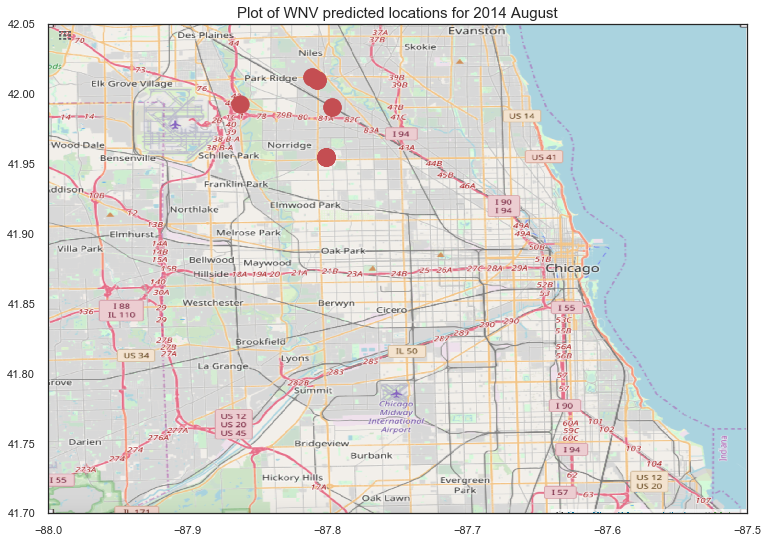

In [163]:
log()
# Plot of WNV predicted locations for 2014 August
temp_df=concl[concl['Date'].str.contains(spray_target[4])]
mapdata = plt.imread('../images/map1.png')
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(temp_df.Longitude, temp_df.Latitude, zorder=1, c='r', s=300)
ax.set_title('Plot of WNV predicted locations for 2014 August', size = 15)
BBox=(-88,-87.5,41.7,42.05)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapdata, zorder=0, extent = BBox, aspect= 'equal');

As shown, all the plots show that there is a high congregation of traps in near the O'Hare Airport area that have high probability of having the WNV vector.

## Finding out when to run spray the region

**Merging of Weather Data to spray targets**

Station 1 data was chosen because it is the closest to all trap areas.

In [164]:
#converting the Date into Datetime variable
stn1['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in stn1['Date']]

In [165]:
# onlY temperature and precipitation and sealevel data was chosen as 
# there was a relationship visually found earlier on
edited_stn1 = stn1[['Date', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat',
                     'Cool', 'PrecipTotal', 'SeaLevel']]
edited_stn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 2942
Data columns (total 10 columns):
Date           1472 non-null datetime64[ns]
Tmax           1472 non-null int64
Tmin           1472 non-null int64
Tavg           1472 non-null float64
DewPoint       1472 non-null int64
WetBulb        1472 non-null float64
Heat           1472 non-null float64
Cool           1472 non-null float64
PrecipTotal    1472 non-null object
SeaLevel       1472 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 126.5+ KB


In [166]:
#Set date as index
edited_stn1.set_index('Date', inplace = True)

In [167]:
# looking at all the precipitation values
edited_stn1.PrecipTotal.unique()

array(['0.00', -1, '0.13', '0.38', '0.14', '0.07', '0.02', '1.01', '0.04',
       '0.01', '0.19', '0.39', '0.42', '0.28', '0.58', '0.05', '0.16',
       '0.15', '0.40', '0.30', '0.43', '0.11', '1.55', '0.17', '0.03',
       '1.43', '0.26', '1.31', '0.06', '0.29', '0.41', '0.23', '0.09',
       '1.33', '0.91', '0.37', '2.35', '0.24', '0.34', '0.18', '0.36',
       '0.27', '0.33', '1.28', '0.76', '0.95', '0.08', '0.12', '0.48',
       '0.52', '0.64', '1.24', '0.20', '0.72', '0.73', '1.61', '0.74',
       '1.05', '2.43', '2.90', '1.23', '6.64', '1.44', '0.82', '0.80',
       '0.32', '0.67', '0.55', '1.73', '0.44', '0.45', '3.97', '0.25',
       '0.68', '0.63', '0.35', '0.93', '0.22', '0.75', '0.89', '0.21',
       '0.46', '1.03', '0.60', '0.81', '0.97', '1.49', '1.02', '0.59',
       '0.87', '0.85', '0.54', '0.79', '2.79', '3.64', '0.10', '0.31',
       '2.24', '1.06', '1.88', '6.86', '0.71', '0.70', '1.11', '0.65',
       '1.21', '0.77', '1.34', '0.47', '1.12', '0.57', '0.51', '1.09',
  

In [168]:
# replacing missing values with 0 
edited_stn1['PrecipTotal'] = edited_stn1['PrecipTotal'].replace((-1),0) #assuming no data means no rain

In [169]:
edited_stn1.PrecipTotal.unique()

array(['0.00', 0, '0.13', '0.38', '0.14', '0.07', '0.02', '1.01', '0.04',
       '0.01', '0.19', '0.39', '0.42', '0.28', '0.58', '0.05', '0.16',
       '0.15', '0.40', '0.30', '0.43', '0.11', '1.55', '0.17', '0.03',
       '1.43', '0.26', '1.31', '0.06', '0.29', '0.41', '0.23', '0.09',
       '1.33', '0.91', '0.37', '2.35', '0.24', '0.34', '0.18', '0.36',
       '0.27', '0.33', '1.28', '0.76', '0.95', '0.08', '0.12', '0.48',
       '0.52', '0.64', '1.24', '0.20', '0.72', '0.73', '1.61', '0.74',
       '1.05', '2.43', '2.90', '1.23', '6.64', '1.44', '0.82', '0.80',
       '0.32', '0.67', '0.55', '1.73', '0.44', '0.45', '3.97', '0.25',
       '0.68', '0.63', '0.35', '0.93', '0.22', '0.75', '0.89', '0.21',
       '0.46', '1.03', '0.60', '0.81', '0.97', '1.49', '1.02', '0.59',
       '0.87', '0.85', '0.54', '0.79', '2.79', '3.64', '0.10', '0.31',
       '2.24', '1.06', '1.88', '6.86', '0.71', '0.70', '1.11', '0.65',
       '1.21', '0.77', '1.34', '0.47', '1.12', '0.57', '0.51', '1.09',
   

In [170]:
#changing the type of data in PrecipTotal
edited_stn1["PrecipTotal"] = [float(x) for x in edited_stn1["PrecipTotal"]]

In [171]:
#making rain status
edited_stn1["rainstat"] = [1 if x >= 0.1 else 0 for x in edited_stn1["PrecipTotal"]]

In [172]:
#changing the date in concl dataframe into Datetime variable
df_conclude['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in df_conclude['Date']]
df_conclude['Date'].dtype

dtype('<M8[ns]')

In [173]:
sum2 = edited_stn1.rolling(2).sum()
sum3 = edited_stn1.rolling(3).sum()
sum4 = edited_stn1.rolling(4).sum()
sum5 = edited_stn1.rolling(5).sum()
sum6 = edited_stn1.rolling(6).sum()
sum7 = edited_stn1.rolling(7).sum()
sum8 = edited_stn1.rolling(8).sum()
sum9 = edited_stn1.rolling(9).sum()
sum10 = edited_stn1.rolling(10).sum()
sum11 = edited_stn1.rolling(11).sum()
sum12 = edited_stn1.rolling(12).sum()
sum13 = edited_stn1.rolling(13).sum()
sum14 = edited_stn1.rolling(14).sum()
sum15 = edited_stn1.rolling(15).sum()
sum16 = edited_stn1.rolling(16).sum()
sum17 = edited_stn1.rolling(17).sum()
sum18 = edited_stn1.rolling(18).sum()
sum19 = edited_stn1.rolling(19).sum()
sum20 = edited_stn1.rolling(20).sum()
sum21 = edited_stn1.rolling(21).sum()
sum22 = edited_stn1.rolling(22).sum()
sum23 = edited_stn1.rolling(23).sum()
sum24 = edited_stn1.rolling(24).sum()
sum25 = edited_stn1.rolling(25).sum()
sum26 = edited_stn1.rolling(26).sum()
sum27 = edited_stn1.rolling(27).sum()
sum28 = edited_stn1.rolling(28).sum()
sum29 = edited_stn1.rolling(29).sum()
sum30 = edited_stn1.rolling(30).sum()

In [174]:
#creating a list of dataframes created using rolling sum
sumweatherlist = []
count = 2
while count <31:
    sumweatherlist.append(('sum'+str(count)))
    count +=1
print(sumweatherlist)

['sum2', 'sum3', 'sum4', 'sum5', 'sum6', 'sum7', 'sum8', 'sum9', 'sum10', 'sum11', 'sum12', 'sum13', 'sum14', 'sum15', 'sum16', 'sum17', 'sum18', 'sum19', 'sum20', 'sum21', 'sum22', 'sum23', 'sum24', 'sum25', 'sum26', 'sum27', 'sum28', 'sum29', 'sum30']


In [175]:
# converting the rainsum data into a dictionary
rainstat2_dict = {x:sum2.loc[x]['rainstat'] for x in sum2.index}
rainstat3_dict = {x:sum3.loc[x]['rainstat'] for x in sum3.index}
rainstat4_dict = {x:sum4.loc[x]['rainstat'] for x in sum4.index}
rainstat5_dict = {x:sum5.loc[x]['rainstat'] for x in sum5.index}
rainstat6_dict = {x:sum6.loc[x]['rainstat'] for x in sum6.index}
rainstat7_dict = {x:sum7.loc[x]['rainstat'] for x in sum7.index}
rainstat8_dict = {x:sum8.loc[x]['rainstat'] for x in sum8.index}
rainstat9_dict = {x:sum9.loc[x]['rainstat'] for x in sum9.index}
rainstat10_dict = {x:sum10.loc[x]['rainstat'] for x in sum10.index}
rainstat11_dict = {x:sum11.loc[x]['rainstat'] for x in sum11.index}
rainstat12_dict = {x:sum12.loc[x]['rainstat'] for x in sum12.index}
rainstat13_dict = {x:sum13.loc[x]['rainstat'] for x in sum13.index}
rainstat14_dict = {x:sum14.loc[x]['rainstat'] for x in sum14.index}
rainstat15_dict = {x:sum15.loc[x]['rainstat'] for x in sum15.index}
rainstat16_dict = {x:sum16.loc[x]['rainstat'] for x in sum16.index}
rainstat17_dict = {x:sum17.loc[x]['rainstat'] for x in sum17.index}
rainstat18_dict = {x:sum18.loc[x]['rainstat'] for x in sum18.index}
rainstat19_dict = {x:sum19.loc[x]['rainstat'] for x in sum19.index}
rainstat20_dict = {x:sum20.loc[x]['rainstat'] for x in sum20.index}
rainstat21_dict = {x:sum21.loc[x]['rainstat'] for x in sum21.index}
rainstat22_dict = {x:sum22.loc[x]['rainstat'] for x in sum22.index}
rainstat23_dict = {x:sum23.loc[x]['rainstat'] for x in sum23.index}
rainstat24_dict = {x:sum24.loc[x]['rainstat'] for x in sum24.index}
rainstat25_dict = {x:sum25.loc[x]['rainstat'] for x in sum25.index}
rainstat26_dict = {x:sum26.loc[x]['rainstat'] for x in sum26.index}
rainstat27_dict = {x:sum27.loc[x]['rainstat'] for x in sum27.index}
rainstat28_dict = {x:sum28.loc[x]['rainstat'] for x in sum28.index}
rainstat29_dict = {x:sum29.loc[x]['rainstat'] for x in sum29.index}
rainstat30_dict = {x:sum30.loc[x]['rainstat'] for x in sum30.index}

In [176]:
#Encoding the rainstat data into the df_conclude dataframe
df_conclude['rainstat2'] = [rainstat2_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat3'] = [rainstat3_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat4'] = [rainstat4_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat5'] = [rainstat5_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat6'] = [rainstat6_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat7'] = [rainstat7_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat8'] = [rainstat8_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat9'] = [rainstat9_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat10'] = [rainstat10_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat11'] = [rainstat11_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat12'] = [rainstat12_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat13'] = [rainstat13_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat14'] = [rainstat14_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat15'] = [rainstat15_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat16'] = [rainstat16_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat17'] = [rainstat17_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat18'] = [rainstat18_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat19'] = [rainstat19_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat20'] = [rainstat20_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat21'] = [rainstat21_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat22'] = [rainstat22_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat23'] = [rainstat23_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat24'] = [rainstat24_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat25'] = [rainstat25_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat26'] = [rainstat26_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat27'] = [rainstat27_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat28'] = [rainstat28_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat29'] = [rainstat29_dict[x] for x in df_conclude['Date']]
df_conclude['rainstat30'] = [rainstat30_dict[x] for x in df_conclude['Date']]

In [177]:
# creating a list of newly encoded precipitation data
rainstatlist = []
count = 2
while count <31:
    rainstatlist.append(('rainstat'+str(count)))
    count +=1
print(rainstatlist)

['rainstat2', 'rainstat3', 'rainstat4', 'rainstat5', 'rainstat6', 'rainstat7', 'rainstat8', 'rainstat9', 'rainstat10', 'rainstat11', 'rainstat12', 'rainstat13', 'rainstat14', 'rainstat15', 'rainstat16', 'rainstat17', 'rainstat18', 'rainstat19', 'rainstat20', 'rainstat21', 'rainstat22', 'rainstat23', 'rainstat24', 'rainstat25', 'rainstat26', 'rainstat27', 'rainstat28', 'rainstat29', 'rainstat30']


In [178]:
# function created to do correlation between the WNV probability and rainstat mean
pearson(rainstatlist, df_conclude)

rainstat2 r: nan p: nan
rainstat3 r: nan p: nan
rainstat4 r: nan p: nan
rainstat5 r: -0.12024038074549914 p: 0.3818878856930663
rainstat6 r: 0.3914891821157967 p: 0.0031202806804419368
rainstat7 r: 0.5401098762095129 p: 2.0809320457001064e-05
rainstat8 r: 0.5401098762095129 p: 2.0809320457001064e-05
rainstat9 r: 0.31133199376401766 p: 0.02068445073202391
rainstat10 r: 0.13284303723303142 p: 0.3336162111079389
rainstat11 r: -0.13085189543516368 p: 0.34097695528133254
rainstat12 r: -0.13085189543516368 p: 0.34097695528133254
rainstat13 r: -0.13085189543516368 p: 0.34097695528133254
rainstat14 r: -0.14387992918696482 p: 0.294639390086074
rainstat15 r: -0.14387992918696482 p: 0.294639390086074
rainstat16 r: -0.07923624415535035 p: 0.5652643654311036
rainstat17 r: -0.07923624415535035 p: 0.5652643654311036
rainstat18 r: -0.23157649768551075 p: 0.08890903693441626
rainstat19 r: -0.24657514378856932 p: 0.06955745856230872
rainstat20 r: -0.24657514378856932 p: 0.06955745856230872
rainstat21 r:

In [179]:
#making a column of WNV probability >0.5
df_conclude['wmv0.5'] = [1 if x >= 0.5 else 0 for x in df_conclude['WnvPresent']]

In [180]:
rainsum_result = {}
def ttesttaker(df, lst, resultdict):
    """
    does t-test for you for WNV status
    Parameters
    -----------
    df: Dataframe of concern
    lst: list of columns in dataframe
    resultdict: dictionary to place data in
    
    Returns
    -------
    resultdict: containing the mean of each group and t-statistic and p value
    """
    for a in lst:
        a_dict = {}
        group1 = df[df['wmv0.5'] == 0][a]
        group2 = df[df['wmv0.5'] == 1][a]
        t, p = stats.ttest_ind(group1, group2)
        a_dict = {'0': (group1.mean()), '1': (group2.mean()), 't': t, 'p': (round((p*1000),1))/1000}
        resultdict[a] = a_dict

In [181]:
ttesttaker(df_conclude, rainstatlist, rainsum_result)

In [182]:
#dictionary of results
rainsum_result

{'rainstat2': {'0': nan, '1': 1.0, 't': nan, 'p': nan},
 'rainstat3': {'0': nan, '1': 1.0, 't': nan, 'p': nan},
 'rainstat4': {'0': nan, '1': 1.0, 't': nan, 'p': nan},
 'rainstat5': {'0': nan, '1': 1.0363636363636364, 't': nan, 'p': nan},
 'rainstat6': {'0': nan, '1': 1.5272727272727273, 't': nan, 'p': nan},
 'rainstat7': {'0': nan, '1': 1.7454545454545454, 't': nan, 'p': nan},
 'rainstat8': {'0': nan, '1': 1.7454545454545454, 't': nan, 'p': nan},
 'rainstat9': {'0': nan, '1': 1.8727272727272728, 't': nan, 'p': nan},
 'rainstat10': {'0': nan, '1': 2.036363636363636, 't': nan, 'p': nan},
 'rainstat11': {'0': nan, '1': 2.5454545454545454, 't': nan, 'p': nan},
 'rainstat12': {'0': nan, '1': 2.5454545454545454, 't': nan, 'p': nan},
 'rainstat13': {'0': nan, '1': 2.5454545454545454, 't': nan, 'p': nan},
 'rainstat14': {'0': nan, '1': 2.581818181818182, 't': nan, 'p': nan},
 'rainstat15': {'0': nan, '1': 2.581818181818182, 't': nan, 'p': nan},
 'rainstat16': {'0': nan, '1': 2.8, 't': nan, 'p

In [183]:
#results in dictionary
rainstat_df = pd.DataFrame(rainsum_result).T
rainstat_df

0         1   t   p
rainstat2  NaN  1.000000 NaN NaN
rainstat3  NaN  1.000000 NaN NaN
rainstat4  NaN  1.000000 NaN NaN
rainstat5  NaN  1.036364 NaN NaN
rainstat6  NaN  1.527273 NaN NaN
rainstat7  NaN  1.745455 NaN NaN
rainstat8  NaN  1.745455 NaN NaN
rainstat9  NaN  1.872727 NaN NaN
rainstat10 NaN  2.036364 NaN NaN
rainstat11 NaN  2.545455 NaN NaN
rainstat12 NaN  2.545455 NaN NaN
rainstat13 NaN  2.545455 NaN NaN
rainstat14 NaN  2.581818 NaN NaN
rainstat15 NaN  2.581818 NaN NaN
rainstat16 NaN  2.800000 NaN NaN
rainstat17 NaN  2.800000 NaN NaN
rainstat18 NaN  3.272727 NaN NaN
rainstat19 NaN  3.400000 NaN NaN
rainstat20 NaN  3.400000 NaN NaN
rainstat21 NaN  3.690909 NaN NaN
rainstat22 NaN  3.727273 NaN NaN
rainstat23 NaN  3.945455 NaN NaN
rainstat24 NaN  4.163636 NaN NaN
rainstat25 NaN  4.163636 NaN NaN
rainstat26 NaN  4.163636 NaN NaN
rainstat27 NaN  4.163636 NaN NaN
rainstat28 NaN  4.163636 NaN NaN
rainstat29 NaN  4.509091 NaN NaN
rainstat30 NaN  4.509091 NaN NaN

A higher probability of WNV presence (> 0.5) is linked to less days of rain from starting from 14 days.

Any rolling sum less than 7 days were ignored as the mosquitos requires at least 7 days to reach adulthood.

# CONCLUSION

[LOG 2019-11-08 11:15:31.649153]


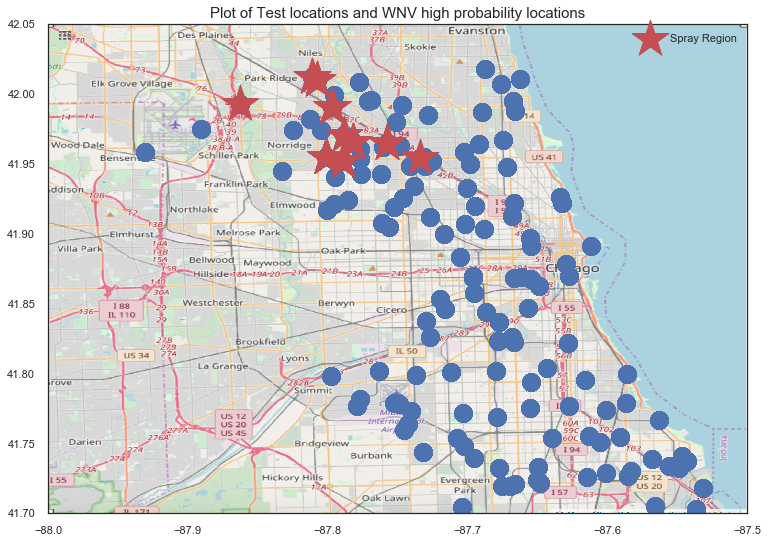

In [184]:
log()
# plot a map to show where the traps should be sprayed probability of WNV presence is above 0.5
concl=pd.read_csv('../data/conclude.csv')
mapdata = plt.imread('../images/map1.png')
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(df_test.Longitude, df_test.Latitude, zorder=1, c='B', s=300)
ax.scatter(concl.Longitude, concl.Latitude, marker='*', zorder=1, c='R', s=1500,  label = 'Spray Region')
ax.set_title('Plot of Test locations and WNV high probability locations', size = 15)
BBox=(-88,-87.5,41.7,42.05)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapdata, zorder=0, extent = BBox, aspect= 'equal');
ax.legend()

In addition, there was a correlation with higher precipitation for a span of at least 6 days with higher WNV presence probability. 

Thus, it is recommended that spraying should be done in the region in red above after 6 days of high precipitation.

In [185]:
log()
concl[concl['WnvPresent']>=0.5]

[LOG 2019-11-08 11:15:37.129544]


Unnamed: 0      Id        Date  \
0        25606   25607  2008-09-09   
1        25607   25608  2008-09-09   
2        25608   25609  2008-09-09   
3        25609   25610  2008-09-09   
4        25610   25611  2008-09-09   
5        25611   25612  2008-09-09   
6        25612   25613  2008-09-09   
7        25613   25614  2008-09-09   
8        25614   25615  2008-09-09   
9        25615   25616  2008-09-09   
10       25617   25618  2008-09-09   
11       25622   25623  2008-09-09   
12       25995   25996  2008-09-09   
13       25997   25998  2008-09-09   
14       26003   26004  2008-09-09   
15       26005   26006  2008-09-09   
16       26766   26767  2008-09-09   
17       26768   26769  2008-09-09   
18       26774   26775  2008-09-09   
19       26776   26777  2008-09-09   
20       51740   51741  2010-08-13   
21       51742   51743  2010-08-13   
22       80760   80761  2012-08-10   
23       80762   80763  2012-08-10   
24       80767   80768  2012-08-10   
25       81112   81113  2012-08-10   
26       81120   81121  2012-08-10   
27       81122   81123  2012-08-10   
28       81128   81129  2012-08-10   
29       81130   81131  2012-08-10   
30       81901   81902  2012-08-10   
31       81903   81904  2012-08-10   
32       81909   81910  2012-08-10   
33       81911   81912  2012-08-10   
34       90517   90518  2012-09-13   
35       90519   90520  2012-09-13   
36       90877   90878  2012-09-13   
37       90879   90880  2012-09-13   
38       90887   90888  2012-09-13   
39       91653   91654  2012-09-13   
40       91655   91656  2012-09-13   
41      107709  107710  2014-08-21   
42      107710  107711  2014-08-21   
43      107713  107714  2014-08-21   
44      107714  107715  2014-08-21   
45      107715  107716  2014-08-21   
46      107716  107717  2014-08-21   
47      107880  107881  2014-08-21   
48      107882  107883  2014-08-21   
49      108090  108091  2014-08-21   
50      108092  108093  2014-08-21   
51      108667  108668  2014-08-21   
52      108889  108890  2014-08-21   
53      108890  108891  2014-08-21   
54      108892  108893  2014-08-21   

                                              Address                 Species  \
0   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
1   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
2   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
3   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
4   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
5   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
6   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
7   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
8   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
9   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
10  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
11  4100 North Oak Park Avenue, Chicago, IL 60634,...         CULEX ERRATICUS   
12      4600 Milwaukee Avenue, Chicago, IL 60630, USA  CULEX PIPIENS/RESTUANS   
13      4600 Milwaukee Avenue, Chicago, IL 60630, USA           CULEX PIPIENS   
14  6000 North Avondale Avenue, Chicago, IL 60631,...  CULEX PIPIENS/RESTUANS   
15  6000 North Avondale Avenue, Chicago, IL 60631,...           CULEX PIPIENS   
16  4600 North Melvina Avenue, Chicago, IL 60630, USA  CULEX PIPIENS/RESTUANS   
17  4600 North Melvina Avenue, Chicago, IL 60630, USA           CULEX PIPIENS   
18     6500 West Dakin Street, Chicago, IL 60634, USA  CULEX PIPIENS/RESTUANS   
19     6500 West Dakin Street, Chicago, IL 60634, USA           CULEX PIPIENS   
20          6400 West Strong Street, Chicago, IL, USA  CULEX PIPIENS/RESTUANS   
21          6400 West Strong Street, Chicago, IL, USA           CULEX PIPIENS   
22  4100 Nor

In [186]:
log()
#Min and Max Latitude
print(concl[concl['WnvPresent']>=0.5]['Latitude'].min(),concl[concl['WnvPresent']>=0.5]['Latitude'].max())

[LOG 2019-11-08 11:15:37.206065]
41.951878 42.011601


In [187]:
log()
#Min and Max Longitude
print(concl[concl['WnvPresent']>=0.5]['Longitude'].min(),concl[concl['WnvPresent']>=0.5]['Longitude'].max())

[LOG 2019-11-08 11:15:37.232447]
-87.862995 -87.733974


In [188]:
log()
concl[concl['WnvPresent'] >=0.5].sort_values(by="Latitude")

[LOG 2019-11-08 11:15:37.258164]


Unnamed: 0      Id        Date  \
32       81909   81910  2012-08-10   
19       26776   26777  2008-09-09   
18       26774   26775  2008-09-09   
33       81911   81912  2012-08-10   
25       81112   81113  2012-08-10   
34       90517   90518  2012-09-13   
35       90519   90520  2012-09-13   
24       80767   80768  2012-08-10   
23       80762   80763  2012-08-10   
22       80760   80761  2012-08-10   
41      107709  107710  2014-08-21   
42      107710  107711  2014-08-21   
43      107713  107714  2014-08-21   
0        25606   25607  2008-09-09   
46      107716  107717  2014-08-21   
11       25622   25623  2008-09-09   
10       25617   25618  2008-09-09   
9        25615   25616  2008-09-09   
8        25614   25615  2008-09-09   
7        25613   25614  2008-09-09   
6        25612   25613  2008-09-09   
5        25611   25612  2008-09-09   
4        25610   25611  2008-09-09   
3        25609   25610  2008-09-09   
2        25608   25609  2008-09-09   
1        25607   25608  2008-09-09   
45      107715  107716  2014-08-21   
44      107714  107715  2014-08-21   
37       90879   90880  2012-09-13   
36       90877   90878  2012-09-13   
27       81122   81123  2012-08-10   
12       25995   25996  2008-09-09   
13       25997   25998  2008-09-09   
26       81120   81121  2012-08-10   
31       81903   81904  2012-08-10   
30       81901   81902  2012-08-10   
17       26768   26769  2008-09-09   
40       91655   91656  2012-09-13   
39       91653   91654  2012-09-13   
16       26766   26767  2008-09-09   
20       51740   51741  2010-08-13   
21       51742   51743  2010-08-13   
15       26005   26006  2008-09-09   
14       26003   26004  2008-09-09   
28       81128   81129  2012-08-10   
29       81130   81131  2012-08-10   
49      108090  108091  2014-08-21   
50      108092  108093  2014-08-21   
38       90887   90888  2012-09-13   
51      108667  108668  2014-08-21   
53      108890  108891  2014-08-21   
52      108889  108890  2014-08-21   
54      108892  108893  2014-08-21   
47      107880  107881  2014-08-21   
48      107882  107883  2014-08-21   

                                              Address                 Species  \
32     6500 West Dakin Street, Chicago, IL 60634, USA  CULEX PIPIENS/RESTUANS   
19     6500 West Dakin Street, Chicago, IL 60634, USA           CULEX PIPIENS   
18     6500 West Dakin Street, Chicago, IL 60634, USA  CULEX PIPIENS/RESTUANS   
33     6500 West Dakin Street, Chicago, IL 60634, USA           CULEX PIPIENS   
25    4000 North Tripp Avenue, Chicago, IL 60641, USA  CULEX PIPIENS/RESTUANS   
34  4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
35  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
24  4100 North Oak Park Avenue, Chicago, IL 60634,...         CULEX ERRATICUS   
23  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
22  4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
41  4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
42  4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
43  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
0   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
46  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
11  4100 North Oak Park Avenue, Chicago, IL 60634,...         CULEX ERRATICUS   
10  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
9   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
8   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
7   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
6   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
5   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
4   4100 Nor

In [189]:
log()
concl[concl['WnvPresent'] >=0.5].sort_values(by="Longitude")

[LOG 2019-11-08 11:15:37.358158]


Unnamed: 0      Id        Date  \
51      108667  108668  2014-08-21   
48      107882  107883  2014-08-21   
47      107880  107881  2014-08-21   
54      108892  108893  2014-08-21   
52      108889  108890  2014-08-21   
53      108890  108891  2014-08-21   
24       80767   80768  2012-08-10   
34       90517   90518  2012-09-13   
35       90519   90520  2012-09-13   
41      107709  107710  2014-08-21   
43      107713  107714  2014-08-21   
23       80762   80763  2012-08-10   
44      107714  107715  2014-08-21   
45      107715  107716  2014-08-21   
46      107716  107717  2014-08-21   
42      107710  107711  2014-08-21   
22       80760   80761  2012-08-10   
0        25606   25607  2008-09-09   
4        25610   25611  2008-09-09   
3        25609   25610  2008-09-09   
5        25611   25612  2008-09-09   
10       25617   25618  2008-09-09   
1        25607   25608  2008-09-09   
2        25608   25609  2008-09-09   
9        25615   25616  2008-09-09   
8        25614   25615  2008-09-09   
7        25613   25614  2008-09-09   
6        25612   25613  2008-09-09   
11       25622   25623  2008-09-09   
14       26003   26004  2008-09-09   
49      108090  108091  2014-08-21   
50      108092  108093  2014-08-21   
28       81128   81129  2012-08-10   
29       81130   81131  2012-08-10   
38       90887   90888  2012-09-13   
15       26005   26006  2008-09-09   
18       26774   26775  2008-09-09   
33       81911   81912  2012-08-10   
19       26776   26777  2008-09-09   
32       81909   81910  2012-08-10   
21       51742   51743  2010-08-13   
20       51740   51741  2010-08-13   
31       81903   81904  2012-08-10   
39       91653   91654  2012-09-13   
40       91655   91656  2012-09-13   
30       81901   81902  2012-08-10   
16       26766   26767  2008-09-09   
17       26768   26769  2008-09-09   
36       90877   90878  2012-09-13   
12       25995   25996  2008-09-09   
13       25997   25998  2008-09-09   
26       81120   81121  2012-08-10   
37       90879   90880  2012-09-13   
27       81122   81123  2012-08-10   
25       81112   81113  2012-08-10   

                                              Address                 Species  \
51    9100 West Higgins Road, Rosemont, IL 60018, USA           CULEX PIPIENS   
48    7200 North Oketo Avenue, Chicago, IL 60631, USA           CULEX PIPIENS   
47    7200 North Oketo Avenue, Chicago, IL 60631, USA  CULEX PIPIENS/RESTUANS   
54   7100 North Harlem Avenue, Chicago, IL 60631, USA           CULEX PIPIENS   
52   7100 North Harlem Avenue, Chicago, IL 60631, USA  CULEX PIPIENS/RESTUANS   
53   7100 North Harlem Avenue, Chicago, IL 60631, USA  CULEX PIPIENS/RESTUANS   
24  4100 North Oak Park Avenue, Chicago, IL 60634,...         CULEX ERRATICUS   
34  4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
35  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
41  4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
43  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
23  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
44  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
45  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
46  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
42  4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
22  4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
0   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
4   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
3   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
5   4100 North Oak Park Avenue, Chicago, IL 60634,...  CULEX PIPIENS/RESTUANS   
10  4100 North Oak Park Avenue, Chicago, IL 60634,...           CULEX PIPIENS   
1   4100 Nor

Assuming that the area is enclosed by the four points: (42.011601, -87.811506), (41.992478 -87.862995), (41.954690 -87.733974), (41.953705 -87.733974), we calculate the area using this tool [here](https://geographiclib.sourceforge.io/cgi-bin/Planimeter?type=polygon&rhumb=geodesic&input=42.011601%2C+-87.811506%0D%0A41.992478%2C+-87.862995%0D%0A41.954690%2C+-87.733974%09%0D%0A41.953705%2C+-87.733974&option=Submit) to be approximately $19949766.9m^2$. This is approximately 4930 acres. 

The [estimated](https://www.fixr.com/costs/mosquito-control) average cost for half an acre is \\$350, and so the expected costs per year is rounded up to \\$3.5 mil a year. 

Initial [medical](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/) costs for WNV can start from \\$4,617 to \\$25,117 per patient, and \\$2,271 - \\$22,628 for long term care. In [2018](https://chicago.cbslocal.com/2019/08/13/first-human-case-of-west-nile-virus-reported-in-illinois/), 176 WNV patients were reported. This would mean that at worst case scenario, at the initial care cost, it would cost \\$4.4mil followed by an additional \\$ 4mil for long term care. This clearly outweighs the cost of prevention and may present an economic burden, societal burden and infrastructure burden. Thus it is in the city's best interest to apply preventative measures to prevent mosquito breeding. 